# ★ Identification of Transcriptomic Subtypes and Drug Responsiveness in Atopic Dermatitis

> Date: 2025-12-04   
> Author: Seong-Eui Hong   

> **Background and Objectives**

* Elucidate the clinical and molecular heterogeneity of Atopic Dermatitis (AD).
* Define novel transcriptomic subtypes and predict differential responsiveness to drugs (Dupilumab, Cyclosporine).
* Analyze molecular trajectories during the treatment process using longitudinal data.

> **Data Used**
* **GSE157194**: Transcriptomes of AD Lesional/Non-lesional skin (For Subtyping)
* **GSE58558**: Longitudinal data pre/post Cyclosporine treatment and responsiveness information (For Validation)

---

%%html
<style>
table {float:left}
</style>

# 1. Analysis of Key Genes in AD Lesional Skin

## 1.1.  GSE157194 Preprocessing

### 1.1.1 Converting to Symbols

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mygene

In [ ]:
project_path = '~/atopy/'

In [5]:
count_df = pd.read_csv(f'{project_path}/01_data/04_count/count.tsv', sep="\t", index_col=0)
count_df.head()

Patient_1_AL_m0  Patient_1_AN_m0  Patient_2_AN_m0  \
Gene                                                                 
ENSG00000000003              414              354              711   
ENSG00000000005               73               67               27   
ENSG00000000419             1190              899              983   
ENSG00000000457              452              320              440   
ENSG00000000460              135               97              129   

                 Patient_2_AL_m0  Patient_3_AN_m0  Patient_3_AL_m0  \
Gene                                                                 
ENSG00000000003              258              677              459   
ENSG00000000005                8              157               68   
ENSG00000000419             1140              751             1103   
ENSG00000000457              454              513              546   
ENSG00000000460              138              117              154   

                 Patient_4_AL_m0  Patient_4_AN_m0  Patient_5_AL_m0  \
Gene                                                                 
ENSG00000000003              695              485              406   
ENSG00000000005                7              200               39   
ENSG00000000419              989              928             1139   
ENSG00000000457              539              520              497   
ENSG00000000460              119              133              108   

                 Patient_5_AN_m0  ...  Patient_41_AN_m3  Patient_42_AN_m3  \
Gene                              ...                                       
ENSG00000000003              435  ...               439               615   
ENSG00000000005               28  ...               162               162   
ENSG00000000419             1207  ...               967              1069   
ENSG00000000457              553  ...               629               556   
ENSG00000000460              112  ...               123               107   

                 Patient_42_AL_m3  Patient_44_AL_m3  Patient_44_AN_m3  \
Gene                                                                    
ENSG00000000003               473              2864              2196   
ENSG00000000005                 7                52                48   
ENSG00000000419              1335               969               987   
ENSG00000000457               557               715               618   
ENSG00000000460               164               202               139   

                 Patient_46_AL_m3  Patient_46_AN_m3  Patient_48_AN_m3  \
Gene                                                                    
ENSG00000000003               271               786               402   
ENSG00000000005                24               142               176   
ENSG00000000419               626              1156               902   
ENSG00000000457               262               782               325   
ENSG00000000460                67               140                70   

                 Patient_48_AL_m3  Patient_54_AL_m3  
Gene                                                 
ENSG00000000003              1068               500  
ENSG00000000005               594                41  
ENSG00000000419              1943               923  
ENSG00000000457               742               515  
ENSG00000000460               188               123  

[5 rows x 166 columns]

In [ ]:
# mg = mygene.MyGeneInfo()
# symbol_df = mg.querymany(count_df.index.to_list(), scopes='ensembl.gene', fields='symbol', species='human', as_dataframe=True)

In [7]:
# symbol_count_df = count_df.merge(symbol_df[['symbol']], left_index=True, right_index=True, how='inner').set_index('symbol')
# symbol_count_df = symbol_count_df.groupby(symbol_count_df.index).max()
# symbol_count_df = symbol_count_df[symbol_count_df.sum(axis=1)>0]
# symbol_count_df.head()

In [8]:
# symbol_count_df.to_csv(f'{project_path}/01_data/04_count/symbol_count.tsv', sep="\t", index=True)

---

### 1.1.2 Converting to CPM

In [9]:
symbol_count_df = pd.read_csv(f'{project_path}/01_data/04_count/symbol_count.tsv', sep="\t", index_col=0)

In [10]:
cpm_df = symbol_count_df.copy()
cpm_df = cpm_df*np.power(10,6)/cpm_df.sum()
cpm_df.head()

Patient_1_AL_m0  Patient_1_AN_m0  Patient_2_AN_m0  Patient_2_AL_m0  \
symbol                                                                         
5S_rRNA          0.000000         0.000000         0.000000         0.000000   
7SK              0.000000         0.000000         0.000000         0.000000   
A1BG             0.120340         0.000000         0.000000         0.040859   
A1BG-AS1         1.123175         1.179490         2.533340         1.838669   
A2M            276.020320       206.786123       157.497267       188.606631   

          Patient_3_AN_m0  Patient_3_AL_m0  Patient_4_AL_m0  Patient_4_AN_m0  \
symbol                                                                         
5S_rRNA          0.000000         0.000000         0.000000         0.045888   
7SK              0.042707         0.000000         0.000000         0.000000   
A1BG             0.000000         0.082826         0.046093         0.000000   
A1BG-AS1         2.092643         3.147394         3.042115         1.284852   
A2M            425.276345       341.906407       155.839278       165.287079   

          Patient_5_AL_m0  Patient_5_AN_m0  ...  Patient_41_AN_m3  \
symbol                                      ...                     
5S_rRNA          0.039029         0.000000  ...          0.000000   
7SK              0.000000         0.038735  ...          0.000000   
A1BG             0.000000         0.038735  ...          0.000000   
A1BG-AS1         1.170880         1.549417  ...          1.137332   
A2M            292.602999       217.848037  ...        316.481574   

          Patient_42_AN_m3  Patient_42_AL_m3  Patient_44_AL_m3  \
symbol                                                           
5S_rRNA           0.000000          0.101286          0.000000   
7SK               0.000000          0.000000          0.000000   
A1BG              0.037964          0.033762          0.032486   
A1BG-AS1          1.252813          3.072333          1.949183   
A2M             327.097996        622.299427        366.348953   

          Patient_44_AN_m3  Patient_46_AL_m3  Patient_46_AN_m3  \
symbol                                                           
5S_rRNA           0.037167          0.000000          0.000000   
7SK               0.000000          0.000000          0.000000   
A1BG              0.037167          0.065392          0.032901   
A1BG-AS1          1.784013          2.484901          1.908256   
A2M             280.684759        500.184340        280.711027   

          Patient_48_AN_m3  Patient_48_AL_m3  Patient_54_AL_m3  
symbol                                                          
5S_rRNA           0.112829          0.023285          0.000000  
7SK               0.000000          0.000000          0.000000  
A1BG              0.056414          0.000000          0.039943  
A1BG-AS1          1.466772          1.606683          2.476449  
A2M             309.488921        461.793353        418.399998  

[5 rows x 166 columns]

In [11]:
cpm_df.to_csv(f'{project_path}/01_data/04_count/cpm.tsv', sep="\t", index=True)

In [12]:
# sns.boxplot(np.log2(cpm_df+0.1), palette='Set3')

---

## 1.2. Preparing Data for DESeq Analysis

In [13]:
meta = pd.DataFrame({'sample_name':symbol_count_df.columns.to_list()})
meta['sample_id'] = meta['sample_name'].apply(lambda x: x.split("_")[1])
meta['pathology'] = meta['sample_name'].apply(lambda x: x.split("_")[2])
meta['treatment'] = meta['sample_name'].apply(lambda x: x.split("_")[3])
meta.treatment.value_counts()

treatment
m0    111
m3     55
Name: count, dtype: int64

* **m0**: Pre-treatment data
* **m3**: 3 months post-treatment (Drugs include Dupilumab and Cyclosporine)

In [14]:
cls = meta.copy()
cls = cls[cls.treatment=='m0']
cls = cls[['sample_name','pathology']]
cls = cls.sort_values(by=['pathology','sample_name'], ascending=[False,True])
cls.to_csv(f'{project_path}/01_data/05_deseq/AN_vs_AL.cls', sep="\t", index=False)
cls.head()

sample_name pathology
18  Patient_10_AN_m0        AN
21  Patient_11_AN_m0        AN
22  Patient_12_AN_m0        AN
25  Patient_13_AN_m0        AN
27  Patient_14_AN_m0        AN

In [15]:
cls.pathology.value_counts()

pathology
AL    57
AN    54
Name: count, dtype: int64

* For m0 (pre-treatment data):
* Total of 57 **AL** (Atopy Lesional) samples.
* Total of 54 **AN** (Atopy Non-lesional) samples.

In [16]:
comp_df = symbol_count_df.copy()
comp_df = comp_df[cls.sample_name]
comp_df.to_csv(f'{project_path}/01_data/05_deseq/AN_vs_AL_count.tsv', sep="\t", index=True)
comp_df.head()

Patient_10_AN_m0  Patient_11_AN_m0  Patient_12_AN_m0  \
symbol                                                           
5S_rRNA                  0                 0                 0   
7SK                      0                 1                 0   
A1BG                     0                 4                 0   
A1BG-AS1                32                27                42   
A2M                   7342              5888              3500   

          Patient_13_AN_m0  Patient_14_AN_m0  Patient_15_AN_m0  \
symbol                                                           
5S_rRNA                  1                 0                 0   
7SK                      0                 0                 0   
A1BG                     0                 0                 0   
A1BG-AS1                37                33                47   
A2M                   2677              3592              6654   

          Patient_16_AN_m0  Patient_17_AN_m0  Patient_18_AN_m0  \
symbol                                                           
5S_rRNA                  0                 0                 0   
7SK                      0                 0                 0   
A1BG                     2                 0                 0   
A1BG-AS1                42                54                41   
A2M                   5059              4072              4672   

          Patient_19_AN_m0  ...  Patient_53_AL_m0  Patient_54_AL_m0  \
symbol                      ...                                       
5S_rRNA                  0  ...                 0                 0   
7SK                      0  ...                 1                 0   
A1BG                     1  ...                 0                 1   
A1BG-AS1                48  ...                61                53   
A2M                   3728  ...              3262              7180   

          Patient_55_AL_m0  Patient_56_AL_m0  Patient_57_AL_m0  \
symbol                                                           
5S_rRNA                  0                 1                 1   
7SK                      0                 0                 0   
A1BG                     1                 1                 2   
A1BG-AS1                46                71                47   
A2M                   2614              6620              3549   

          Patient_5_AL_m0  Patient_6_AL_m0  Patient_7_AL_m0  Patient_8_AL_m0  \
symbol                                                                         
5S_rRNA                 1                3                1                1   
7SK                     0                0                0                0   
A1BG                    0                4                4                1   
A1BG-AS1               30               42               56               54   
A2M                  7497             4164             4644             6898   

          Patient_9_AL_m0  
symbol                     
5S_rRNA                 0  
7SK                     0  
A1BG                    3  
A1BG-AS1               45  
A2M                  3938  

[5 rows x 111 columns]

---

# 2. Analysis of Differentially Expressed Genes between Non-lesional (AN) and Lesional (AL) Skin

## 2.1. Calculation and Visualization of DEGs

In [196]:
deseq = pd.read_csv(f'{project_path}/01_data/05_deseq/AN_vs_AL_deseq.tsv', sep="\t", index_col=0)
deseq.head()

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
5S_rRNA      0.427217        0.066039  0.455761  0.144898  8.847915e-01   
7SK          0.055473       -0.186808  1.782671 -0.104791  9.165415e-01   
A1BG         0.876445        0.516836  0.340493  1.517902  1.290391e-01   
A1BG-AS1    42.050792        0.360574  0.101655  3.547027  3.896040e-04   
A2M       5479.721037        0.499137  0.101151  4.934585  8.032154e-07   

              padj  
5S_rRNA   0.929448  
7SK            NaN  
A1BG      0.225981  
A1BG-AS1  0.001590  
A2M       0.000006

In [197]:
def get_group(x):
    log2fc_cut = 1
    padj_cut = 0.05

    if (x[0]>=log2fc_cut) and (x[1]<padj_cut):
        return 'UP'
    elif (x[0]<=-log2fc_cut) and (x[1]<padj_cut):
        return 'DOWN'
    else:
        return 'NS'

In [198]:
deseq['group'] = deseq[['log2FoldChange','padj']].apply(lambda x: get_group(x), axis=1)

/tmp/ipykernel_122386/2530768858.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (x[0]>=log2fc_cut) and (x[1]<padj_cut):
/tmp/ipykernel_122386/2530768858.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (x[0]<=-log2fc_cut) and (x[1]<padj_cut):


|Changes|Count|
|-|-|
|UP|1,047|
|DOWN|355|

In [201]:
deseq[deseq.group.isin(['UP','DOWN'])].to_excel(f'{project_path}/01_data/05_deseq/Supplementary_Table_S1.xlsx', index=True)

In [20]:
deg_cpm = cpm_df.loc[cpm_df.index.isin(deseq[deseq.group.isin(['UP','DOWN'])].index),cls.sample_name]
deg_cpm.to_csv(f'{project_path}/01_data/05_deseq/deg_cpm.tsv', sep="\t", index=True)

In [21]:
sample_names = deg_cpm.columns
pathology = sample_names.str.extract(r"_(AL|AN)_")[0]
pathology_color_dict = {"AL": "#D1495B",  # red
                        "AN": "#21908C"}  # blue
pathology_colors = pathology.map(pathology_color_dict)

/home/sehong/miniconda3/envs/gtex-shap/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/sehong/miniconda3/envs/gtex-shap/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


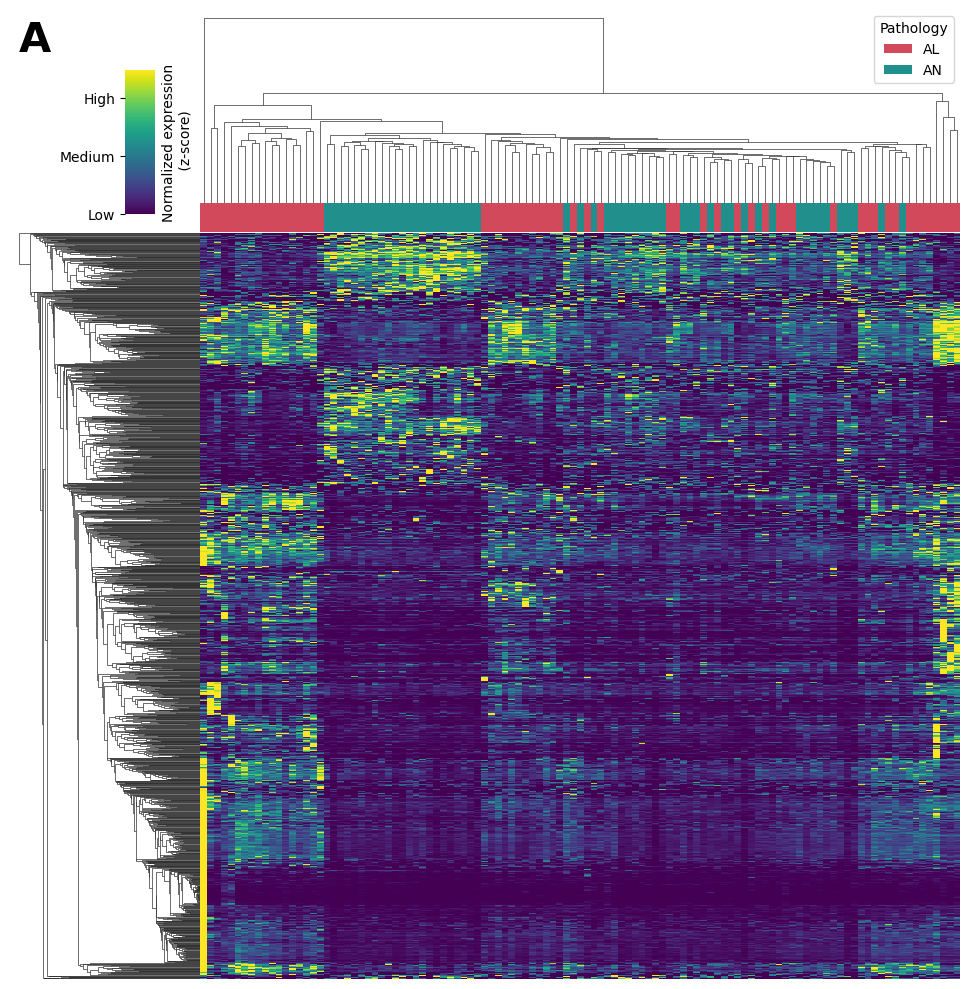

In [ ]:

g = sns.clustermap(
    deg_cpm,
    standard_scale=0,
    robust=True,
    cmap='viridis',
    col_colors=[pathology_colors],  
    xticklabels=False,
    yticklabels=False,
    figsize=(10, 10)
)
g.ax_heatmap.set_ylabel("")

for label, color in pathology_color_dict.items():
    g.ax_col_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)

g.ax_col_dendrogram.legend(
    loc="upper right",
    bbox_to_anchor=(1.00, 1.0), 
    frameon=True,
    title="Pathology"
)

cbar = g.ax_heatmap.collections[0].colorbar
cbar.set_label("Normalized expression\n (z-score)", rotation=90, labelpad=5)
cbar.ax.yaxis.set_label_position("right")
cbar.ax.yaxis.tick_left()

pos = cbar.ax.get_position()

cbar.ax.set_position([
    pos.x0 + 0.11,  
    pos.y0 - 0.02,  
    pos.width * 0.6,
    pos.height * 0.8 
])


cbar.set_ticks([0.0, 0.3, 0.6])
cbar.set_ticklabels(["Low", "Medium", "High"])

# ---------------------------------------
# 4) Panel label (A)
# ---------------------------------------
plt.text(
    -3.55, 1.35,              
    "A",
    transform=plt.gca().transAxes,
    fontsize=30,
    fontweight="bold",
    va='top'
)

plt.show()

* __[Fig. 1A] Clustering of differentially expressed genes in atopic lesional skin compared to non-lesional skin__


In [23]:
deg_cpm

Patient_10_AN_m0  Patient_11_AN_m0  Patient_12_AN_m0  \
symbol                                                            
ABCB11             0.603173          0.183843          0.699240   
ABCC6P1            0.139194          0.183843          0.099891   
ABCG4              0.231990          3.309166          3.246474   
ABCG8              0.046398          0.045961          0.000000   
ACADL              5.567749          1.332858          4.894683   
...                     ...               ...               ...   
ZNF80              0.139194          0.137882          0.099891   
ZNF878             0.046398          0.137882          0.049946   
ZP4                0.000000          0.045961          0.000000   
ZSCAN12P1          0.046398          0.229803          0.199783   
ZSCAN4             0.092796          0.045961          0.349620   

           Patient_13_AN_m0  Patient_14_AN_m0  Patient_15_AN_m0  \
symbol                                                            
ABCB11             0.336262          0.062539          0.415318   
ABCC6P1            0.000000          0.000000          0.138439   
ABCG4              0.720561          1.500945          2.676495   
ABCG8              0.000000          0.000000          0.230732   
ACADL              3.506730          3.189507          2.353470   
...                     ...               ...               ...   
ZNF80              0.000000          0.000000          0.000000   
ZNF878             0.048037          0.000000          0.138439   
ZP4                0.000000          0.000000          0.000000   
ZSCAN12P1          0.144112          0.375236          0.276879   
ZSCAN4             0.672523          0.375236          0.092293   

           Patient_16_AN_m0  Patient_17_AN_m0  Patient_18_AN_m0  \
symbol                                                            
ABCB11             1.253771          0.359795          1.226691   
ABCC6P1            0.000000          0.143918          0.084599   
ABCG4              0.250754          0.359795          0.465297   
ABCG8              0.000000          0.000000          0.042300   
ACADL              3.188161          2.446607          7.275549   
...                     ...               ...               ...   
ZNF80              0.000000          0.000000          0.000000   
ZNF878             0.000000          0.035980          0.042300   
ZP4                0.000000          0.000000          0.000000   
ZSCAN12P1          0.322398          0.000000          0.422997   
ZSCAN4             0.716441          0.107939          0.253798   

           Patient_19_AN_m0  ...  Patient_53_AL_m0  Patient_54_AL_m0  \
symbol                       ...                                       
ABCB11             0.243584  ...          1.520015          0.034790   
ABCC6P1            0.048717  ...          0.031021          0.034790   
ABCG4              0.438451  ...          1.488995          8.453913   
ABCG8              0.000000  ...          0.000000          0.000000   
ACADL              6.381894  ...          1.582057          0.834954   
...                     ...  ...               ...               ...   
ZNF80              0.097433  ...          0.093062          0.313108   
ZNF878             0.048717  ...          0.155104          0.730585   
ZP4                0.000000  ...          0.031021          0.452267   
ZSCAN12P1          0.048717  ...          0.744497          1.322011   
ZSCAN4             1.461502  ...          0.186124          0.034790   

           Patient_55_AL_m0  Patient_56_AL_m0  Patient_57_AL_m0  \
symbol                                                            
ABCB11             0.620204          0.282451          0.184294   
ABCC6P1            0.000000          0.000000          0.000000   
ABCG4              5.271736          4.196409          2.487966   
ABCG8              0.000000          0.040350          0.000000   
ACADL              0.265802          0.322801          0

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# ---------------------------------------
# 1) Prepare data
# ---------------------------------------
X = deg_cpm.T
pathology = X.index.to_series().str.extract(r"_(AL|AN)_")[0]

pathology_color_dict = {
    "AL": "#D1495B",
    "AN": "#21908C"
}

# ---------------------------------------
# 2) PCA
# ---------------------------------------
pca = PCA(n_components=2)
pc = pca.fit_transform(X)

pc_df = pd.DataFrame({
    "PC1": pc[:, 0],
    "PC2": pc[:, 1],
    "Pathology": pathology.values
})

pc1_var = pca.explained_variance_ratio_[0] * 100
pc2_var = pca.explained_variance_ratio_[1] * 100

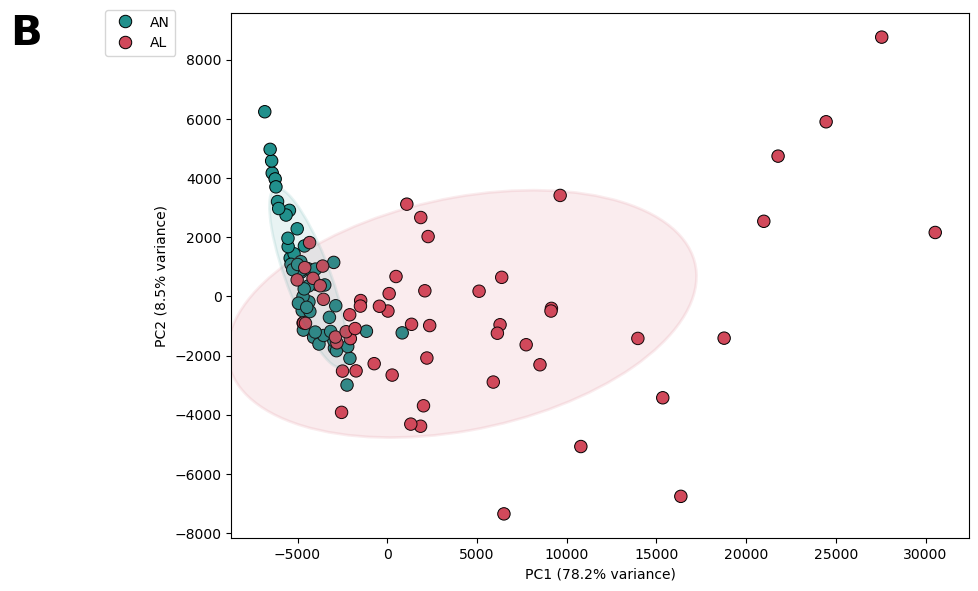

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import numpy as np


def draw_ellipse(x, y, ax, color, alpha=0.10, edgecolor=None, scale=2.0):
    """
    Draws a confidence ellipse scaled by covariance (default 2σ).
    """
    x_mean, y_mean = np.mean(x), np.mean(y)
    cov = np.cov(x, y)
    
    # eigenvalues/eigenvectors
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    
    # width/height scaled by e.g., 2σ
    width, height = 2 * scale * np.sqrt(eigenvals)
    angle = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
    
    ell = Ellipse(
        (x_mean, y_mean),
        width, height,
        angle=angle,
        facecolor=color,
        edgecolor=edgecolor if edgecolor else color,
        linewidth=2,
        alpha=alpha
    )
    ax.add_patch(ell)

# ---------------------------
# PCA PLOT
# ---------------------------
plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.scatterplot(
    data=pc_df,
    x="PC1", y="PC2",
    hue="Pathology",
    palette=pathology_color_dict,
    s=80,
    edgecolor="black",
    ax=ax
)

# Draw ellipses for each group
for group, color in pathology_color_dict.items():
    df_grp = pc_df[pc_df["Pathology"] == group]
    draw_ellipse(df_grp["PC1"], df_grp["PC2"], ax=ax, color=color, scale=1.5)

# Axis labels and legend
ax.set_xlabel(f"PC1 ({pc1_var:.1f}% variance)")
ax.set_ylabel(f"PC2 ({pc2_var:.1f}% variance)")
ax.legend(title="Pathology", fontsize=10, title_fontsize=11)

ax.legend(
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.02),  
    frameon=True,
)


# ---------------------------------------
# 4) Panel label (B)
# ---------------------------------------
plt.text(
    -0.3, 1.0 ,               
    "B",
    transform=plt.gca().transAxes,
    fontsize=30,
    fontweight="bold",
    va='top'
)

# ---------------------------------------
# 5) Top margin 
# ---------------------------------------
plt.subplots_adjust(top=0.88)  

plt.tight_layout()
plt.show()


## 2.2. Functional Analysis of Key Genes in AD Lesions

In [26]:
import gseapy as gp

In [27]:
libs = ['GO_Biological_Process_2021','KEGG_2021_Human','MSigDB_Hallmark_2020']
libs = ['KEGG_2021_Human','MSigDB_Hallmark_2020']

### 2.2.1. Functional Analysis of Genes Upregulated in AD Lesions

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = deseq[deseq.group=='UP'].index.to_list(),    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [29]:
up_enr_df = pd.concat(enr_list, axis=0)
up_enr_df[up_enr_df['Adjusted P-value']<0.05].sort_values(by='Adjusted P-value').head(20)

Gene_set                                               Term  \
0        KEGG_2021_Human             Cytokine-cytokine receptor interaction   
1        KEGG_2021_Human  Viral protein interaction with cytokine and cy...   
0   MSigDB_Hallmark_2020                                Allograft Rejection   
1   MSigDB_Hallmark_2020                              Inflammatory Response   
2        KEGG_2021_Human                            IL-17 signaling pathway   
3        KEGG_2021_Human                        Chemokine signaling pathway   
2   MSigDB_Hallmark_2020                           IL-6/JAK/STAT3 Signaling   
3   MSigDB_Hallmark_2020                      TNF-alpha Signaling via NF-kB   
4   MSigDB_Hallmark_2020                          Interferon Gamma Response   
4        KEGG_2021_Human                               Rheumatoid arthritis   
5        KEGG_2021_Human                         JAK-STAT signaling pathway   
6        KEGG_2021_Human                         Hematopoietic cell lineage   
7        KEGG_2021_Human                    Staphylococcus aureus infection   
8        KEGG_2021_Human                                            Malaria   
9        KEGG_2021_Human                         Inflammatory bowel disease   
5   MSigDB_Hallmark_2020                                  KRAS Signaling Up   
10       KEGG_2021_Human                          Th17 cell differentiation   
11       KEGG_2021_Human                            Cell adhesion molecules   
7   MSigDB_Hallmark_2020                                         Complement   
6   MSigDB_Hallmark_2020                               IL-2/STAT5 Signaling   

   Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   96/295  3.005335e-50      7.663604e-48            0                     0   
1   48/100  7.744349e-35      9.874045e-33            0                     0   
0   59/200  1.379237e-28      6.482416e-27            0                     0   
1   50/200  6.811208e-21      1.600634e-19            0                     0   
2    33/94  3.690654e-19      3.137056e-17            0                     0   
3   45/192  9.334379e-18      5.950667e-16            0                     0   
2    28/87  2.417571e-15      3.787527e-14            0                     0   
3   42/200  7.358316e-15      8.646021e-14            0                     0   
4   41/200  3.659045e-14      3.439502e-13            0                     0   
4    26/93  9.799400e-13      4.997694e-11            0                     0   
5   34/162  2.778015e-12      1.180656e-10            0                     0   
6    26/99  4.768514e-12      1.737102e-10            0                     0   
7    25/95  1.167424e-11      3.721163e-10            0                     0   
8    17/50  2.800427e-10      7.934544e-09            0                     0   
9    19/65  4.823248e-10      1.229928e-08            0                     0   
5   31/200  5.592226e-08      4.380577e-07            0                     0   
10  22/107  2.885062e-08      6.688099e-07            0                     0   
11  26/148  5.032453e-08      1.069396e-06            0                     0   
7   30/200  1.912263e-07      1.123455e-06            0                     0   
6   30/199  1.709306e-07      1.123455e-06            0                     0   

    Odds Ratio  Combined Score  \
0     9.513308     1084.791705   
1    17.464541     1371.726472   
0     7.967295      511.108792   
1     6.286526      291.919357   
2    10.079154      427.792693   
3     5.745448      225.295256   
2     8.799454      296.154555   
3     4.971283      161.780185   
4     4.817347      149.043862   
4     7.178154      198.485190   
5     4.936220      131.349277   
6     6.586076      171.692324   
7     6.598756      166.114684   
8     9.462783      208.144126   
9     7.596705      162.967586   
5     3.391325       56.632758   
10    4.764373       82.714920   
11    3.930621       66.053193   
7     3.

* __[Table 1] Major biological pathways and functions of upregulated genes in AD lesions__
   
Immune-related functions appeared to be significantly activated in AD lesions,   
reflecting a marked increase in inflammation or excessive immune activation in atopic skin.

### 2.2.2. Functional Analysis of Genes Downregulated in AD Lesions

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = deseq[deseq.group=='DOWN'].index.to_list(),    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [31]:
down_enr_df = pd.concat(enr_list, axis=0)
down_enr_df[down_enr_df['Adjusted P-value']<0.05].sort_values(by='Adjusted P-value')

Gene_set                    Term Overlap   P-value  \
0  KEGG_2021_Human     Tyrosine metabolism    6/36  0.000037   
1  KEGG_2021_Human      Retinol metabolism    7/68  0.000200   
2  KEGG_2021_Human      Nicotine addiction    5/40  0.000677   
3  KEGG_2021_Human  Fatty acid degradation    5/43  0.000948   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.005064            0                     0   11.240688   
1          0.013617            0                     0    6.457886   
2          0.030670            0                     0    8.004082   
3          0.032220            0                     0    7.371053   

   Combined Score                                       Genes  
0      114.634396               PNMT;DDC;ADH1B;ADH1A;DBH;ADH6  
1       54.995091  CYP2W1;ADH1B;ADH1A;CYP1A2;CYP1A1;BCO1;ADH6  
2       58.417927          GABRB2;GRIN3A;CHRNA4;SLC17A8;GRIA4  
3       51.313826               ACADL;ADH1B;ADH1A;ACSBG2;ADH6

* __[Table 2] Major functions of genes downregulated in AD lesions__
   
   Metabolism of substances such as tyrosine and retinol appears to be impaired in AD lesions.

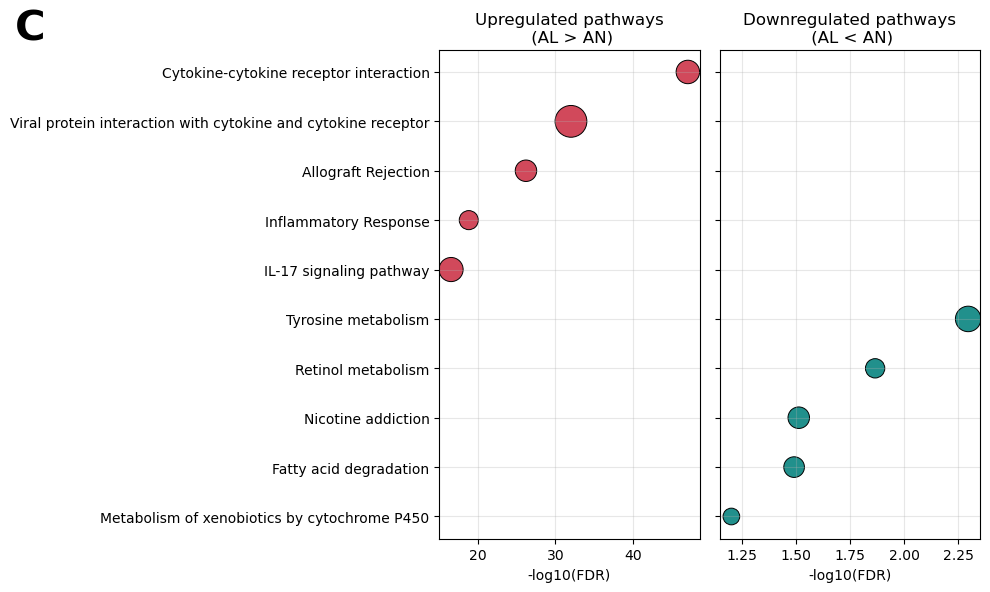

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# -----------------------------------
# 1) Top 5 by adjusted P-value
# -----------------------------------
up_top = up_enr_df.nsmallest(5, "Adjusted P-value").copy()
down_top = down_enr_df.nsmallest(5, "Adjusted P-value").copy()

# Compute -log10(FDR)
up_top["neglog10FDR"] = -np.log10(up_top["Adjusted P-value"])
down_top["neglog10FDR"] = -np.log10(down_top["Adjusted P-value"])

# Downregulated pathways should appear on the left → multiply by -1
# down_top["neglog10FDR"] *= -1

# -----------------------------------
# 2) Plot
# -----------------------------------

up_color = "#D1495B"      # red (AL up)
down_color = "#21908C"    # teal (AL down)

# -------- Upregulated --------
ax = axes[0]
ax.scatter(
    up_top["neglog10FDR"], up_top["Term"],
    s=up_top["Odds Ratio"] * 30,
    color="#D1495B", edgecolor="black", linewidth=0.7
)
ax.set_title("Upregulated pathways\n (AL > AN)")
ax.set_xlabel("-log10(FDR)")
ax.grid(alpha=0.3)

# -------- Downregulated --------
ax = axes[1]
ax.scatter(
    down_top["neglog10FDR"], down_top["Term"],
    s=down_top["Odds Ratio"] * 30,
    color="#21908C", edgecolor="black", linewidth=0.7
)
ax.set_title("Downregulated pathways\n (AL < AN)")
ax.set_xlabel("-log10(FDR)")
ax.grid(alpha=0.3)

axes[0].invert_yaxis()  

# Panel label (C)
fig.text(
    0.02, 0.98,             # x, y in figure coordinates (0–1 scale)
    "C",
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)


plt.tight_layout()
plt.show()



In [33]:
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------------
# 1. Load images
# -------------------------------
A = Image.open(f"{project_path}/03_figures/Figure1A.png")
B = Image.open(f"{project_path}/03_figures/Figure1B.png")
C = Image.open(f"{project_path}/03_figures/Figure1C.png")

# Convert to same width scale
base_height = 1000
A = A.resize((int(A.width * base_height / A.height), base_height))
B = B.resize((int(B.width * (base_height/2) / B.height), base_height//2))
C = C.resize((int(C.width * (base_height/2) / C.height), base_height//2))

# -------------------------------
# 2. Compute final canvas size
# -------------------------------
final_width = A.width + max(B.width, C.width)
final_height = A.height

# Create canvas
canvas = Image.new("RGB", (final_width, final_height), "white")

# -------------------------------
# 3. Paste A, B, C into layout
# -------------------------------
# A: left
canvas.paste(A, (0, 0))

# B: right-top
canvas.paste(B, (A.width, 0))

# C: right-bottom
canvas.paste(C, (A.width, B.height))

# -------------------------------
# 4. Save result
# -------------------------------
canvas.save(f"{project_path}/03_figures/Figure1.png", dpi=(300, 300))

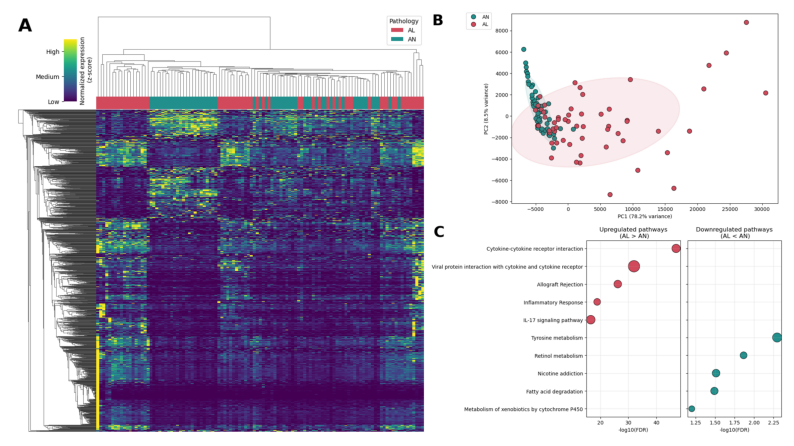

In [34]:
import matplotlib.image as mpimg

img_path = f"{project_path}/03_figures/Figure1.png"

img = mpimg.imread(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

---

# ★ 3. Analysis of Molecular Subtypes in Atopic Dermatitis

## 3.1. Analysis of Molecular Subtypes in Atopic Dermatitis Based on the Cola Package

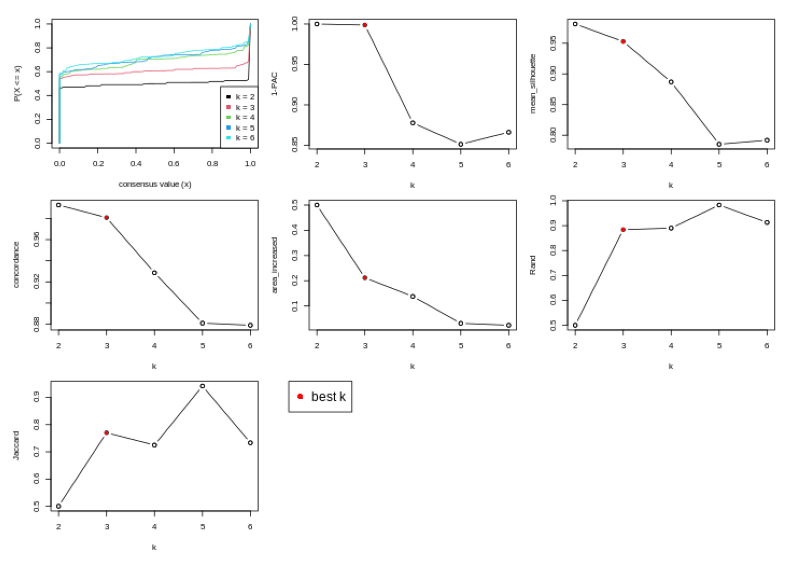

In [35]:
import matplotlib.image as mpimg

img_path = f"{project_path}/02_script/06_k/cola_output/figure_cola/ATC-skmeans-select-partition-number-1.png"

img = mpimg.imread(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

* __[Fig. 2] Determination of the optimal K for AD transcriptomes__   
   The results indicate that AD transcriptomes are classified into three distinct molecular subtypes.

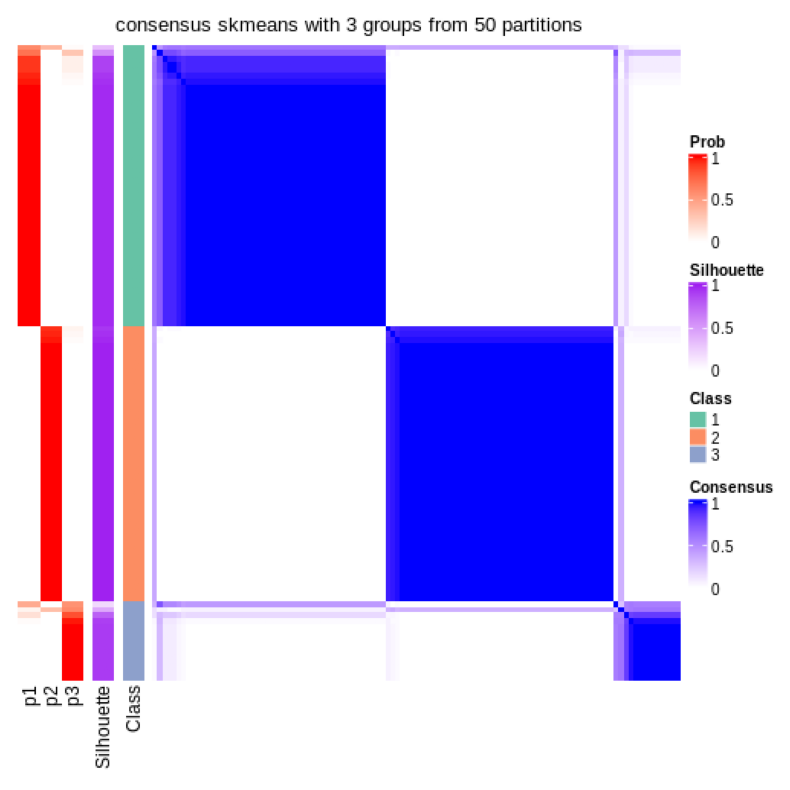

In [36]:
img_path = f"{project_path}/02_script/06_k/cola_output/figure_cola/tab-ATC-skmeans-consensus-heatmap-2-1.png"

img = mpimg.imread(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

* __[Fig. 3] Consensus clustering results for three distinct AD molecular subtypes__   
   The results indicate that the three molecular subtypes are independent of one another.


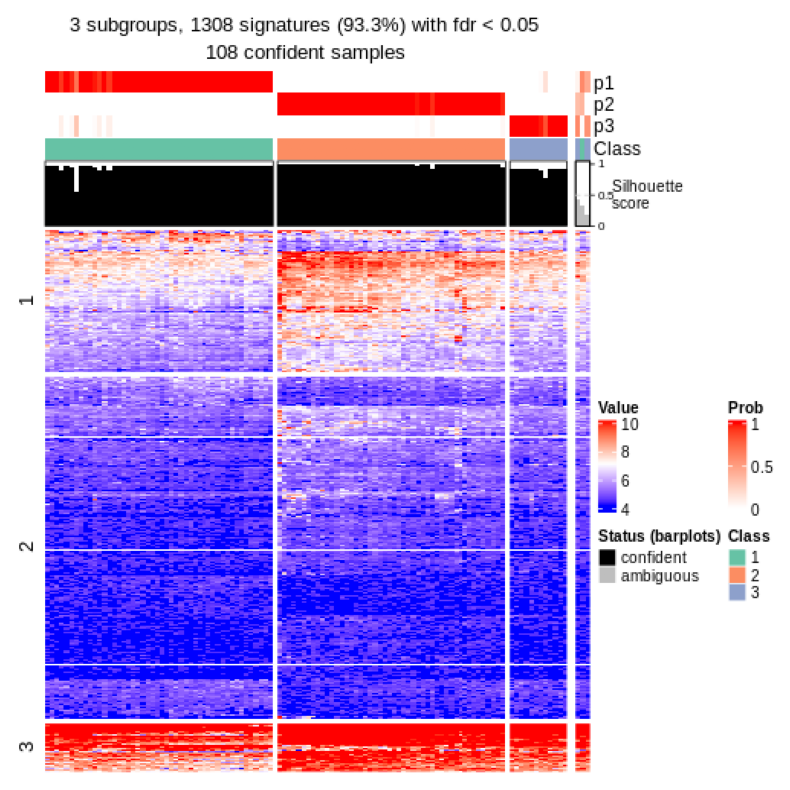

In [37]:
img_path = f"{project_path}/02_script/06_k/cola_output/figure_cola/tab-ATC-skmeans-get-signatures-no-scale-2-1.png"

img = mpimg.imread(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

* __[Fig. 4] Gene expression patterns of three distinct molecular subtypes of atopic dermatitis__   
   The gene expression patterns of the three distinct molecular subtypes are observed to be different.

In [228]:
k_genes = pd.read_csv(f'{project_path}/01_data/06_k/cola_k3_genes.tsv', sep="\t").set_index('gene')
k_genes

which_row           fdr       p_value    mean_1    mean_2  \
gene                                                                   
ABCB11             1  1.024543e-08  4.003540e-09  5.418761  4.880586   
ABCG4              3  4.311586e-16  4.797485e-17  5.564723  7.000560   
ACADL              5  1.056288e-12  2.335586e-13  6.688355  5.806851   
ACKR2              6  3.161277e-12  7.215467e-13  6.212495  7.564110   
ACOT12             7  3.479035e-03  2.799109e-03  4.406810  4.278520   
...              ...           ...           ...       ...       ...   
ZNF80           1398  1.555291e-03  1.195866e-03  4.443011  4.644346   
ZNF878          1399  1.454396e-07  6.701426e-08  4.586336  4.935953   
ZP4             1400  2.259704e-09  7.978271e-10  4.239030  4.568878   
ZSCAN12P1       1401  3.178805e-05  1.929503e-05  4.968712  5.338984   
ZSCAN4          1402  1.026424e-06  5.278542e-07  5.061047  4.752164   

             mean_3  group_diff  scaled_mean_1  scaled_mean_2  scaled_mean_3  \
gene                                                                           
ABCB11     4.872160    0.546601       0.617672      -0.490668      -0.508020   
ABCG4      6.469144    1.435837      -0.773701       0.730288       0.173648   
ACADL      6.116451    0.881504       0.707838      -0.662530      -0.181231   
ACKR2      6.604972    1.351615      -0.640545       0.703138      -0.250372   
ACOT12     4.338452    0.128290       0.346034      -0.341020      -0.020057   
...             ...         ...            ...            ...            ...   
ZNF80      4.519232    0.201335      -0.355126       0.374823      -0.078786   
ZNF878     4.571924    0.364029      -0.453908       0.578019      -0.496445   
ZP4        4.222819    0.346059      -0.499276       0.638069      -0.555173   
ZSCAN12P1  4.998734    0.370272      -0.398561       0.480385      -0.327296   
ZSCAN4     4.679004    0.382043       0.540988      -0.388748      -0.608958   

           group_diff_scaled  km  
gene                              
ABCB11              1.125692   2  
ABCG4               1.503989   3  
ACADL               1.370368   2  
ACKR2               1.343683   3  
ACOT12              0.687053   2  
...                      ...  ..  
ZNF80               0.729949   1  
ZNF878              1.074464   3  
ZP4                 1.193243   3  
ZSCAN12P1           0.878946   3  
ZSCAN4              1.149946   2  

[1308 rows x 12 columns]

In [229]:
k_genes[['km','p_value','fdr']].rename(columns={'km':'group'}).to_excel(f'{project_path}/01_data/06_k/SupplementaryTableS2.xlsx', index=True)

In [39]:
k_samples = pd.read_csv(f'{project_path}/01_data/06_k/cola_k3_samples.tsv', sep="\t", index_col=0)
k_samples

class   entropy  silhouette
Patient_10_AN_m0      1  0.000000    0.975893
Patient_11_AN_m0      2  0.000000    0.997347
Patient_12_AN_m0      1  0.152869    0.940549
Patient_13_AN_m0      1  0.000000    0.975893
Patient_14_AN_m0      3  0.000000    0.921781
...                 ...       ...         ...
Patient_5_AL_m0       2  0.000000    0.997347
Patient_6_AL_m0       2  0.000000    0.997347
Patient_7_AL_m0       2  0.000000    0.997347
Patient_8_AL_m0       3  0.400205    0.776081
Patient_9_AL_m0       1  0.684880    0.328007

[111 rows x 3 columns]

In [40]:
meta = pd.read_csv(f'{project_path}/01_data/05_deseq/AN_vs_AL.cls', sep="\t", index_col=0)
meta = meta.merge(k_samples, left_index=True, right_index=True)
meta.to_csv(f'{project_path}/01_data/06_k/meta_cola.tsv', sep="\t", index=True)

In [41]:
pd.DataFrame(meta[['class','pathology']].value_counts()).sort_index()

count
class pathology       
1     AL             6
      AN            43
2     AL            41
      AN             7
3     AL            10
      AN             4

In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

data = {
    "class": [1, 1, 2, 2, 3, 3],
    "pathology": ["AL", "AN", "AL", "AN", "AL", "AN"],
    "count": [6, 43, 41, 7, 10, 4]
}

df = pd.DataFrame(data)

# -------------------------
# 2) wide-format
# -------------------------
df_wide = df.pivot(index='class', columns='pathology', values='count').fillna(0)

In [ ]:
def fisher_with_enrichment(target_class, dfw):
    
    AL_in = dfw.loc[target_class, "AL"]
    AN_in = dfw.loc[target_class, "AN"]

    AL_out = dfw.drop(target_class).AL.sum()
    AN_out = dfw.drop(target_class).AN.sum()

    table = [[AL_in, AN_in],
             [AL_out, AN_out]]

    odds_ratio, p_value = fisher_exact(table)

    # enrichment direction
    # OR > 1 → AL enriched, OR < 1 → AN enriched
    if odds_ratio > 1:
        enriched = "AL enriched"
    elif odds_ratio < 1:
        enriched = "AN enriched"
    else:
        enriched = "No enrichment"

    return {
        "class": target_class,
        "table": table,
        "odds_ratio": odds_ratio,
        "p_value": p_value,
        "enriched": enriched
    }

In [44]:
results = [fisher_with_enrichment(c, df_wide) for c in df_wide.index]

In [ ]:
# -------------------------
# 5) Result
# -------------------------
for res in results:
    print(f"\n=== Class {res['class']} ===")
    print("Contingency Table [[AL_in, AN_in], [AL_out, AN_out]]:")
    print(res["table"])
    print(f"Odds Ratio: {res['odds_ratio']:.3f}")
    print(f"P-value: {res['p_value']:.3e}")
    print(f"→ Enrichment: **{res['enriched']}**")


=== Class 1 ===
Contingency Table [[AL_in, AN_in], [AL_out, AN_out]]:
[[6, 43], [51, 11]]
Odds Ratio: 0.030
P-value: 4.131e-14
→ Enrichment: **AN enriched**

=== Class 2 ===
Contingency Table [[AL_in, AN_in], [AL_out, AN_out]]:
[[41, 7], [16, 47]]
Odds Ratio: 17.205
P-value: 2.306e-10
→ Enrichment: **AL enriched**

=== Class 3 ===
Contingency Table [[AL_in, AN_in], [AL_out, AN_out]]:
[[10, 4], [47, 50]]
Odds Ratio: 2.660
P-value: 1.534e-01
→ Enrichment: **AL enriched**


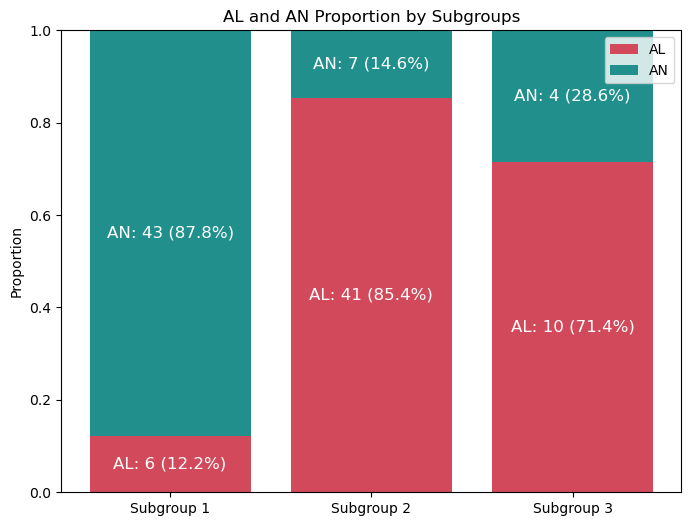

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Class": ["Subgroup 1", "Subgroup 2", "Subgroup 3"],
    "AL":    [6, 41, 10],
    "AN":    [43, 7, 4]
}

df = pd.DataFrame(data)
df["Total"] = df["AL"] + df["AN"]
df["AL_pct"] = df["AL"] / df["Total"]
df["AN_pct"] = df["AN"] / df["Total"]

# Stacked bar plot
plt.figure(figsize=(8, 6))


# up_color = "#D1495B"      # red (AL up)
# down_color = "#21908C"    # teal (AL down)

plt.bar(df["Class"], df["AL_pct"], label="AL", color="#D1495B")
plt.bar(df["Class"], df["AN_pct"], bottom=df["AL_pct"], label="AN", color="#21908C")

plt.ylabel("Proportion")
plt.title("AL and AN Proportion by Subgroups")
plt.legend()

# 값 표시
for idx, row in df.iterrows():
    plt.text(idx, row["AL_pct"]/2, f"AL: {row['AL']} ({row['AL_pct']*100:.1f}%)",
             ha='center', va='center', color="white", fontsize=12)
    plt.text(idx, row["AL_pct"] + row["AN_pct"]/2, f"AN: {row['AN']} ({row['AN_pct']*100:.1f}%)",
             ha='center', va='center', color="white", fontsize=12)

plt.ylim(0, 1)
plt.show()


* __[Fig. 5] Ratio of lesional and non-lesional samples across three molecular subtypes__   
   Class 1 was predominantly composed of non-lesional samples,    
   while Classes 2 and 3 consisted mainly of lesional samples. Notably, Class 2 contained a substantial number of lesional samples.

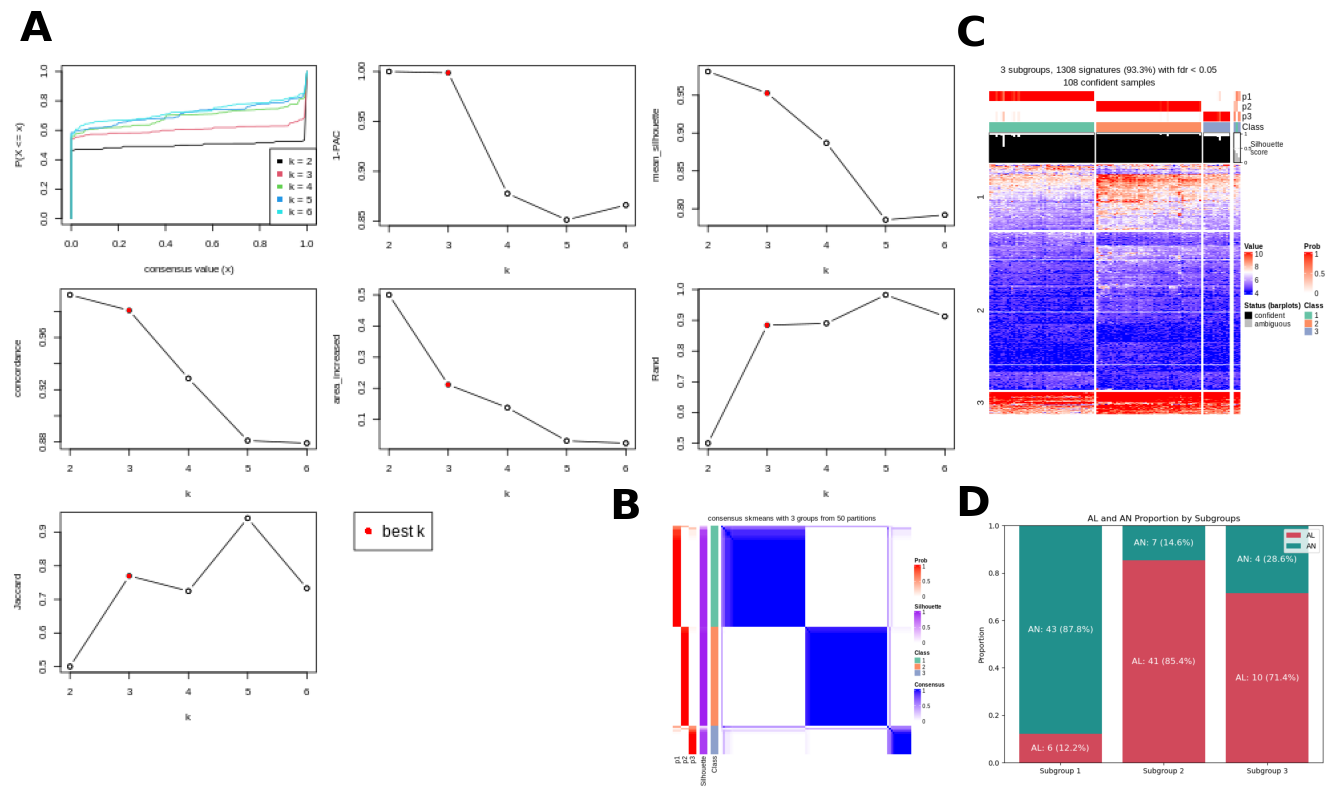

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  

# --- File path setting ---
figA = f"{project_path}/02_script/06_k/cola_output/figure_cola/ATC-skmeans-select-partition-number-1.png"
figB = f"{project_path}/02_script/06_k/cola_output/figure_cola/tab-ATC-skmeans-consensus-heatmap-2-1.png"
figC = f"{project_path}/02_script/06_k/cola_output/figure_cola/tab-ATC-skmeans-get-signatures-no-scale-2-1.png"
figD = f"{project_path}/03_figures/Figure2D.png"

# Load images
imgA = mpimg.imread(figA)
imgB = mpimg.imread(figB)
imgC = mpimg.imread(figC)
imgD = mpimg.imread(figD)

fig = plt.figure(figsize=(17, 11))

# Main grid: A (left), C/D (right)
gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[2.7, 1],   
    height_ratios=[1, 1],
    wspace=0.01,
    hspace=0.25
)

# A internal grid (3×3)
gs_A = gridspec.GridSpecFromSubplotSpec(
    3, 3, subplot_spec=gs[:, 0],
    wspace=0.01,
    hspace=0.03
)

# A image
axA = fig.add_subplot(gs_A[:, :])
axA.imshow(imgA)
axA.axis("off")
axA.text(0.01, 1.02, "A", transform=axA.transAxes,
         fontsize=30, fontweight="bold")

# B (placed more centered vertically)
axB = fig.add_subplot(gs_A[2, 2])  # row=1 only → higher placement

pos = axB.get_position()

axB.set_position([
    pos.x0,   
    pos.y0 + 0.02,  
    pos.width,
    pos.height
])


axB.imshow(imgB)
axB.axis("off")
axB.text(-0.22, 0.98, "B", transform=axB.transAxes,
         fontsize=30, fontweight="bold")



# Right side grid: C (top), D (bottom)
gs_right = gridspec.GridSpecFromSubplotSpec(
    2, 1, subplot_spec=gs[:, 1],
    height_ratios=[1.6, 1],
    hspace=0.25
)

# C
axC = fig.add_subplot(gs_right[0])
pos = axC.get_position()

axC.set_position([
    pos.x0,   
    pos.y0 - 0.04,   
    pos.width,
    pos.height
])

axC.imshow(imgC)
axC.axis("off")
axC.text(-0.05, 1.05, "C", transform=axC.transAxes,
         fontsize=30, fontweight="bold")

# D
axD = fig.add_subplot(gs_right[1])
pos = axD.get_position()

axD.set_position([
    pos.x0,  
    pos.y0 + 0.02,   
    pos.width,
    pos.height
])


axD.imshow(imgD)
axD.axis("off")
axD.text(-0.05, 0.98, "D", transform=axD.transAxes,
         fontsize=30, fontweight="bold")

plt.savefig(f"{project_path}/03_figures/Figure2.png", dpi=300, bbox_inches="tight")
plt.show()         

## 3.2. Key Genes of Class #2 (Major AL)

In [48]:
import gseapy as gp

In [49]:
cls2 = k_genes[k_genes.km==2].index.to_list()

In [50]:
libs = ['GO_Biological_Process_2021','KEGG_2021_Human','MSigDB_Hallmark_2020']

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = cls2,    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [52]:
cls2_enr_df = pd.concat(enr_list, axis=0)
cls2_enr_df[cls2_enr_df['Adjusted P-value']<0.05]

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
0             KEGG_2021_Human   
1             KEGG_2021_Human   
2             KEGG_2021_Human   
3             KEGG_2021_Human   
4             KEGG_2021_Human   

                                                Term Overlap   P-value  \
0             retinol metabolic process (GO:0042572)    5/21  0.000003   
1     primary alcohol metabolic process (GO:0034308)    5/33  0.000029   
2  monocarboxylic acid metabolic process (GO:0032...   9/143  0.000031   
3       retinoic acid metabolic process (GO:0042573)    4/26  0.000179   
4                     ethanol oxidation (GO:0006069)    3/12  0.000272   
5  regulation of calcium ion-dependent exocytosis...    4/31  0.000361   
0                                 Retinol metabolism    7/68  0.000010   
1                             Fatty acid degradation    5/43  0.000108   
2       Metabolism of xenobiotics by cytochrome P450    6/76  0.000195   
3                                Tyrosine metabolism    4/36  0.000648   
4                                Pyruvate metabolism    4/47  0.001784   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.001961            0                     0   28.592303   
1          0.007285            0                     0   16.328538   
2          0.007285            0                     0    6.223775   
3          0.031673            0                     0   16.553833   
4          0.038465            0                     0   30.229358   
5          0.042560            0                     0   13.484895   
0          0.001131            0                     0   10.573464   
1          0.006083            0                     0   12.025463   
2          0.007353            0                     0    7.857409   
3          0.018295            0                     0   11.375000   
4          0.040313            0                     0    8.460401   

   Combined Score                                              Genes  
0      365.850685                     ADH1B;ADH1A;CYP1A2;CYP1A1;ADH6  
1      170.583423                     ADH1B;ADH1A;CYP1A2;CYP1A1;ADH6  
2       64.629554  AGXT2;ADH1B;ADH1A;CYP1A2;ACOT12;CYP1A1;ABCB11;...  
3      142.810445                            CYP2W1;ADH1B;ADH1A;ADH6  
4      248.170720                                   ADH1B;ADH1A;ADH6  
5      106.882775                            TRPV6;SYT9;SYT8;CACNA1H  
0      121.722838         CYP2W1;ADH1B;ADH1A;CYP1A2;CYP1A1;BCO1;ADH6  
1      109.871173                      ACADL;ADH1B;ADH1A;ACSBG2;ADH6  
2       67.113710             HSD11B1;ADH1B;ADH1A;CYP1A2;CYP1A1;ADH6  
3       83.517874                              PNMT;ADH1B;ADH1A;ADH6  
4       53.546149                            ADH1B;ADH1A;ACOT12;ADH6

* The genes used for Class #2 classification were primarily related to retinol and alcohol metabolism.
* However, this should not be interpreted as an upregulation of these genes; rather, their expression may be downregulated.
* It is more appropriate to interpret that samples were assigned to Class #2 based on these genes, regardless of the direction of expression change.

## 3.3. Key Genes of Class #3 (Minor AL)

In [53]:
cls3 = k_genes[k_genes.km==3].index.to_list()

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = cls3,    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [55]:
cls3_enr_df = pd.concat(enr_list, axis=0)
cls3_enr_df[cls3_enr_df['Adjusted P-value']<0.05].sort_values(by='Adjusted P-value').head(10)

Gene_set  \
0             KEGG_2021_Human   
1             KEGG_2021_Human   
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
0        MSigDB_Hallmark_2020   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
2             KEGG_2021_Human   
5  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0                            IL-17 signaling pathway   25/94  9.026012e-19   
1             Cytokine-cytokine receptor interaction  39/295  4.982648e-17   
0        response to lipopolysaccharide (GO:0032496)  29/159  9.619972e-17   
1                 inflammatory response (GO:0006954)  34/230  1.729336e-16   
0                      TNF-alpha Signaling via NF-kB  27/200  2.165034e-12   
2          neutrophil mediated immunity (GO:0002446)  45/488  1.503310e-13   
3              neutrophil degranulation (GO:0043312)  44/481  3.754036e-13   
4  neutrophil activation involved in immune respo...  44/485  4.999231e-13   
2                    Staphylococcus aureus infection   19/95  3.614951e-12   
5         defense response to bacterium (GO:0042742)  26/176  6.686602e-13   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      1.922541e-16            0                     0   14.296866   
1      5.306520e-15            0                     0    6.127852   
0      2.071745e-13            0                     0    8.846737   
1      2.071745e-13            0                     0    6.926924   
0      9.959156e-11            0                     0    6.150407   
2      1.200643e-10            0                     0    4.097639   
3      2.248668e-10            0                     0    4.054281   
4      2.395631e-10            0                     0    4.016664   
2      2.566616e-10            0                     0    9.742470   
5      2.670183e-10            0                     0    6.824956   

   Combined Score                                              Genes  
0      594.020565  CXCL6;CSF3;CXCL8;CXCL1;CXCL3;PTGS2;CXCL2;CXCL5...  
1      230.027219  CXCL6;CSF3;IL20;CSF3R;CXCL8;CCL3L3;IL24;CXCL17...  
0      326.268594  CXCL6;CXCL8;SERPINE1;CXCL1;CXCL3;CXCL2;CXCL5;C...  
1      251.403157  SERPINA3;CXCL6;CXCL8;TNFAIP6;GPR68;C5AR1;FPR1;...  
0      165.191229  CXCL6;TNFAIP6;BCL2A1;SERPINE1;TNC;CXCL1;SLC2A3...  
2      120.986642  FCN1;SERPINA3;SNAP25;SERPINA1;SIGLEC9;TNFAIP6;...  
3      115.996129  FCN1;SERPINA3;SNAP25;SERPINA1;SIGLEC9;TNFAIP6;...  
4      113.769286  FCN1;SERPINA3;SNAP25;SERPINA1;SIGLEC9;TNFAIP6;...  
2      256.674553  IL10;DEFB103A;DEFB103B;C5AR1;KRT24;FPR1;KRT13;...  
5      191.327403  DEFB103A;PGLYRP2;SERPINE1;FPR2;LCE3C;LCE3A;LCE...

* The genes used for Class #3 classification were primarily related to immune functions.
* However, this should not be interpreted as an upregulation of these genes; rather, their expression may be downregulated.
* It is more appropriate to interpret that samples were assigned to Class #3 based on these genes, regardless of the direction of expression change.

---

# 4. Analysis of Key Genes Between Major AL and Minor AL in Atopic Lesions

## 4.1. Identification of DEGs in Major AL

### 4.1.1. Data Preparation for Major AL DEG Analysis

In [56]:
comp_df = pd.read_csv(f'{project_path}/01_data/05_deseq/AN_vs_AL_count.tsv', sep="\t", index_col=0)
comp_df.head()

Patient_10_AN_m0  Patient_11_AN_m0  Patient_12_AN_m0  \
symbol                                                           
5S_rRNA                  0                 0                 0   
7SK                      0                 1                 0   
A1BG                     0                 4                 0   
A1BG-AS1                32                27                42   
A2M                   7342              5888              3500   

          Patient_13_AN_m0  Patient_14_AN_m0  Patient_15_AN_m0  \
symbol                                                           
5S_rRNA                  1                 0                 0   
7SK                      0                 0                 0   
A1BG                     0                 0                 0   
A1BG-AS1                37                33                47   
A2M                   2677              3592              6654   

          Patient_16_AN_m0  Patient_17_AN_m0  Patient_18_AN_m0  \
symbol                                                           
5S_rRNA                  0                 0                 0   
7SK                      0                 0                 0   
A1BG                     2                 0                 0   
A1BG-AS1                42                54                41   
A2M                   5059              4072              4672   

          Patient_19_AN_m0  ...  Patient_53_AL_m0  Patient_54_AL_m0  \
symbol                      ...                                       
5S_rRNA                  0  ...                 0                 0   
7SK                      0  ...                 1                 0   
A1BG                     1  ...                 0                 1   
A1BG-AS1                48  ...                61                53   
A2M                   3728  ...              3262              7180   

          Patient_55_AL_m0  Patient_56_AL_m0  Patient_57_AL_m0  \
symbol                                                           
5S_rRNA                  0                 1                 1   
7SK                      0                 0                 0   
A1BG                     1                 1                 2   
A1BG-AS1                46                71                47   
A2M                   2614              6620              3549   

          Patient_5_AL_m0  Patient_6_AL_m0  Patient_7_AL_m0  Patient_8_AL_m0  \
symbol                                                                         
5S_rRNA                 1                3                1                1   
7SK                     0                0                0                0   
A1BG                    0                4                4                1   
A1BG-AS1               30               42               56               54   
A2M                  7497             4164             4644             6898   

          Patient_9_AL_m0  
symbol                     
5S_rRNA                 0  
7SK                     0  
A1BG                    3  
A1BG-AS1               45  
A2M                  3938  

[5 rows x 111 columns]

In [57]:
meta = pd.read_csv(f'{project_path}/01_data/06_k/meta_cola.tsv', sep="\t", index_col=0)
meta.head()

pathology  class   entropy  silhouette
Patient_10_AN_m0        AN      1  0.000000    0.975893
Patient_11_AN_m0        AN      2  0.000000    0.997347
Patient_12_AN_m0        AN      1  0.152869    0.940549
Patient_13_AN_m0        AN      1  0.000000    0.975893
Patient_14_AN_m0        AN      3  0.000000    0.921781

In [58]:
cls2_al = meta[(meta['class'] == 2) & (meta['pathology']=='AL')].index.to_list()
cls2_an = [x.replace("AL",'AN') for x in cls2_al]
cls2 = cls2_al + cls2_an

In [59]:
cls2_comp_df = comp_df.loc[:,comp_df.columns.isin(cls2)]
cls2_meta = meta[meta.index.isin(cls2_comp_df.columns.to_list())]
cls2_comp_df = cls2_comp_df[cls2_meta.index.to_list()]

cls2_comp_df.to_csv(f'{project_path}/01_data/04_count/majorAL_count.tsv', sep="\t", index=True)
cls2_meta.to_csv(f'{project_path}/01_data/04_count/majorAL.cls', sep="\t", index=True)

### 4.1.2. Identification of AN vs. AL DEGs in Major AL Samples

In [60]:
major = pd.read_csv(f'{project_path}/01_data/05_deseq/majorAL_deseq.tsv', sep="\t", index_col=0)
major[(major['log2FoldChange'].apply(abs)>=1) & (major['padj']<0.05)].sort_values(by='padj').head(10)

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
KRT6C     14587.984787        6.341772  0.419826  15.105703  1.485138e-51   
SELE        674.152956        3.031589  0.216807  13.982923  1.981784e-44   
MMP1        654.413130        6.706545  0.489475  13.701519  9.942300e-43   
SH2D5        65.649714        4.088011  0.303270  13.479765  2.057598e-41   
SH2D2A       49.962287        2.429474  0.185837  13.073121  4.690086e-39   
PCSK1        55.304422        5.359494  0.412437  12.994712  1.311011e-38   
FPR1        130.195008        3.373361  0.260655  12.941857  2.612363e-38   
CXCL8       319.745149        6.208476  0.487312  12.740256  3.532358e-37   
SRGN        920.681874        1.744633  0.137417  12.695936  6.228061e-37   
APOBEC3A    150.914850        4.453112  0.350905  12.690358  6.687928e-37   

                  padj  
KRT6C     3.633837e-47  
SELE      2.424514e-40  
MMP1      8.108940e-39  
SH2D5     1.258633e-37  
SH2D2A    2.295140e-35  
PCSK1     5.346304e-35  
FPR1      9.131329e-35  
CXCL8     1.080372e-33  
SRGN      1.636402e-33  
APOBEC3A  1.636402e-33

## 4.2. Identification of DEGs in Minor AL

### 4.2.1. Data Preparation for Minor AL DEG Analysis

In [61]:
cls3_al = meta[(meta['class'] == 3) & (meta['pathology']=='AL')].index.to_list()
cls3_an = [x.replace("AL",'AN') for x in cls3_al]
cls3 = cls3_al + cls3_an

In [62]:
cls3_comp_df = comp_df.loc[:,comp_df.columns.isin(cls3)]
cls3_meta = meta[meta.index.isin(cls3_comp_df.columns.to_list())]
cls3_comp_df = cls3_comp_df[cls3_meta.index.to_list()]

cls3_comp_df.to_csv(f'{project_path}/01_data/04_count/minorAL_count.tsv', sep="\t", index=True)
cls3_meta.to_csv(f'{project_path}/01_data/04_count/minorAL.cls', sep="\t", index=True)

### 4.2.2. Identification of AN vs. AL DEGs in Minor AL Samples

In [63]:
minor = pd.read_csv(f'{project_path}/01_data/05_deseq/minorAL_deseq.tsv', sep="\t", index_col=0)
minor[(minor['log2FoldChange'].apply(abs)>=1) & (minor['padj']<0.05)].sort_values(by='padj').head(10)

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
UGT3A2   151.960327       -3.114146  0.456244 -6.825610  8.755245e-12   
BTC      374.627478       -2.208237  0.374192 -5.901349  3.605412e-09   
PLCD4     50.097959        1.214240  0.204729  5.930970  3.011498e-09   
CACNA1H  213.767464       -2.838290  0.486512 -5.833950  5.413036e-09   
GALNT6   621.554202        1.095240  0.203519  5.381521  7.385902e-08   
AKR1B10  581.789757        1.987174  0.389164  5.106268  3.285836e-07   
CDC25B   769.332981        1.117701  0.224474  4.979197  6.384859e-07   
BCAR3    382.262958       -1.043649  0.211723 -4.929304  8.252299e-07   
PIF1      36.170481        1.718230  0.355341  4.835434  1.328553e-06   
MFSD2B    14.581156        2.549407  0.526732  4.840048  1.298077e-06   

                 padj  
UGT3A2   1.600109e-07  
BTC      2.196417e-05  
PLCD4    2.196417e-05  
CACNA1H  2.473216e-05  
GALNT6   2.249746e-04  
AKR1B10  6.672438e-04  
CDC25B   1.166897e-03  
BCAR3    1.371082e-03  
PIF1     1.867741e-03  
MFSD2B   1.867741e-03

## 4.3. Comparative Analysis of DEGs Between Major AL and Minor AL

In [64]:
from venn import venn

In [65]:
overall = pd.read_csv(f'{project_path}/01_data/05_deseq/AN_vs_AL_deseq.tsv', sep="\t", index_col=0)
major = pd.read_csv(f'{project_path}/01_data/05_deseq/majorAL_deseq.tsv', sep="\t", index_col=0)
minor = pd.read_csv(f'{project_path}/01_data/05_deseq/minorAL_deseq.tsv', sep="\t", index_col=0)

In [66]:
overall = overall[(overall['padj']<0.05) & (overall['log2FoldChange'].apply(abs)>=1)]
major = major[(major['padj']<0.05) & (major['log2FoldChange'].apply(abs)>=1)]
minor = minor[(minor['padj']<0.05) & (minor['log2FoldChange'].apply(abs)>=1)]

In [67]:
major['up/down'] = major['log2FoldChange'].apply(lambda x: 'UP' if x >=0 else 'DOWN')
minor['up/down'] = minor['log2FoldChange'].apply(lambda x: 'UP' if x >=0 else 'DOWN')

In [68]:
major['up/down'].value_counts()

up/down
UP      1263
DOWN     674
Name: count, dtype: int64

In [69]:
minor['up/down'].value_counts()

up/down
UP      77
DOWN    16
Name: count, dtype: int64

In [70]:
sets = {
    "AN_vs_AL (Overall)": set(overall.index),
    "Major AL": set(major.index),
    "Minor AL": set(minor.index)
}

<Figure size 1000x1000 with 0 Axes>

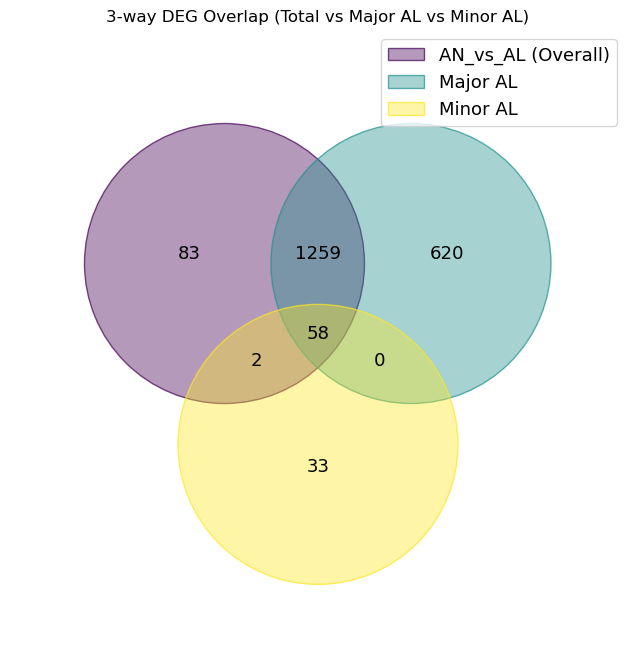

In [71]:
plt.figure(figsize=(10,10))
venn(sets)
plt.title("3-way DEG Overlap (Total vs Major AL vs Minor AL)")
plt.show()

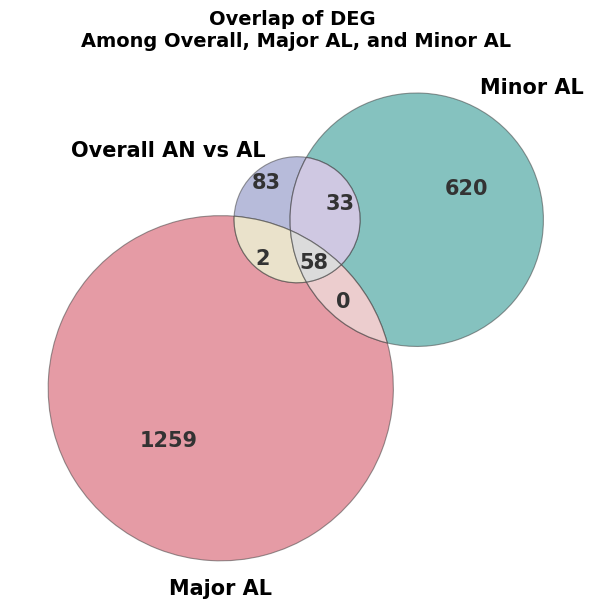

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Subset data
subset_counts = (83, 620, 33, 1259, 2, 0, 58)

fig, ax = plt.subplots(figsize=(6.2, 6.2))

v = venn3(
    subsets=subset_counts,
    set_labels=("Overall AN vs AL", "Minor AL", "Major AL"),
    ax=ax
)


# up_color = "#D1495B"      # red (AL up)
# down_color = "#21908C"    # teal (AL down)

# ===== Color setting  =====
colors = {
    '100': '#7C83BC',   # Overall only 
    '010': '#21908C',   # Major only 
    '001': '#D1495B',  # Minor only 
    '110': '#A89CCB',   # Overall ∩ Major (soft purple)
    '101': '#D9CBA1',   # Overall ∩ Minor (soft beige-yellow)
    '011': '#DDA4A6',   # Major ∩ Minor (soft red-pink)
    '111': '#BFBFBF'    # All shared (neutral grey)
}

for area, color in colors.items():
    patch = v.get_patch_by_id(area)
    if patch:
        patch.set_color(color)
        patch.set_alpha(0.55)   
        patch.set_linewidth(0.8)
        patch.set_edgecolor("#444444")  

# ===== Text Style =====
for text in v.subset_labels:
    if text:
        text.set_fontsize(15)
        text.set_fontweight("bold")
        text.set_color("#333333")

for label in v.set_labels:
    label.set_fontsize(15)
    label.set_fontweight("bold")

# ===== Title =====
plt.title(
    "Overlap of DEG \nAmong Overall, Major AL, and Minor AL",
    fontsize=14, fontweight='bold'
)

plt.tight_layout()
plt.show()


* __[Fig. 6] Venn diagram of DEGs in Major AL, Minor AL, and Overall AL compared to AN__   
   Major AL yielded a large number of DEGs and was found to share some DEGs with Minor AL.

## ★ 4.4. Key Biological Pathways of Major AL-Specific Genes

In [73]:
def venn_partition(A, B, C):
    A = set(A); B = set(B); C = set(C)

    ABC = A & B & C

    AB = (A & B) - C
    AC = (A & C) - B
    BC = (B & C) - A

    A_only = A - (B | C)
    B_only = B - (A | C)
    C_only = C - (A | B)

    return {
        "A_only": A_only,
        "B_only": B_only,
        "C_only": C_only,
        "AB": AB,
        "AC": AC,
        "BC": BC,
        "ABC": ABC
    }


In [74]:
venn_sets = venn_partition(overall.index.to_list(), major.index.to_list(), minor.index.to_list())

In [75]:
major_genes = list(venn_sets['AB'])+list(venn_sets['B_only'])
minor_genes = list(venn_sets['AC'])+list(venn_sets['C_only'])

In [76]:
import gseapy as gp

In [77]:
libs = ['GO_Biological_Process_2021','KEGG_2021_Human','MSigDB_Hallmark_2020']
libs = ['GO_Biological_Process_2021','KEGG_2021_Human'] #,'MSigDB_Hallmark_2020']

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = major_genes,    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [79]:
major_enr = pd.concat(enr_list, axis=0)
major_enr = major_enr[(major_enr['Adjusted P-value']<0.05) & (~major_enr['Term'].isin(['Viral protein interaction with cytokine and cytokine receptor','granulocyte chemotaxis (GO:0071621)', 'neutrophil chemotaxis (GO:0030593)','cellular response to chemokine (GO:1990869)','cellular response to cytokine stimulus (GO:0071345)']))].sort_values(by='Adjusted P-value')
major_enr.head(5)

Gene_set  \
0             KEGG_2021_Human   
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   

                                               Term  Overlap       P-value  \
0            Cytokine-cytokine receptor interaction  109/295  2.339956e-38   
0                inflammatory response (GO:0006954)   81/230  3.993087e-27   
1  cytokine-mediated signaling pathway (GO:0019221)  132/621  1.177429e-19   
3                 neutrophil migration (GO:1990266)    37/77  2.154637e-18   
6        regulation of immune response (GO:0050776)   57/179  3.741253e-17   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      6.739075e-36            0                     0    5.938020   
0      1.499404e-23            0                     0    5.433823   
1      2.210623e-16            0                     0    2.724418   
3      2.022665e-15            0                     0    9.079764   
6      2.006915e-14            0                     0    4.615460   

   Combined Score                                              Genes  
0      514.518173  CNTFR;CSF3;CSF2;CSF3R;IL23R;CCL4L2;CXCL17;MPL;...  
0      330.296185  IL22;SERPINA3;CXCL6;CIITA;CXCL9;CXCL8;TNFAIP6;...  
1      118.745894  IFITM3;CNTFR;CSF3;CSF2;CSF3R;IL23R;CD80;RORC;S...  
3      369.354892  CXCL6;CXCL9;CXCL8;CCL11;ITGB2;CXCL1;CXCL13;CXC...  
6      174.577602  SIGLEC9;ITGB2;CD3G;PTPN22;CXCL13;SLA2;CD3E;ITG...

* __[Table 3] Major AL is primarily involved in inflammation or immune-related biological pathways and functions__

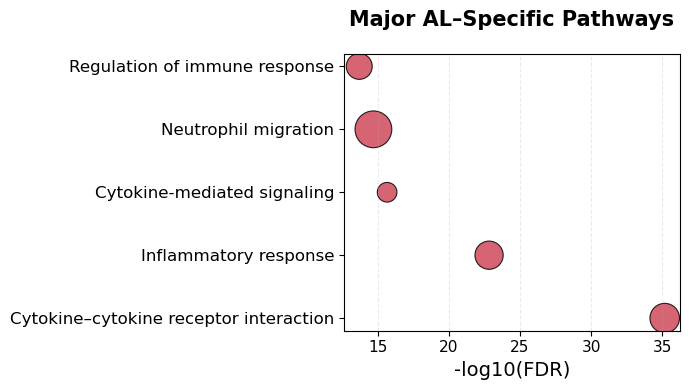

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Major AL Enrichment Table ===
data_major = pd.DataFrame({
    "Term": [
        "Cytokine–cytokine receptor interaction",
        "Inflammatory response",
        "Cytokine-mediated signaling",
        "Neutrophil migration",
        "Regulation of immune response"
    ],
    "Adjusted_P": [
        6.739075e-36,
        1.499404e-23,
        2.210623e-16,
        2.022665e-15,
        2.006915e-14
    ],
    "OddsRatio": [
        5.94,
        5.43,
        2.72,
        9.08,
        4.62
    ]
})

# -log10(FDR)
data_major["neglog10FDR"] = -np.log10(data_major["Adjusted_P"])

# === Bubble size based on Odds Ratio (same scaling as Fig3B) ===
# normalize odds ratio (0–1)
or_norm = (data_major["OddsRatio"] - data_major["OddsRatio"].min()) / \
          (data_major["OddsRatio"].max() - data_major["OddsRatio"].min() + 1e-9)

# scale bubble: 200–1200 range
data_major["size"] = 200 + or_norm * 500

# === Plot ===
plt.figure(figsize=(7, 4))

plt.scatter(
    data_major["neglog10FDR"],
    data_major["Term"],
    s=data_major["size"],
    color="#D1495B",       
    alpha=0.85,
    edgecolor="black",
    linewidth=0.8
)

plt.title("Major AL–Specific Pathways", fontsize=15, loc="center", pad=20,     weight="bold")
plt.xlabel("-log10(FDR)", fontsize=14)
# plt.ylabel("Pathway", fontsize=14)

plt.yticks(fontsize=12)
plt.xticks(fontsize=11)


plt.grid(axis="x", linestyle="--", alpha=0.25)

plt.tight_layout()
plt.show()


## ★ 4.5. Key Biological Pathways of Minor AL-Specific Genes

In [81]:
libs = ['GO_Biological_Process_2021','KEGG_2021_Human','MSigDB_Hallmark_2020']
libs = ['KEGG_2021_Human','MSigDB_Hallmark_2020']

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = minor_genes,    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [83]:
minor_enr = pd.concat(enr_list, axis=0)
minor_enr[minor_enr['Adjusted P-value']<0.05].sort_values(by='Adjusted P-value').head(5)

Gene_set             Term Overlap       P-value  \
0  MSigDB_Hallmark_2020  G2-M Checkpoint  12/200  4.890279e-16   
1  MSigDB_Hallmark_2020      E2F Targets  10/200  1.178016e-12   
1       KEGG_2021_Human   Oocyte meiosis   5/129  2.870160e-06   
0       KEGG_2021_Human       Cell cycle   5/124  2.362616e-06   
2  MSigDB_Hallmark_2020  Mitotic Spindle   5/199  2.361768e-05   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      5.868335e-15            0                     0   54.885291   
1      7.068097e-12            0                     0   41.631579   
1      4.305241e-05            0                     0   26.668011   
0      4.305241e-05            0                     0   27.795518   
2      9.447071e-05            0                     0   16.985395   

   Combined Score                                              Genes  
0     1934.932212  CDC20;CCNB2;UBE2C;TROAP;PLK1;TACC3;BIRC5;RAD54...  
1     1143.502462  CDC20;CCNB2;KIF18B;PLK1;TACC3;BIRC5;SPC24;AURK...  
1      340.314289                       CDC20;SGO1;CCNB2;PLK1;PKMYT1  
0      360.111532                     CDC20;CCNB2;PLK1;PKMYT1;CDC25B  
2      180.954164                        PIF1;CCNB2;PLK1;BIRC5;NDC80

* __[Table 4] Minor AL is primarily involved in cell division-related biological pathways and functions__

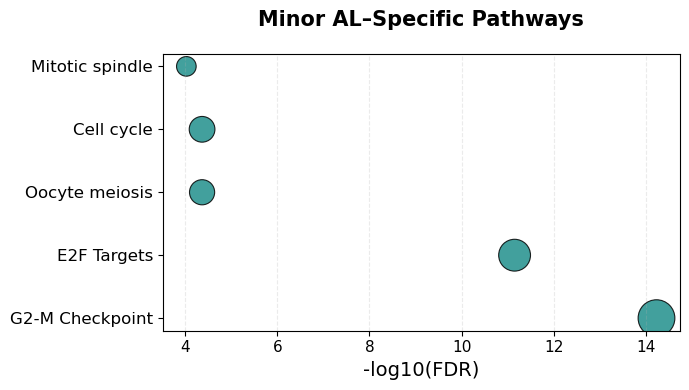

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_minor = pd.DataFrame({
    "Term": [
        "G2-M Checkpoint",
        "E2F Targets",
        "Oocyte meiosis",
        "Cell cycle",
        "Mitotic spindle"
    ],
    "Adjusted_P": [
        5.868e-15,
        7.068e-12,
        4.305e-5,
        4.305e-5,
        9.447e-5
    ],
    "OddsRatio": [
        54.88,
        41.63,
        26.67,
        27.80,
        16.98
    ]
})

# -log10(FDR)
data_minor["neglog10FDR"] = -np.log10(data_minor["Adjusted_P"])

# === Bubble size based on Odds Ratio (same scaling as Fig3B) ===
# normalize odds ratio (0–1)
or_norm = (data_minor["OddsRatio"] - data_minor["OddsRatio"].min()) / \
          (data_minor["OddsRatio"].max() - data_minor["OddsRatio"].min() + 1e-9)

# scale bubble: 200–1200 range
data_minor["size"] = 200 + or_norm * 500

# === Plot ===
plt.figure(figsize=(7, 4))

plt.scatter(
    data_minor["neglog10FDR"],
    data_minor["Term"],
    s=data_minor["size"],
    color="#21908C",       
    alpha=0.85,
    edgecolor="black",
    linewidth=0.8
)

plt.title("Minor AL–Specific Pathways", fontsize=15, loc="center", pad=20,     weight="bold")
plt.xlabel("-log10(FDR)", fontsize=14)
# plt.ylabel("Pathway", fontsize=14)

plt.yticks(fontsize=12)
plt.xticks(fontsize=11)


plt.grid(axis="x", linestyle="--", alpha=0.25)

plt.tight_layout()
plt.show()


## 4.6. Key Biological Pathways of Genes Shared by Major and Minor AL

In [85]:
libs = ['GO_Biological_Process_2021','KEGG_2021_Human','MSigDB_Hallmark_2020']
libs = ['GO_Biological_Process_2021','MSigDB_Hallmark_2020']

In [86]:
common_genes = list(venn_sets['ABC'])

In [ ]:
enr_list = list()
for lib in libs:
    enr = gp.enrichr(
        gene_list = common_genes,    
        gene_sets = lib,            # dict: cluster --> gene list
        organism = 'Human',
    )
    enr_list.append(enr.res2d)

In [88]:
common_enr = pd.concat(enr_list, axis=0)
common_enr['gene#'] = common_enr['Overlap'].apply(lambda x: int(x.split("/")[0]))
common_enr[(common_enr['Adjusted P-value']<0.1) & (common_enr['gene#']>=3) & ~(common_enr.Term.isin(['cellular response to type I interferon (GO:0071357)']))].sort_values(by='Adjusted P-value')

Gene_set  \
0         MSigDB_Hallmark_2020   
1   GO_Biological_Process_2021   
10  GO_Biological_Process_2021   
5   GO_Biological_Process_2021   
14  GO_Biological_Process_2021   

                                                 Term Overlap   P-value  \
0                           Interferon Gamma Response   4/200  0.002701   
1    cytokine-mediated signaling pathway (GO:0019221)   8/621  0.000403   
10   type I interferon signaling pathway (GO:0060337)    3/65  0.000890   
5   regulation of mitotic nuclear division (GO:000...    3/57  0.000606   
14                innate immune response (GO:0045087)   5/302  0.001809   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0           0.051316            0                     0    7.462585   
1           0.054118            0                     0    5.045090   
10          0.054118            0                     0   17.489736   
5           0.054118            0                     0   20.088889   
14          0.080694            0                     0    6.240074   

    Combined Score                                     Genes  gene#  
0        44.135120                     IFI27;OAS2;MX1;FCGR1A      4  
1        39.439901  IFI27;MMP1;OAS2;MX1;LBP;FCGR1A;MMP9;JAK3      8  
10      122.856355                            IFI27;OAS2;MX1      3  
5       148.833163                           BTC;CCNB1;MKI67      3  
14       39.404976                 FCN1;IFI27;MX1;CD300E;LBP      5

* __[Table 5] Key Biological Pathways of Genes Shared by Major and Minor AL__   
   Immune-related biological pathways, such as those involving T cells and IFNγ, are observed to be primarily involved in both Major and Minor AL.


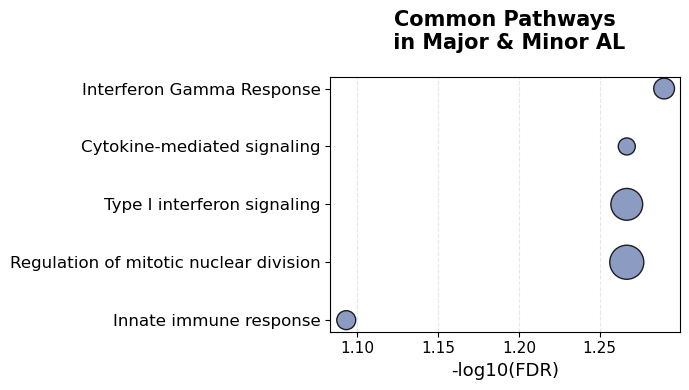

In [ ]:
data = {
    "Pathway": [
        "Innate immune response",
        "Regulation of mitotic nuclear division",
        "Type I interferon signaling",
        "Cytokine-mediated signaling",
        "Interferon Gamma Response"
    ],
    "FDR": [0.080694, 0.054118, 0.054118, 0.054118, 0.051316],
    "Odds": [6.24, 20.08, 17.49, 5.04, 7.46]
}

df = pd.DataFrame(data)
df["neglogFDR"] = -np.log10(df["FDR"])

plt.figure(figsize=(7, 4))

plt.scatter(
    df["neglogFDR"],
    df["Pathway"],
    s=df["Odds"] * 30,
    color="#778AB8",
    alpha=0.85,
    edgecolor="black"
)

plt.xlabel("-log10(FDR)", fontsize=13)
# plt.ylabel("Pathway", fontsize=13)

plt.title(
    "Common Pathways\n in Major & Minor AL",
    fontsize=15,
    weight="bold",
    loc="center",
    pad=20  
)

plt.yticks(fontsize=12)
plt.xticks(fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()

plt.show()


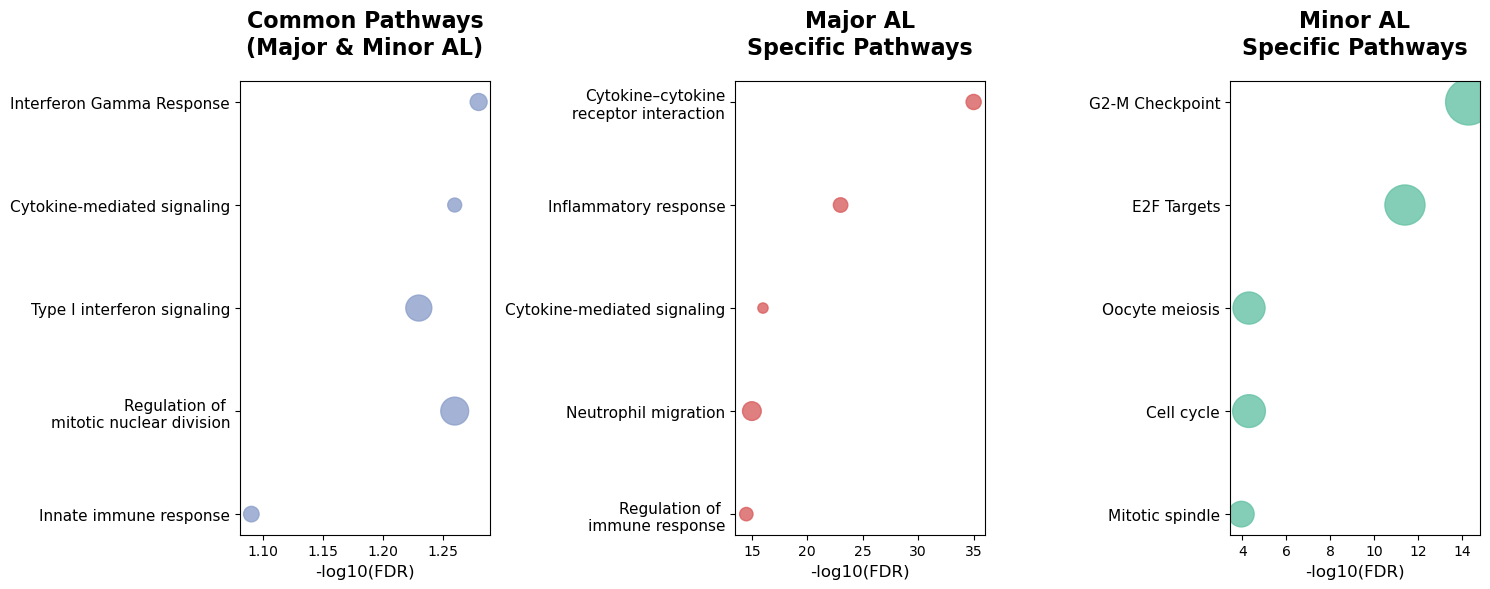

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Input Data
# -------------------------

common_terms = [
    "Interferon Gamma Response",
    "Cytokine-mediated signaling",
    "Type I interferon signaling",
    "Regulation of \nmitotic nuclear division",
    "Innate immune response",
]
common_fdr = [1.28, 1.26, 1.23, 1.26, 1.09]
common_or  = [7.46, 5.04, 17.49, 20.08, 6.24]

major_terms = [
    "Cytokine–cytokine\n receptor interaction",
    "Inflammatory response",
    "Cytokine-mediated signaling",
    "Neutrophil migration",
    "Regulation of \nimmune response",
]
major_fdr = [35.0, 23.0, 16.0, 15.0, 14.5]  # -log10(FDR)
major_or  = [5.94, 5.43, 2.72, 9.07, 4.61]

minor_terms = [
    "G2-M Checkpoint",
    "E2F Targets",
    "Oocyte meiosis",
    "Cell cycle",
    "Mitotic spindle",
]
minor_fdr = [14.3, 11.4, 4.30, 4.30, 3.95]
minor_or  = [54.88, 41.63, 26.67, 27.79, 16.98]

# -------------------------
# Style Settings
# -------------------------
color_common = "#8da0cb"   # blue-ish (consistent with Fig1/2 cool tone)
color_major  = "#d95f5f"   # reddish tone (AL color)
color_minor  = "#66c2a5"   # green/teal (AN-like cool tone)

title_kwargs = dict(fontsize=16, fontweight="bold", loc="center", pad=20)

# -------------------------
# Create figure with 3 subplots
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=False)

# -------------------------
# PANEL B — COMMON PATHWAYS
# -------------------------
ax = axes[0]
sizes = np.array(common_or) * 20

ax.scatter(common_fdr, range(len(common_terms)), s=sizes, color=color_common, alpha=0.8)
ax.set_yticks(range(len(common_terms)))
ax.set_yticklabels(common_terms, fontsize=11)
ax.set_xlabel("-log10(FDR)", fontsize=12)
ax.set_title("Common Pathways\n(Major & Minor AL)", **title_kwargs)
ax.invert_yaxis()

# -------------------------
# PANEL C — MAJOR AL
# -------------------------
ax = axes[1]
sizes = np.array(major_or) * 20

ax.scatter(major_fdr, range(len(major_terms)), s=sizes, color=color_major, alpha=0.8)
ax.set_yticks(range(len(major_terms)))
ax.set_yticklabels(major_terms, fontsize=11)
ax.set_xlabel("-log10(FDR)", fontsize=12)
ax.set_title("Major AL\nSpecific Pathways", **title_kwargs)
ax.invert_yaxis()

# -------------------------
# PANEL D — MINOR AL
# -------------------------
ax = axes[2]
sizes = np.array(minor_or) * 20

ax.scatter(minor_fdr, range(len(minor_terms)), s=sizes, color=color_minor, alpha=0.8)
ax.set_yticks(range(len(minor_terms)))
ax.set_yticklabels(minor_terms, fontsize=11)
ax.set_xlabel("-log10(FDR)", fontsize=12)
ax.set_title("Minor AL\nSpecific Pathways", **title_kwargs)
ax.invert_yaxis()


# Layout tidy
plt.tight_layout()
plt.show()


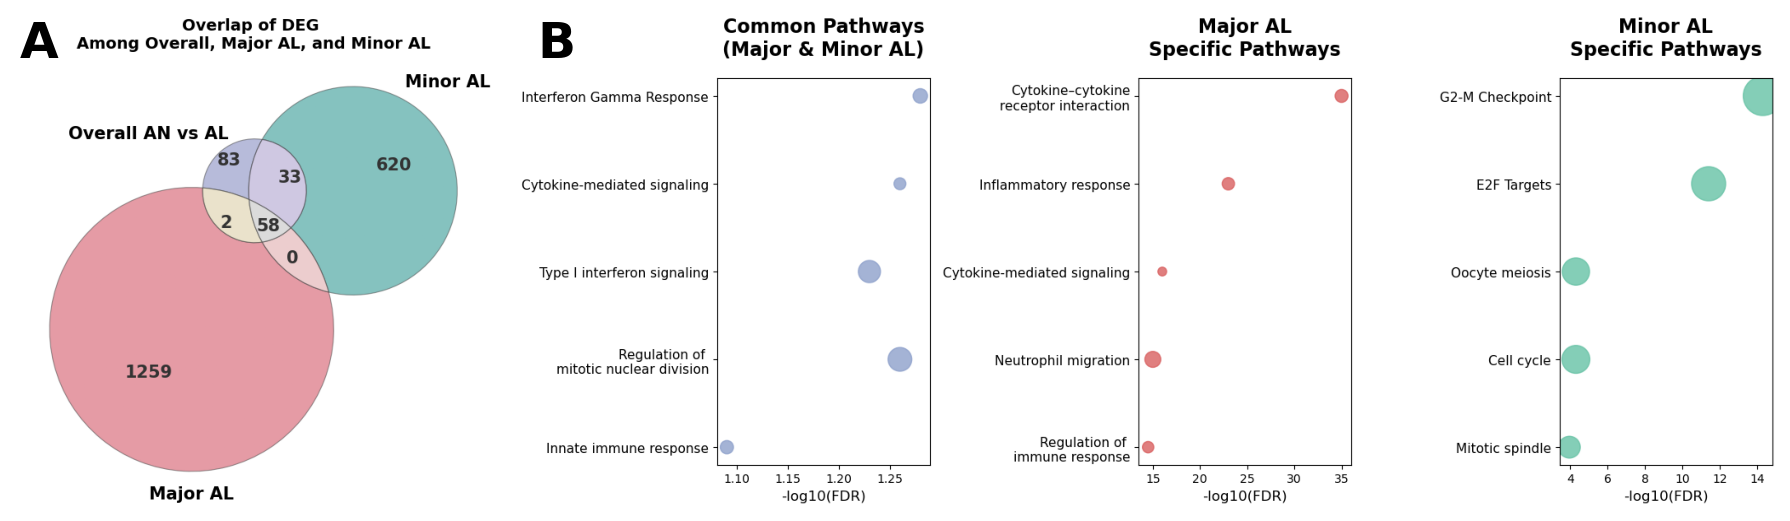

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# file path setting
fig3A_path = f"{project_path}/03_figures/Figure3A.png"   # venn diagram
fig3B_path = f'{project_path}/03_figures/Figure3B.png'

# images
imgA = mpimg.imread(fig3A_path)
imgB = mpimg.imread(fig3B_path)

# overall figure setting
fig, axes = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 2.6]})

# --------------------
# Plot A (left panel)
# --------------------
axes[0].imshow(imgA)
axes[0].axis("off")
axes[0].text(
    0.02, 0.98, "A",
    transform=axes[0].transAxes,
    fontsize=36,
    fontweight="bold",
    va="top", ha="left"
)

# --------------------
# Plot B (right panel)
# --------------------
axes[1].imshow(imgB)
axes[1].axis("off")
axes[1].text(
    0.02, 0.98, "B",
    transform=axes[1].transAxes,
    fontsize=36,
    fontweight="bold",
    va="top", ha="left"
)

plt.tight_layout()
plt.show()


---

# 5. Analysis of Immune Cell Composition in Atopic Dermatitis Samples

> Based on the observation that the key characteristics of Major AL and the shared features   
between Major and Minor AL are deeply associated with immunity, we analyzed the immune cell composition.

## ★ 5.1. CIBERSORT Analysis of Atopic Dermatitis Patient Samples

In [92]:
import matplotlib.patches as mpatches

In [93]:
k_samples = k_samples.sort_values(by='class')
sample_order = k_samples.index.to_list()

In [94]:
cell = pd.read_csv(f'{project_path}/01_data/12_immunodeconv/GSE157194_cibersort.tsv', sep="\t", index_col=0)
cell = cell.loc[(cell.sum(axis=1)>0) & (~cell.index.isin(['P-value','RMSE','Correlation'])),sample_order]
cell.head()

Patient_10_AN_m0  Patient_9_AL_m0  Patient_12_AN_m0  \
B cells naive              0.005758         0.006854          0.026931   
B cells memory             0.000000         0.000000          0.000000   
Plasma cells               0.001078         0.000000          0.000000   
T cells CD8                0.000000         0.000000          0.047459   
T cells CD4 naive          0.000000         0.000000          0.000000   

                   Patient_13_AN_m0  Patient_21_AN_m0  Patient_23_AN_m0  \
B cells naive              0.004955          0.010884          0.033206   
B cells memory             0.000000          0.000000          0.000000   
Plasma cells               0.000000          0.007921          0.000000   
T cells CD8                0.162313          0.106594          0.062380   
T cells CD4 naive          0.033509          0.011665          0.000000   

                   Patient_24_AN_m0  Patient_25_AN_m0  Patient_27_AN_m0  \
B cells naive              0.010155          0.006074          0.000000   
B cells memory             0.000000          0.000000          0.000000   
Plasma cells               0.000000          0.000000          0.000000   
T cells CD8                0.000000          0.000000          0.028933   
T cells CD4 naive          0.000000          0.000000          0.000000   

                   Patient_28_AN_m0  ...  Patient_53_AL_m0  Patient_55_AL_m0  \
B cells naive              0.004822  ...          0.000000          0.000000   
B cells memory             0.000000  ...          0.002042          0.007169   
Plasma cells               0.000000  ...          0.000000          0.000000   
T cells CD8                0.042130  ...          0.007743          0.026389   
T cells CD4 naive          0.000000  ...          0.000000          0.017049   

                   Patient_37_AL_m0  Patient_34_AL_m0  Patient_48_AL_m0  \
B cells naive              0.008638          0.023703          0.000000   
B cells memory             0.000000          0.000000          0.001828   
Plasma cells               0.000000          0.000000          0.000000   
T cells CD8                0.138000          0.013014          0.071682   
T cells CD4 naive          0.000000          0.000000          0.000000   

                   Patient_46_AL_m0  Patient_43_AL_m0  Patient_26_AN_m0  \
B cells naive              0.003494          0.012153          0.000000   
B cells memory             0.006573          0.000000          0.000000   
Plasma cells               0.000000          0.000053          0.000000   
T cells CD8                0.066851          0.083742          0.037873   
T cells CD4 naive          0.000000          0.000000          0.000000   

                   Patient_8_AL_m0  Patient_14_AN_m0  
B cells naive             0.028974          0.003851  
B cells memory            0.000000          0.000000  
Plasma cells              0.002894          0.000000  
T cells CD8               0.020269          0.064900  
T cells CD4 naive         0.000000          0.000000  

[5 rows x 111 columns]

In [95]:
cell = cell.T
cell['M1/M2'] = cell[['Macrophages M1','Macrophages M2']].apply(lambda x: x[0]/x[1], axis=1)
cell = cell.T

/tmp/ipykernel_122386/2369078282.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell['M1/M2'] = cell[['Macrophages M1','Macrophages M2']].apply(lambda x: x[0]/x[1], axis=1)


In [96]:
k_samples['Subtype'] = k_samples['class'].apply(lambda x: 'Non-lesional' if x==1 else 'Major subtype' if x==2 else 'Minor subtype')

In [ ]:
class_palette = {
    'Non-lesional': "#8da0cb",   # blue
    'Major subtype': "#d95f5f",   # red
    'Minor subtype': "#66c2a5"    # green
}

In [98]:
col_colors = k_samples.loc[cell.columns, "Subtype"].map(class_palette)

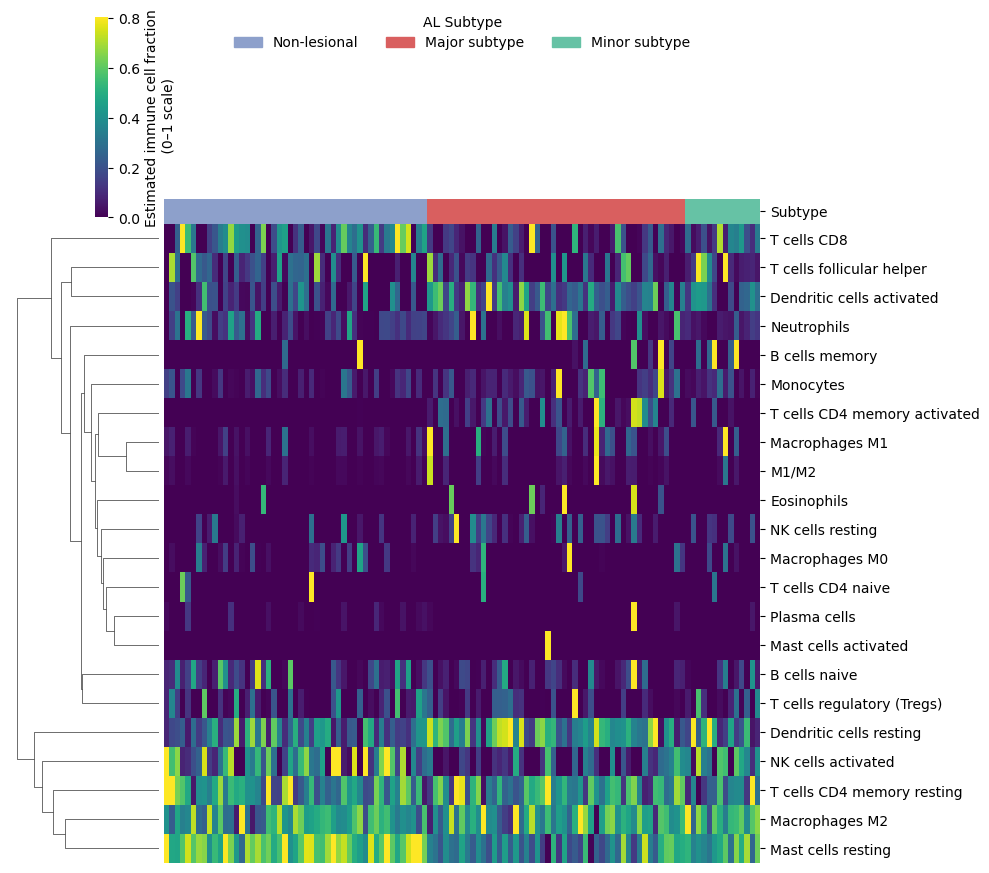

In [ ]:
g = sns.clustermap(cell, standard_scale=0, robust=True, cmap='viridis', col_cluster=False, 
    cbar_pos=(0.1, .8, .013, .2),
    col_colors=col_colors)

handles = [
    mpatches.Patch(color=color, label=f"{cls_id}")
    for cls_id, color in class_palette.items()
]

g.ax_col_dendrogram.legend(
    handles=handles,
    title="AL Subtype",
    loc="center",
    bbox_to_anchor=(0.5, 1.0),
    ncol=3,
    frameon=False
)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel("")

cbar = g.ax_cbar
cbar.set_ylabel("Estimated immune cell fraction\n (0–1 scale)", fontsize=10)

plt.show()

* __[Fig. 7] Analysis of immune cells in AN, Major AL, and Minor AL patients__

## ★ 5.2. Analysis of Differential Immune Cells Between Major and Minor AL

In [100]:
cls.index = cls.sample_name
cls = cls.merge(k_samples,left_index=True,right_index=True)
cls.head()

sample_name pathology  class   entropy  silhouette  \
Patient_10_AN_m0  Patient_10_AN_m0        AN      1  0.000000    0.975893   
Patient_11_AN_m0  Patient_11_AN_m0        AN      2  0.000000    0.997347   
Patient_12_AN_m0  Patient_12_AN_m0        AN      1  0.152869    0.940549   
Patient_13_AN_m0  Patient_13_AN_m0        AN      1  0.000000    0.975893   
Patient_14_AN_m0  Patient_14_AN_m0        AN      3  0.000000    0.921781   

                        Subtype  
Patient_10_AN_m0   Non-lesional  
Patient_11_AN_m0  Major subtype  
Patient_12_AN_m0   Non-lesional  
Patient_13_AN_m0   Non-lesional  
Patient_14_AN_m0  Minor subtype

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# ==========================================
# 1. Merge data
# ==========================================

if 'sample_name' in cls.columns:
    cls = cls.set_index('sample_name')

merged_df = pd.merge(cell.T, cls[['class', 'pathology']], left_index=True, right_index=True)

target_df = merged_df[merged_df['class'].isin([2, 3])]
target_df = target_df[target_df['pathology']=='AL']

an_df = merged_df[(merged_df['class']==1) & (merged_df['pathology']=='AN')]
target_df = pd.concat([target_df, an_df])

target_df['Subtype'] = target_df['class'].map({1:'Non-lesional', 2: 'Major subtype', 3: 'Minor subtype'})

In [ ]:
# ==========================================
# 2. Statistical Analysis
# ==========================================
p_val_threshold = 0.05
sig_cells = []

immune_cells = cell.T.columns.tolist()

for cell_type in immune_cells:
    group_an = target_df[target_df['class']==1][cell_type]
    group_major = target_df[target_df['class'] == 2][cell_type]
    group_minor = target_df[target_df['class'] == 3][cell_type]
    
    if (group_major.sum() == 0) and (group_minor.sum() == 0) and (group_an.sum()==0):
        continue
        
    # T-test 수행
    t_stat, p_val = ttest_ind(group_major, group_minor, equal_var=False) # Welch's t-test
    t_stat_major, p_val_major = ttest_ind(group_an, group_major, equal_var=False) # Welch's t-test
    
    if p_val < p_val_threshold:
        sig_cells.append({'cell_type': cell_type, 'p_val': p_val, 'category':'Major vs. Minor'})

    if p_val_major < p_val_threshold:
        sig_cells.append({'cell_type': cell_type, 'p_val': p_val_major, 'category':'AN vs. Major'})

sig_cells_df = pd.DataFrame(sig_cells).sort_values('p_val')
top_cells = sig_cells_df['cell_type'].unique().tolist()

print(f"# of Significant cells: {len(top_cells)}")
print(sig_cells_df)

유의미한 차이를 보인 세포 수: 9
                       cell_type         p_val         category
11            Mast cells resting  6.709930e-14     AN vs. Major
9      Dendritic cells activated  6.504919e-06     AN vs. Major
0                    T cells CD8  1.105556e-05     AN vs. Major
5             NK cells activated  4.036726e-05     AN vs. Major
2   T cells CD4 memory activated  6.431065e-05     AN vs. Major
1   T cells CD4 memory activated  2.550533e-03  Major vs. Minor
7        Dendritic cells resting  2.785738e-03     AN vs. Major
3               NK cells resting  7.038086e-03     AN vs. Major
12                   Neutrophils  1.426255e-02  Major vs. Minor
10            Mast cells resting  1.825808e-02  Major vs. Minor
4             NK cells activated  2.429589e-02  Major vs. Minor
6                 Macrophages M1  2.818850e-02     AN vs. Major
8      Dendritic cells activated  3.699497e-02  Major vs. Minor


In [103]:
import scipy.stats as stats
import numpy as np

def add_sig_bar(ax, x1, x2, y, p, h=0.02, fontsize=12):
    """ x1–x2 between-group significance bar with * """
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c='gray',linestyle='--')

    if p < 0.001:
        text = "***"
    elif p < 0.01:
        text = "**"
    elif p < 0.05:
        text = "*"
    else:
        text = "n.s"

    ax.text((x1+x2)/2, y+h*1.2, text, ha='center', va='bottom', fontsize=fontsize)


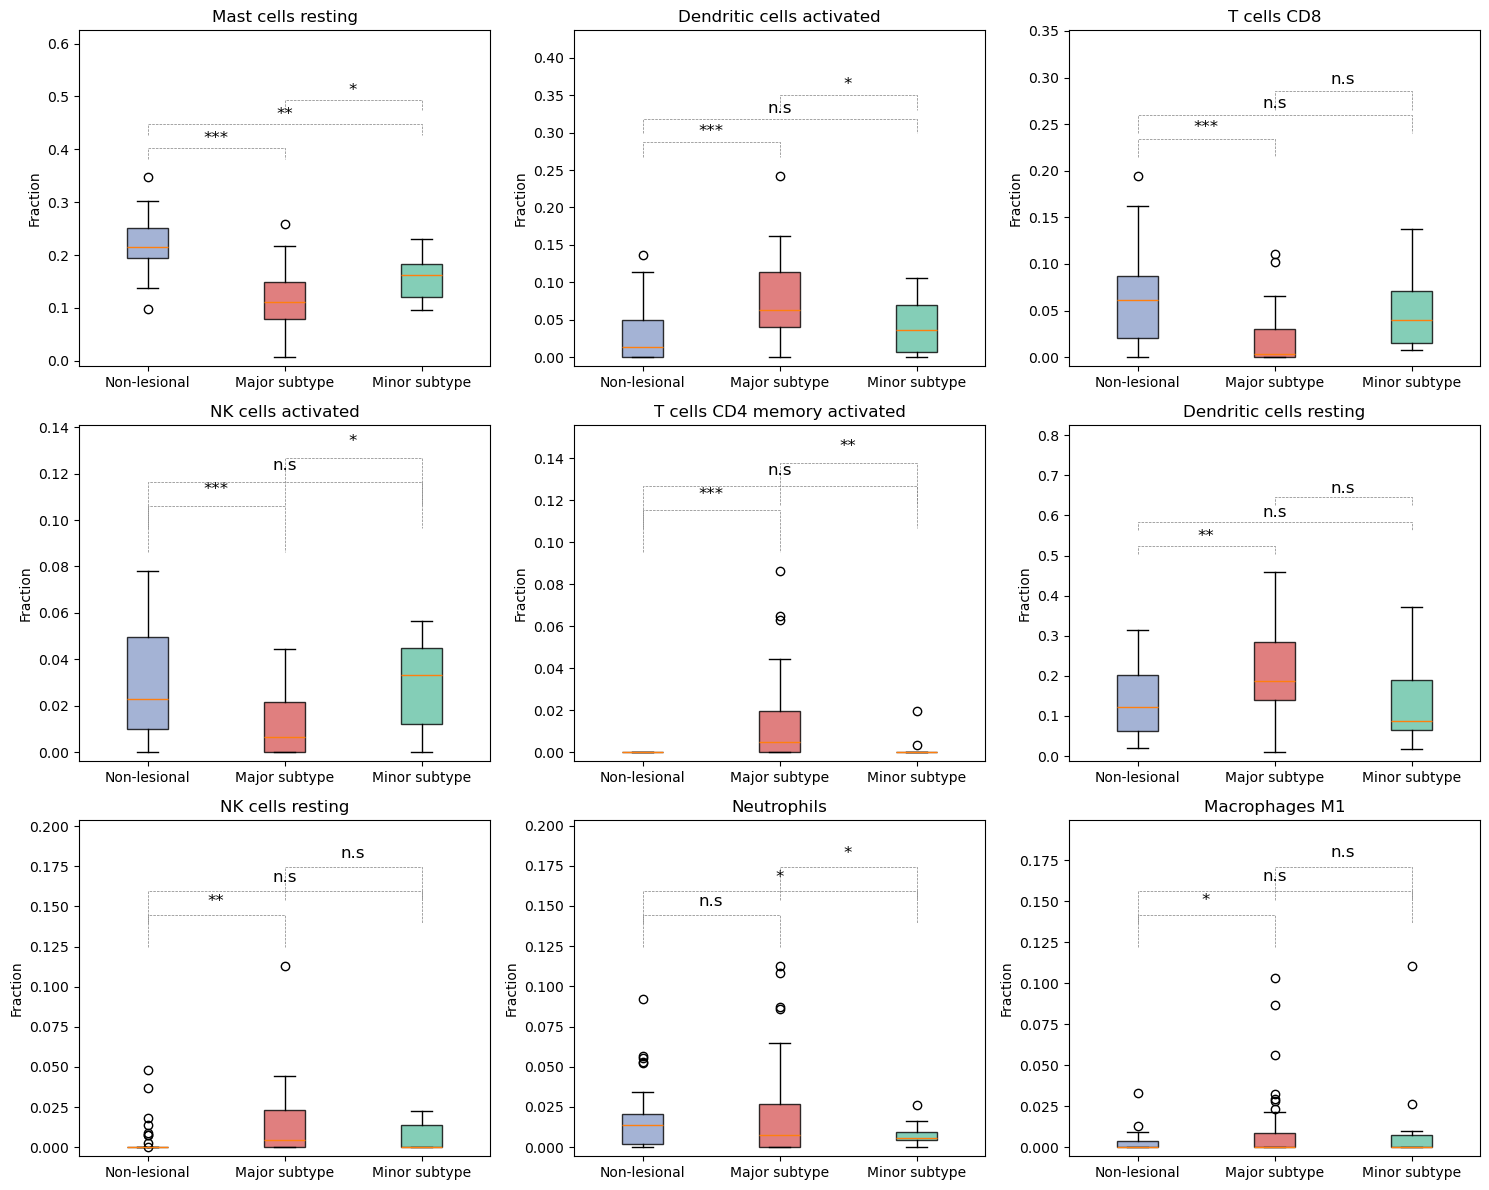

In [ ]:
# ==========================================
# 3. Boxplot 
# ==========================================
n_cols = 3
n_rows = (len(top_cells) + n_cols - 1) // n_cols

order = ['Non-lesional', 'Major subtype', 'Minor subtype']
colors = ['#8da0cb', '#d95f5f', '#66c2a5']

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()


for i, cell_type in enumerate(top_cells):
    ax = axes[i]

    data = [target_df.loc[target_df['Subtype'] == g, cell_type].dropna() for g in order]

    # Boxplot
    box = ax.boxplot(data, patch_artist=True)
    # sns.stripplot(data)


    current_max = max([
        target_df.loc[target_df['Subtype'] == g, cell_type].max()
        for g in order
    ])

    padding = max(current_max * 0.8, 0.05)
    ax.set_ylim(top=current_max + padding)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)

    ax.set_xticklabels(order, rotation=0)
    ax.set_ylabel("Fraction")
    ax.set_title(f"{cell_type}")

    p_kw = stats.kruskal(*data)[1]
    ymax = max([d.max() for d in data]) * 1.1

    # pairwise
    p12 = stats.ttest_ind(data[0], data[1], equal_var=False)[1]
    p13 = stats.ttest_ind(data[0], data[2], equal_var=False)[1]
    p23 = stats.ttest_ind(data[1], data[2], equal_var=False)[1]

    add_sig_bar(ax, 1, 2, ymax, p12)
    add_sig_bar(ax, 1, 3, ymax*1.12, p13)
    add_sig_bar(ax, 2, 3, ymax*1.24, p23)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


* __[Fig. 8] Immune cells showing differences between Major and Minor AL__

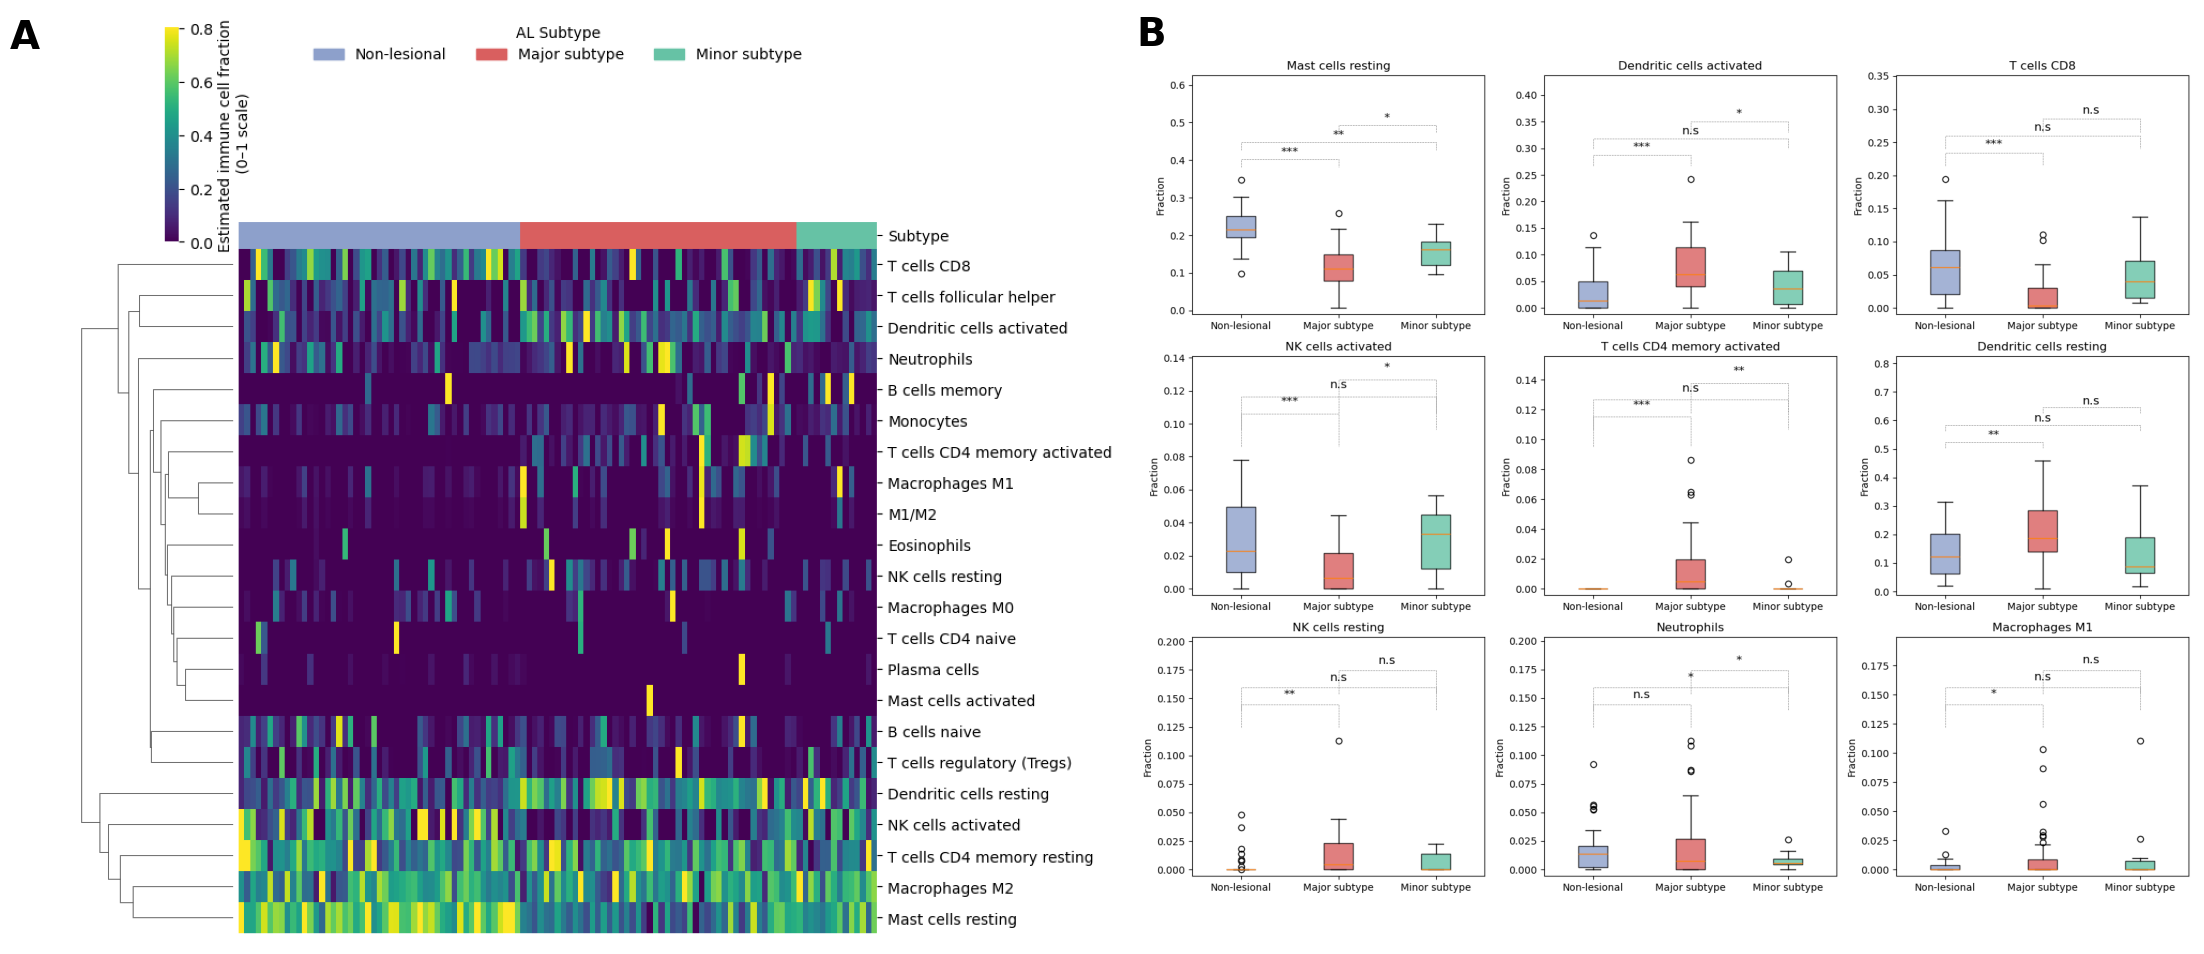

In [ ]:
figA_path = f"{project_path}/03_figures/Figure4A.png"
figB_path = f"{project_path}/03_figures/Figure4B.png"

# ---- Load images ----
imgA = np.array(Image.open(figA_path))
imgB = np.array(Image.open(figB_path))

# ---- Create new figures ----
fig, axes = plt.subplots(1, 2, figsize=(22, 10))  

# ---- Panel A ----
axes[0].imshow(imgA)
axes[0].axis("off")
# axes[0].set_title("A", fontsize=28, fontweight="bold", loc='left')

axes[0].text(
    -0.05,             
    0.99,              
    "A",
    transform=axes[0].transAxes,
    fontsize=28,
    fontweight="bold",
    va='top',
    ha='left'
)

# ---- Panel B ----
axes[1].imshow(imgB)
axes[1].axis("off")
axes[1].set_title("B", fontsize=28, fontweight="bold", loc='left')


plt.tight_layout()
plt.savefig(f"{project_path}/03_figures/Figure4.png", dpi=300, bbox_inches="tight")
plt.show()

---

# ★ 6. Analysis of Drug Responsiveness (Dupilumab, Cyclosporine) by Major and Minor AL

In [106]:
cls_dic = dict(zip(["_".join(x.split("_")[:2]) for x in k_samples.index], k_samples['class']))

In [107]:
meta = pd.read_csv(f'{project_path}/01_data/00_meta/meta.tsv', sep="\t")
meta['sample_name'] = meta[['patient_id','source_name']].apply(lambda x: "_".join([x[0], "_".join(x[1].split("_")[::-1][:2])]), axis=1)
meta['treatment'] = meta['sample_name'].apply(lambda x: x.split("_")[-1])
meta['drug'] = meta['source_name'].apply(lambda x: x.replace("_AL","").replace("_AN","").replace("m0","").replace("m3","").replace("_",""))
meta['pathology']= meta['source_name'].apply(lambda x: x.split("_")[-1])
meta = meta.set_index('sample_name')[['patient_id','timepoint','source_name', 'pathology', 'treatment',"drug"]]
meta['class'] = meta['patient_id'].apply(lambda x: cls_dic[x] if x in cls_dic else None)

/tmp/ipykernel_122386/2478551200.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  meta['sample_name'] = meta[['patient_id','source_name']].apply(lambda x: "_".join([x[0], "_".join(x[1].split("_")[::-1][:2])]), axis=1)


In [108]:
pd.DataFrame(meta[['class','drug']].value_counts()).sort_index()

count
class drug               
1                      12
      cyclosporine      4
      dupilumab         2
2                      74
      cyclosporine      7
      dupilumab        32
3                      25
      cyclosporine      4
      dupilumab         6

## ★ 6.1. Analysis of Drug Responsiveness in Major AL

### 6.1.1. Data Preparation for Dupilumab Responsiveness Analysis in Major Subtype

In [109]:
from numpy.linalg import norm

In [110]:
treatment_sample_list = meta[(meta['class']==2) & (meta['drug']=='dupilumab') & (meta.pathology=='AL')].index.to_list()
notreatment_sample_list = [x.replace("_m3","_m0") for x in treatment_sample_list]

In [111]:
drug_count = symbol_count_df.copy()
drug_count = drug_count.loc[:,drug_count.columns.isin(treatment_sample_list+notreatment_sample_list)]
drug_count.to_csv(f'{project_path}/01_data/05_deseq/major_dupilumab_count.tsv', sep="\t", index=True)

In [112]:
drug_cls = pd.DataFrame({'sample_id':drug_count.columns.to_list()})
drug_cls['drug'] = drug_cls['sample_id'].apply(lambda x: x.split("_")[-1])
drug_cls.to_csv(f'{project_path}/01_data/05_deseq/major_dupilumab.cls', sep="\t", index=False)

### 6.1.2. Identification of AN vs. AL DEGs in Major Subtype Treated with Dupilumab

In [113]:
major = pd.read_csv(f'{project_path}/01_data/05_deseq/majorAL_deseq.tsv', sep="\t", index_col=0)
major_deg = major[(major['padj']<0.05) & (major['log2FoldChange'].apply(abs)>=1)]
major

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
5S_rRNA      0.420771        0.360251  0.553258  0.651146  5.149522e-01   
7SK          0.070965       -0.318582  1.874339 -0.169970  8.650336e-01   
A1BG         1.006373        0.715843  0.380599  1.880834  5.999452e-02   
A1BG-AS1    45.069290        0.372856  0.121027  3.080765  2.064698e-03   
A2M       5765.695181        0.498830  0.112654  4.427979  9.512022e-06   
...               ...             ...       ...       ...           ...   
ZYG11B     752.970511       -0.103685  0.069994 -1.481330  1.385186e-01   
ZYX       2513.015292        0.521097  0.087681  5.943097  2.796867e-09   
ZZEF1     1841.338970        0.025474  0.069279  0.367706  7.130927e-01   
ZZZ3       969.189597       -0.105899  0.067829 -1.561263  1.184617e-01   
snoZ196      0.572210        0.606475  0.501769  1.208673  2.267885e-01   

                  padj  
5S_rRNA   6.426200e-01  
7SK                NaN  
A1BG      1.182969e-01  
A1BG-AS1  6.682410e-03  
A2M       5.536160e-05  
...                ...  
ZYG11B    2.354423e-01  
ZYX       3.514830e-08  
ZZEF1     8.042412e-01  
ZZZ3      2.074076e-01  
snoZ196   3.468814e-01  

[33260 rows x 6 columns]

In [114]:
drug_deseq = pd.read_csv(f'{project_path}/01_data/05_deseq/major_dupilumab.tsv', sep="\t", index_col=0)
drug_deseq = drug_deseq[drug_deseq.index.isin(major.index)]
drug_deseq = drug_deseq.loc[major.index]
drug_deseq_deg = drug_deseq[drug_deseq.index.isin(major_deg.index)]
drug_deseq_deg = drug_deseq_deg.loc[major_deg.index]

### 6.1.3. Comparison Between Dupilumab-Induced Expression Changes and AN vs. AL Expression Patterns in Major AL   

In [115]:
v1 = major_deg['log2FoldChange'].values
v2 = drug_deseq_deg['log2FoldChange'].values

cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))
print("Cosine similarity:", cosine_sim)

Cosine similarity: -0.5753565109012183


In [116]:
class_palette = {
    'Non-lesional': "#8da0cb",   # blue
    'Major subtype': "#d95f5f",   # red
    'Minor subtype': "#66c2a5"    # green
}

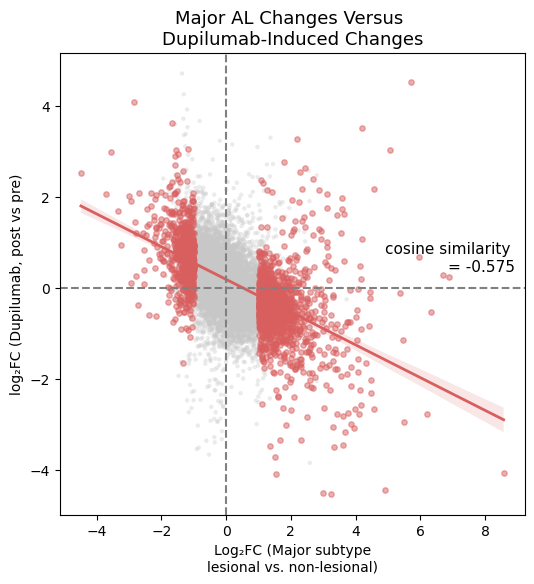

In [ ]:
deg_color = '#d95f5f'
bg_color = '#c7c7c7'   # light gray

plt.figure(figsize=(6,6))

plt.scatter(
    major[~major.index.isin(major_deg.index)]['log2FoldChange'], drug_deseq[~drug_deseq.index.isin(drug_deseq_deg.index)]['log2FoldChange'],
    s=10, alpha=0.35, color=bg_color, edgecolors='none'
)

# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=major_deg['log2FoldChange'], y=drug_deseq_deg['log2FoldChange'],  color=deg_color, scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': deg_color, 'lw': 2},)
plt.xlabel("Log₂FC (Major subtype\nlesional vs. non-lesional)")
plt.ylabel("log₂FC (Dupilumab, post vs pre)")
plt.title("Major AL Changes Versus \nDupilumab-Induced Changes", fontsize=13)

plt.text(
    0.98, 0.52,
    f"cosine similarity \n= {cosine_sim:.3f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    ha='right', va='bottom'
)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

* __[Fig. 9] Inverse Relationship Between Major Subtype Differential Expression and Dupilumab Response__

### 6.1.4. Identification of Differentially Expressed Genes Between AN and AL in the Major Subtype After Cyclosporine Treatment   

In [118]:
treatment_sample_list = meta[(meta['class']==2) & (meta['drug']=='cyclosporine') & (meta.pathology=='AL')].index.to_list()
notreatment_sample_list = [x.replace("_m3","_m0") for x in treatment_sample_list]

In [119]:
drug_count = symbol_count_df.copy()
drug_count = drug_count.loc[:,drug_count.columns.isin(treatment_sample_list+notreatment_sample_list)]
drug_count.to_csv(f'{project_path}/01_data/05_deseq/major_cyclosporine_count.tsv', sep="\t", index=True)

In [120]:
drug_cls = pd.DataFrame({'sample_id':drug_count.columns.to_list()})
drug_cls['drug'] = drug_cls['sample_id'].apply(lambda x: x.split("_")[-1])
drug_cls.to_csv(f'{project_path}/01_data/05_deseq/major_cyclosporine.cls', sep="\t", index=False)

In [121]:
major = pd.read_csv(f'{project_path}/01_data/05_deseq/majorAL_deseq.tsv', sep="\t", index_col=0)
major_deg = major[(major['padj']<0.05) & (major['log2FoldChange'].apply(abs)>=1)]
major

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
5S_rRNA      0.420771        0.360251  0.553258  0.651146  5.149522e-01   
7SK          0.070965       -0.318582  1.874339 -0.169970  8.650336e-01   
A1BG         1.006373        0.715843  0.380599  1.880834  5.999452e-02   
A1BG-AS1    45.069290        0.372856  0.121027  3.080765  2.064698e-03   
A2M       5765.695181        0.498830  0.112654  4.427979  9.512022e-06   
...               ...             ...       ...       ...           ...   
ZYG11B     752.970511       -0.103685  0.069994 -1.481330  1.385186e-01   
ZYX       2513.015292        0.521097  0.087681  5.943097  2.796867e-09   
ZZEF1     1841.338970        0.025474  0.069279  0.367706  7.130927e-01   
ZZZ3       969.189597       -0.105899  0.067829 -1.561263  1.184617e-01   
snoZ196      0.572210        0.606475  0.501769  1.208673  2.267885e-01   

                  padj  
5S_rRNA   6.426200e-01  
7SK                NaN  
A1BG      1.182969e-01  
A1BG-AS1  6.682410e-03  
A2M       5.536160e-05  
...                ...  
ZYG11B    2.354423e-01  
ZYX       3.514830e-08  
ZZEF1     8.042412e-01  
ZZZ3      2.074076e-01  
snoZ196   3.468814e-01  

[33260 rows x 6 columns]

In [122]:
drug_deseq = pd.read_csv(f'{project_path}/01_data/05_deseq/major_cyclosporine.tsv', sep="\t", index_col=0)
drug_deseq = drug_deseq[drug_deseq.index.isin(major.index)]
drug_deseq = drug_deseq.loc[major.index].fillna(0)
drug_deseq_deg = drug_deseq[drug_deseq.index.isin(major_deg.index)]
drug_degseq_deg = drug_deseq_deg.loc[major_deg.index]

### 6.1.5. Comparison of Cyclosporine-Induced Expression Changes and AN vs. AL Expression Patterns in the Major Subtype   

In [123]:
v1 = major_deg['log2FoldChange'].values
v2 = drug_deseq_deg['log2FoldChange'].values

cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))
print("Cosine similarity:", cosine_sim)

Cosine similarity: -0.4532719728161474


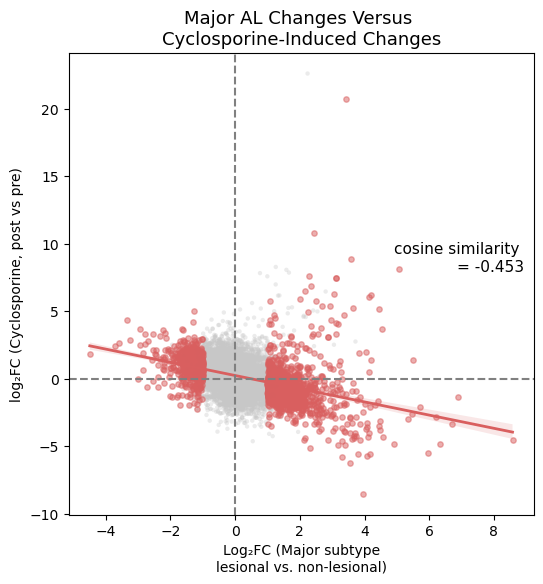

In [ ]:
deg_color = '#d95f5f'
bg_color = '#c7c7c7'   # light gray

plt.figure(figsize=(6,6))

plt.scatter(
    major[~major.index.isin(major_deg.index)]['log2FoldChange'], drug_deseq[~drug_deseq.index.isin(drug_deseq_deg.index)]['log2FoldChange'],
    s=10, alpha=0.35, color=bg_color, edgecolors='none'
)

# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=major_deg['log2FoldChange'], y=drug_deseq_deg['log2FoldChange'],  color=deg_color, scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': deg_color, 'lw': 2},)
plt.xlabel("Log₂FC (Major subtype\nlesional vs. non-lesional)")
plt.ylabel("log₂FC (Cyclosporine, post vs pre)")
plt.title("Major AL Changes Versus \nCyclosporine-Induced Changes", fontsize=13)

plt.text(
    0.98, 0.52,
    f"cosine similarity \n= {cosine_sim:.3f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    ha='right', va='bottom'
)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

* __[Fig. 10] Inverse Relationship Between Major Subtype Differential Expression and Cyclosporine Response__

> Gene expression patterns observed in lesional skin of the major subtype exhibit a strong inverse relationship with transcriptional changes induced by both dupilumab and cyclosporine.   
> This inverse concordance suggests that both drugs are likely to be effective in patients belonging to the major subtype.

### 6.1.6. Analysis of Major Subtype Responsiveness to Other Drugs in the DrugSeq Dataset

In [125]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [126]:
major = pd.read_csv(f'{project_path}/01_data/05_deseq/majorAL_deseq.tsv', sep="\t", index_col=0)
major = major[(major['padj']<0.05) & (major['log2FoldChange'].apply(abs)>=1)]
major

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA9      285.170685       -1.084388  0.187325 -5.788800  7.089119e-09   
ABCB11      10.104287       -1.578296  0.278370 -5.669783  1.429787e-08   
ABCC6P1      1.263997       -1.137310  0.372651 -3.051947  2.273625e-03   
ABCG4       78.954202        1.967256  0.249673  7.879339  3.291182e-15   
ABCG8        0.786630       -1.237999  0.476680 -2.597126  9.400736e-03   
...               ...             ...       ...       ...           ...   
ZNF831      45.693898        1.183994  0.201598  5.873050  4.278488e-09   
ZNF878       4.451740        2.087392  0.291380  7.163812  7.846387e-13   
ZP4          1.390317        3.620531  0.589101  6.145854  7.953446e-10   
ZSCAN12P1   11.741101        1.100170  0.228368  4.817529  1.453470e-06   
ZSCAN4       5.176370       -1.242681  0.272634 -4.558059  5.162863e-06   

                   padj  
ABCA9      8.143501e-08  
ABCB11     1.540468e-07  
ABCC6P1    7.276789e-03  
ABCG4      1.410309e-13  
ABCG8      2.473775e-02  
...                 ...  
ZNF831     5.154409e-08  
ZNF878     2.057721e-11  
ZP4        1.113938e-08  
ZSCAN12P1  1.006894e-05  
ZSCAN4     3.195673e-05  

[1937 rows x 6 columns]

In [127]:
drugseq = pd.read_csv('/home/data1/public_db/01_public_data/DrugSeq/gene_attribute_matrix_standardized.txt', sep="\t", index_col=0, low_memory=False)
drugseq

AA-01-JO26_0.01uM  AA-01-JO26_0.1uM  AA-01-JO26_10uM  AA-01-JO26_1uM  \
Gene                                                                           
A1BG            -0.002749          0.032244         0.002259        0.101277   
A2M             -0.008237         -0.006582        -0.008913       -0.000269   
A4GALT          -0.003568         -0.002679        -0.011184       -0.002373   
AAAS             0.008115          0.006323         0.002524       -0.006528   
AACS             0.024804         -0.005548        -0.003881        0.005946   
...                   ...               ...              ...             ...   
ZXDB            -0.000282          0.000906        -0.000903       -0.006853   
ZXDC             0.000000         -0.005601        -0.001972       -0.001295   
ZYG11B          -0.037036          0.000000         0.000000        0.009598   
ZYX              0.016490          0.015439         0.005784        0.027089   
ZZEF1            0.000000          0.003928         0.000000       -0.005357   

        AA-01-PS31_0.01uM  AA-01-PS31_0.1uM  AA-01-PS31_10uM  AA-01-PS31_1uM  \
Gene                                                                           
A1BG             0.000000               0.0              0.0       -0.004304   
A2M              0.000000               0.0              0.0        0.000000   
A4GALT           0.000000               0.0              0.0        0.000000   
AAAS             0.000000               0.0              0.0        0.000000   
AACS             0.000000               0.0              0.0       -0.000030   
...                   ...               ...              ...             ...   
ZXDB             0.001012               0.0              0.0        0.000000   
ZXDC             0.000000               0.0              0.0       -0.003915   
ZYG11B           0.000000               0.0              0.0        0.000748   
ZYX              0.000000               0.0              0.0       -0.017703   
ZZEF1            0.001902               0.0              0.0        0.000000   

        AA-01-XV28_0.01uM  AA-01-XV28_0.1uM  ...  ZE-79-HJ46_10uM  \
Gene                                         ...                    
A1BG             0.012086         -0.040993  ...         0.000000   
A2M              0.052372         -0.002086  ...         0.000000   
A4GALT          -0.002459          0.004178  ...         0.000000   
AAAS             0.016793          0.005962  ...         0.000000   
AACS             0.013481          0.011564  ...        -0.010504   
...                   ...               ...  ...              ...   
ZXDB            -0.040828         -0.011742  ...         0.000000   
ZXDC            -0.036232         -0.010434  ...         0.000000   
ZYG11B          -0.001908          0.005755  ...         0.000000   
ZYX             -0.010629          0.030526  ...         0.000000   
ZZEF1            0.002802          0.000000  ...         0.000000   

        ZE-79-HJ46_1uM  ZF-00-MX33_0.01uM  ZF-00-MX33_0.1uM  ZF-00-MX33_10uM  \
Gene                                                                           
A1BG               0.0           0.000329          0.000000         0.000550   
A2M                0.0          -0.000790         -0.001021        -0.018178   
A4GALT             0.0          -0.014331          0.000000         0.000834   
AAAS               0.0          -0.012012          0.000000        -0.010042   
AACS               0.0          -0.005744          0.000000        -0.015438   
...                ...                ...               ...              ...   
ZXDB               0.0           0.000000          0.000000         0.007342   
ZXDC               0.0          -0.006018          0.000213         0.004150   
ZYG11B             0.0           0.000816          0.000225        -0.001211   
ZYX                0.0           0.009177         -0.000734        -0.035809   
ZZEF1              0.0           0.000000          0.001021        -

In [128]:
common = drugseq[drugseq.index.isin(major.index)].index.to_list()
major = major.loc[common]
major_drug = drugseq.loc[common]

In [129]:
drug_list = list()
for drug, profile in major_drug.T.iterrows():
    r = stats.spearmanr(major['log2FoldChange'], profile)
    corr = stats.pearsonr(major['log2FoldChange'], profile)
    drug_list.append([drug, r.statistic, r.pvalue, corr.statistic])
drug_df = pd.DataFrame(drug_list)
drug_df.columns = ['drug','statistic', 'pvalue', 'cor']
drug_df['pvalue'] = drug_df['pvalue'].fillna(1)
drug_df['fdr'] = multipletests(drug_df['pvalue'], method='fdr_bh')[1]

/tmp/ipykernel_122386/2874944368.py:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.spearmanr(major['log2FoldChange'], profile)
/tmp/ipykernel_122386/2874944368.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = stats.pearsonr(major['log2FoldChange'], profile)


In [130]:
drug_df[(drug_df.statistic < 0) & (drug_df.fdr < 0.05)].sort_values(by='fdr')

drug  statistic    pvalue       cor       fdr
4811   CB-82-PL01_10uM  -0.149734  0.000303 -0.073627  0.021141
15934  ZE-46-XH09_10uM  -0.137654  0.000906 -0.062243  0.046368

In [131]:
v1 = major['log2FoldChange'].values
v2 = major_drug['CB-82-PL01_10uM'].values

cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))

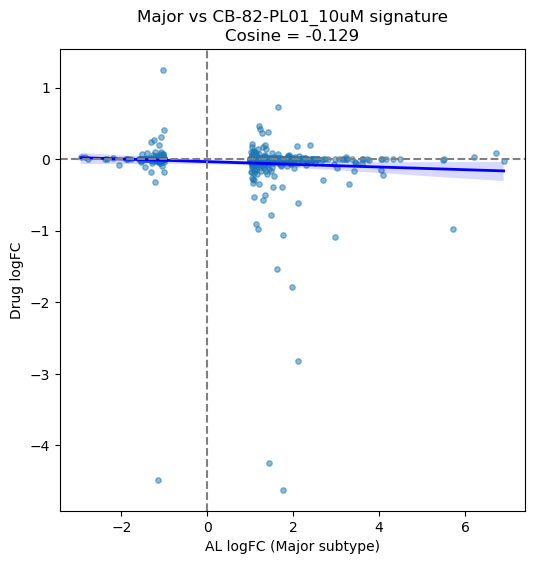

In [132]:
plt.figure(figsize=(6,6))
# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=v1, y=v2,  scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': 'blue', 'lw': 2},)
plt.xlabel("AL logFC (Major subtype)")
plt.ylabel("Drug logFC")
plt.title(f"Major vs CB-82-PL01_10uM signature\nCosine = {cosine_sim:.3f}")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [133]:
v1 = major['log2FoldChange'].values
v2 = major_drug['ZE-46-XH09_10uM'].values

cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))

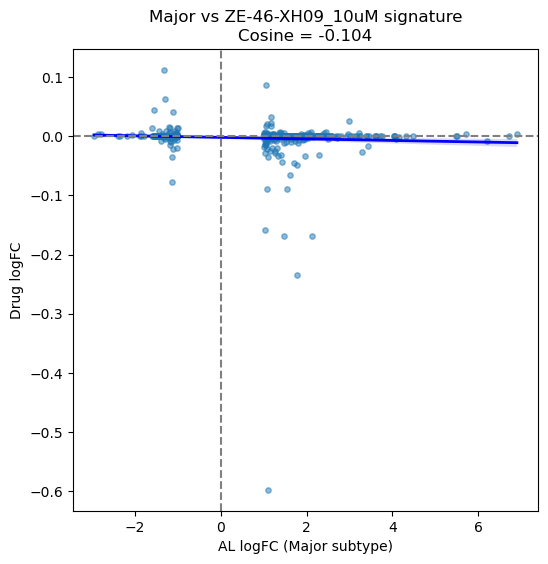

In [134]:
plt.figure(figsize=(6,6))
# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=v1, y=v2,  scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': 'blue', 'lw': 2},)
plt.xlabel("AL logFC (Major subtype)")
plt.ylabel("Drug logFC")
plt.title(f"Major vs ZE-46-XH09_10uM signature\nCosine = {cosine_sim:.3f}")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

> No drugs superior to dupilumab and cyclosporine in DrugSeq data 

---

## ★ 6.2. Drug Responsiveness of the Minor AL Subtype 

### 6.2.1. Identification of Differentially Expressed Genes Between AN and AL in the Minor Subtype   

In [135]:
treatment_sample_list = meta[(meta['class']==3) & (meta['drug']=='dupilumab') & (meta.pathology=='AL')].index.to_list()
notreatment_sample_list = [x.replace("_m3","_m0") for x in treatment_sample_list]

In [136]:
drug_count = symbol_count_df.copy()
drug_count = drug_count.loc[:,drug_count.columns.isin(treatment_sample_list+notreatment_sample_list)]
drug_count.to_csv(f'{project_path}/01_data/05_deseq/minor_dupilumab_count.tsv', sep="\t", index=True)

In [137]:
drug_cls = pd.DataFrame({'sample_id':drug_count.columns.to_list()})
drug_cls['drug'] = drug_cls['sample_id'].apply(lambda x: x.split("_")[-1])
drug_cls.to_csv(f'{project_path}/01_data/05_deseq/minor_dupilumab.cls', sep="\t", index=False)

### 6.2.2. Comparison Between Dupilumab-Induced Expression Changes and AN vs. AL Expression Patterns in the Minor Subtype

In [138]:
minor = pd.read_csv(f'{project_path}/01_data/05_deseq/minorAL_deseq.tsv', sep="\t", index_col=0)
minor_deg = minor[(minor['padj']<0.05) & (minor['log2FoldChange'].apply(abs)>=1)]
minor

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
5S_rRNA      0.193521       -0.118517  2.147991 -0.055176  0.955998       NaN
7SK          0.030098        0.234131  3.037628  0.077077  0.938562       NaN
A1BG         0.384452        0.772552  1.363557  0.566571  0.571006       NaN
A1BG-AS1    34.872588        0.316579  0.231770  1.365922  0.171964  0.582172
A2M       4335.654758        0.543886  0.271868  2.000552  0.045441  0.397103
...               ...             ...       ...       ...       ...       ...
ZYG11B     533.140048       -0.139024  0.163077 -0.852509  0.393932  0.734503
ZYX       1912.688102        0.399265  0.224669  1.777128  0.075547  0.461773
ZZEF1     1218.665226       -0.108085  0.179553 -0.601968  0.547195  0.816466
ZZZ3       675.136500       -0.375624  0.190965 -1.966975  0.049186  0.407860
snoZ196      0.511369       -0.384958  1.240348 -0.310363  0.756285       NaN

[33260 rows x 6 columns]

In [139]:
drug_deseq = pd.read_csv(f'{project_path}/01_data/05_deseq/minor_dupilumab.tsv', sep="\t", index_col=0)
drug_deseq = drug_deseq[drug_deseq.index.isin(minor.index)]
drug_deseq = drug_deseq.loc[minor.index].fillna(0)
drug_deseq_deg = drug_deseq[drug_deseq.index.isin(minor_deg.index)]
drug_deseq_deg = drug_deseq_deg.loc[minor_deg.index]

### 6.2.3. Identification of Differentially Expressed Genes Between AN and AL in the Minor Subtype After Cyclosporine Treatment

In [140]:
v1 = minor_deg['log2FoldChange'].values
v2 = drug_deseq_deg['log2FoldChange'].values

cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))
print("Cosine similarity:", cosine_sim)

Cosine similarity: -0.8372639650544289


In [141]:
class_palette = {
    'Non-lesional': "#8da0cb",   # blue
    'Major subtype': "#d95f5f",   # red
    'Minor subtype': "#66c2a5"    # green
}

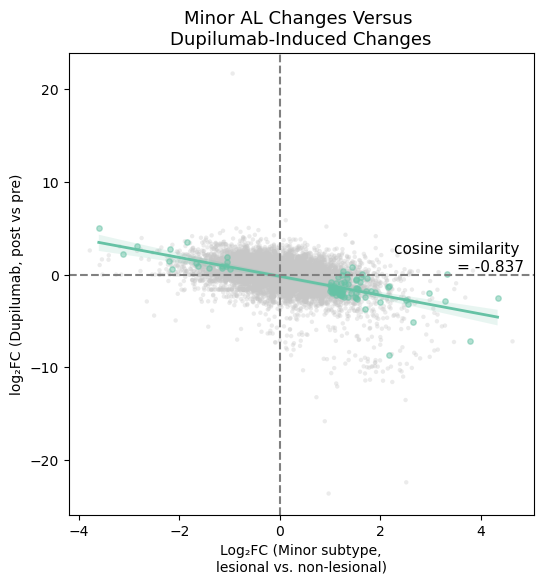

In [ ]:
deg_color = '#66c2a5'
bg_color = '#c7c7c7'   

plt.figure(figsize=(6,6))

plt.scatter(
    minor[~minor.index.isin(minor_deg.index)]['log2FoldChange'], drug_deseq[~drug_deseq.index.isin(drug_deseq_deg.index)]['log2FoldChange'],
    s=10, alpha=0.35, color=bg_color, edgecolors='none'
)

# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=minor_deg['log2FoldChange'], y=drug_deseq_deg['log2FoldChange'],  color=deg_color, scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': deg_color, 'lw': 2},)
plt.xlabel("Log₂FC (Minor subtype,\nlesional vs. non-lesional)")
plt.ylabel("log₂FC (Dupilumab, post vs pre)")
plt.title("Minor AL Changes Versus \nDupilumab-Induced Changes", fontsize=13)

plt.text(
    0.98, 0.52,
    f"cosine similarity \n= {cosine_sim:.3f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    ha='right', va='bottom'
)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

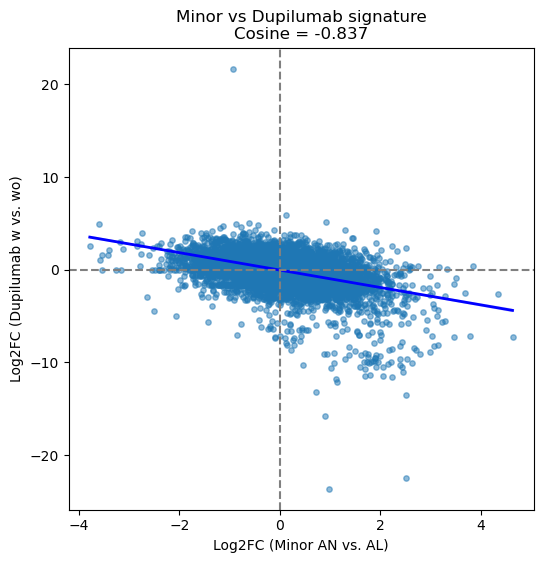

In [143]:
plt.figure(figsize=(6,6))
# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=minor['log2FoldChange'], y=drug_deseq['log2FoldChange'],  scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': 'blue', 'lw': 2},)
plt.xlabel("Log2FC (Minor AN vs. AL)")
plt.ylabel("Log2FC (Dupilumab w vs. wo)")
plt.title(f"Minor vs Dupilumab signature\nCosine = {cosine_sim:.3f}")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

* __[Fig. 11] Inverse Relationship Between Minor Subtype Differential Expression and Dupilumab Response__

### 6.2.4. Comparison of Cyclosporine-Induced Expression Changes and AN vs. AL Expression Patterns in the Minor Subtype

In [144]:
treatment_sample_list = meta[(meta['class']==3) & (meta['drug']=='cyclosporine') & (meta.pathology=='AL')].index.to_list()
notreatment_sample_list = [x.replace("_m3","_m0") for x in treatment_sample_list]

In [145]:
drug_count = symbol_count_df.copy()
drug_count = drug_count.loc[:,drug_count.columns.isin(treatment_sample_list+notreatment_sample_list)]
drug_count.to_csv(f'{project_path}/01_data/05_deseq/minor_cyclosporine_count.tsv', sep="\t", index=True)

In [146]:
drug_cls = pd.DataFrame({'sample_id':drug_count.columns.to_list()})
drug_cls['drug'] = drug_cls['sample_id'].apply(lambda x: x.split("_")[-1])
drug_cls.to_csv(f'{project_path}/01_data/05_deseq/minor_cyclosporine.cls', sep="\t", index=False)

In [147]:
drug_deseq = pd.read_csv(f'{project_path}/01_data/05_deseq/minor_cyclosporine.tsv', sep="\t", index_col=0)
drug_deseq = drug_deseq[drug_deseq.index.isin(minor.index)]
drug_deseq = drug_deseq.loc[minor.index].fillna(0)
drug_deseq_deg = drug_deseq[drug_deseq.index.isin(minor_deg.index)]
drug_deseq_deg = drug_deseq_deg.loc[minor_deg.index]

### 6.2.5. Summary of Drug Responsiveness Differences Between Major and Minor AL Subtypes   

In [148]:
v1 = minor_deg['log2FoldChange'].values
v2 = drug_deseq_deg['log2FoldChange'].values

cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))
print("Cosine similarity:", cosine_sim)

Cosine similarity: -0.28721227174078023


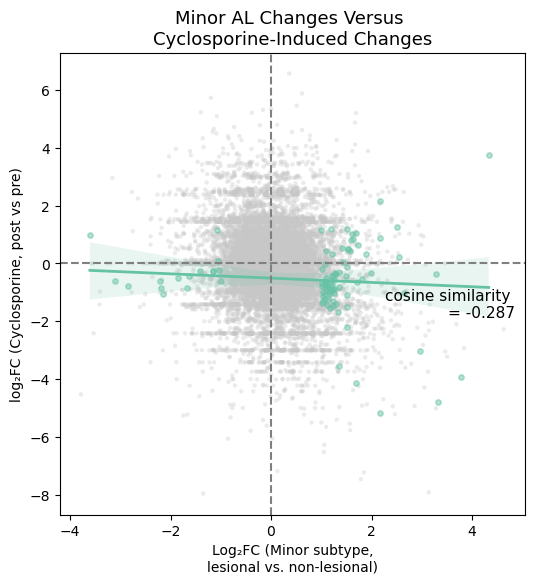

In [ ]:
deg_color = '#66c2a5'
bg_color = '#c7c7c7'  

plt.figure(figsize=(6,6))

plt.scatter(
    minor[~minor.index.isin(minor_deg.index)]['log2FoldChange'], drug_deseq[~drug_deseq.index.isin(drug_deseq_deg.index)]['log2FoldChange'],
    s=10, alpha=0.35, color=bg_color, edgecolors='none'
)

# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=minor_deg['log2FoldChange'], y=drug_deseq_deg['log2FoldChange'],  color=deg_color, scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': deg_color, 'lw': 2},)
plt.xlabel("Log₂FC (Minor subtype,\nlesional vs. non-lesional)")
plt.ylabel("log₂FC (Cyclosporine, post vs pre)")
plt.title("Minor AL Changes Versus \nCyclosporine-Induced Changes", fontsize=13)

plt.text(
    0.98, 0.42,
    f"cosine similarity \n= {cosine_sim:.3f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    ha='right', va='bottom'
)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

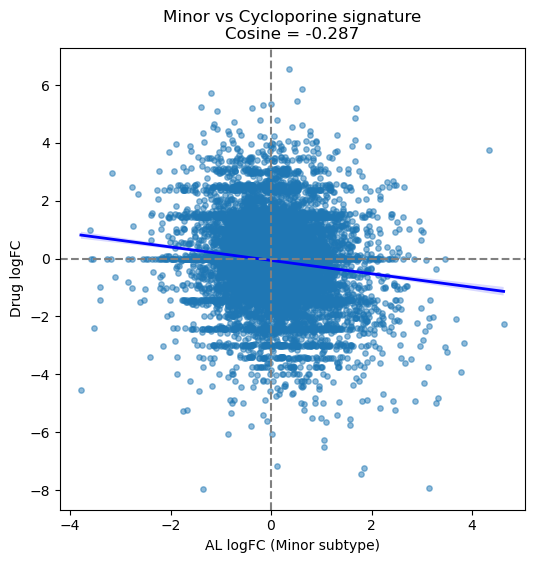

In [150]:
plt.figure(figsize=(6,6))
# plt.scatter(major['log2FoldChange'], drug_deseq['log2FoldChange'], s=5, cmap='Set3')
sns.regplot(x=minor['log2FoldChange'], y=drug_deseq['log2FoldChange'],  scatter_kws={'s': 15, 'alpha': 0.5}, line_kws={'color': 'blue', 'lw': 2},)
plt.xlabel("AL logFC (Minor subtype)")
plt.ylabel("Drug logFC")
plt.title(f"Minor vs Cycloporine signature\nCosine = {cosine_sim:.3f}")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

* __[Fig. 12] Weak Inverse Relationship Between Minor Subtype Differential Expression and Cyclosporine Response__

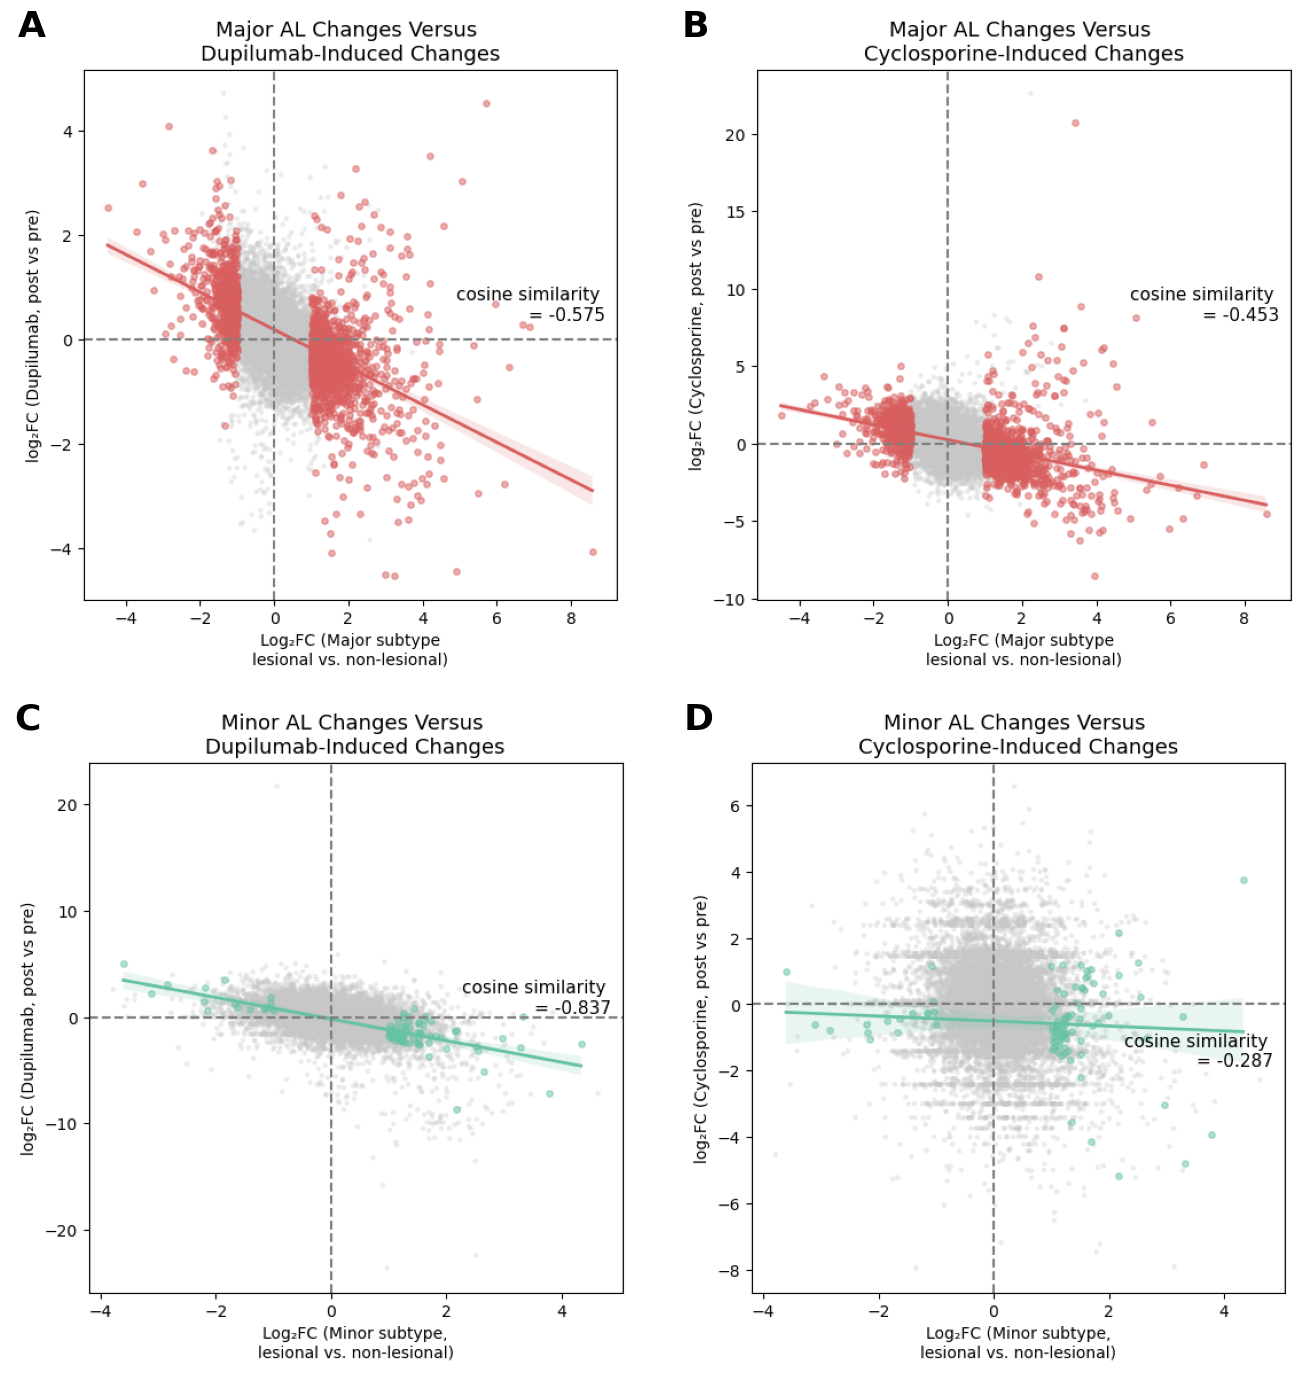

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# file path setting
figA_path = f"{project_path}/03_figures/Figure5A.png"
figB_path = f"{project_path}/03_figures/Figure5B.png"
figC_path = f"{project_path}/03_figures/Figure5C.png"
figD_path = f"{project_path}/03_figures/Figure5D.png"

# load images
imgA = mpimg.imread(figA_path)
imgB = mpimg.imread(figB_path)
imgC = mpimg.imread(figC_path)
imgD = mpimg.imread(figD_path)

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
plt.subplots_adjust(wspace=0.05, hspace=0.10)

# Panel mapping
images = [(imgA, "A"), (imgB, "B"), (imgC, "C"), (imgD, "D")]

for ax, (img, label) in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis("off")
    
    # add panel label
    ax.text(
        0.05, 0.95, label,
        transform=ax.transAxes,
        fontsize=26, fontweight='bold',
        va='bottom', ha='right'
    )

plt.tight_layout()
plt.savefig(f"{project_path}/03_figures/Figure5.png", dpi=300, bbox_inches='tight')
plt.show()


> Collectively, comparative analyses of dupilumab- and cyclosporine-induced transcriptional changes reveal subtype-specific differences in drug responsiveness.   
> While both subtypes show inverse concordance with dupilumab-associated expression changes, the minor subtype displays markedly attenuated responsiveness to cyclosporine.   
> These findings support the existence of biologically distinct lesional states in atopic dermatitis that differentially interact with systemic immunomodulatory therapies.   

### 6.2.6. Analysis of Minor Subtype Responsiveness to Other Drugs in the DrugSeq Dataset

In [152]:
minor = pd.read_csv(f'{project_path}/01_data/05_deseq/minorAL_deseq.tsv', sep="\t", index_col=0)
minor = minor[(minor['padj']<0.05) & (minor['log2FoldChange'].apply(abs)>=1)]
minor

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCG4      35.314434        1.531324  0.353110  4.336675  1.446543e-05   
AKR1B10   581.789757        1.987174  0.389164  5.106268  3.285836e-07   
AURKB     153.917766        1.177560  0.287311  4.098559  4.157301e-05   
BCAR3     382.262958       -1.043649  0.211723 -4.929304  8.252299e-07   
BIRC5     316.040321        1.207273  0.307319  3.928404  8.551132e-05   
...              ...             ...       ...       ...           ...   
TYMP     1167.159882        1.300785  0.368467  3.530260  4.151512e-04   
UBE2C     223.687546        1.031453  0.280331  3.679415  2.337693e-04   
UGT3A2    151.960327       -3.114146  0.456244 -6.825610  8.755245e-12   
VNN3P      11.355051        2.647710  0.721855  3.667927  2.445252e-04   
VWA3A      31.762828        1.694909  0.377007  4.495701  6.934101e-06   

                 padj  
ABCG4    7.553432e-03  
AKR1B10  6.672438e-04  
AURKB    1.230936e-02  
BCAR3    1.371082e-03  
BIRC5    1.953506e-02  
...               ...  
TYMP     4.937718e-02  
UBE2C    3.683076e-02  
UGT3A2   1.600109e-07  
VNN3P    3.724119e-02  
VWA3A    5.069105e-03  

[93 rows x 6 columns]

In [153]:
drugseq = pd.read_csv('/home/data1/public_db/01_public_data/DrugSeq/gene_attribute_matrix_standardized.txt', sep="\t", index_col=0, low_memory=False)
drugseq

AA-01-JO26_0.01uM  AA-01-JO26_0.1uM  AA-01-JO26_10uM  AA-01-JO26_1uM  \
Gene                                                                           
A1BG            -0.002749          0.032244         0.002259        0.101277   
A2M             -0.008237         -0.006582        -0.008913       -0.000269   
A4GALT          -0.003568         -0.002679        -0.011184       -0.002373   
AAAS             0.008115          0.006323         0.002524       -0.006528   
AACS             0.024804         -0.005548        -0.003881        0.005946   
...                   ...               ...              ...             ...   
ZXDB            -0.000282          0.000906        -0.000903       -0.006853   
ZXDC             0.000000         -0.005601        -0.001972       -0.001295   
ZYG11B          -0.037036          0.000000         0.000000        0.009598   
ZYX              0.016490          0.015439         0.005784        0.027089   
ZZEF1            0.000000          0.003928         0.000000       -0.005357   

        AA-01-PS31_0.01uM  AA-01-PS31_0.1uM  AA-01-PS31_10uM  AA-01-PS31_1uM  \
Gene                                                                           
A1BG             0.000000               0.0              0.0       -0.004304   
A2M              0.000000               0.0              0.0        0.000000   
A4GALT           0.000000               0.0              0.0        0.000000   
AAAS             0.000000               0.0              0.0        0.000000   
AACS             0.000000               0.0              0.0       -0.000030   
...                   ...               ...              ...             ...   
ZXDB             0.001012               0.0              0.0        0.000000   
ZXDC             0.000000               0.0              0.0       -0.003915   
ZYG11B           0.000000               0.0              0.0        0.000748   
ZYX              0.000000               0.0              0.0       -0.017703   
ZZEF1            0.001902               0.0              0.0        0.000000   

        AA-01-XV28_0.01uM  AA-01-XV28_0.1uM  ...  ZE-79-HJ46_10uM  \
Gene                                         ...                    
A1BG             0.012086         -0.040993  ...         0.000000   
A2M              0.052372         -0.002086  ...         0.000000   
A4GALT          -0.002459          0.004178  ...         0.000000   
AAAS             0.016793          0.005962  ...         0.000000   
AACS             0.013481          0.011564  ...        -0.010504   
...                   ...               ...  ...              ...   
ZXDB            -0.040828         -0.011742  ...         0.000000   
ZXDC            -0.036232         -0.010434  ...         0.000000   
ZYG11B          -0.001908          0.005755  ...         0.000000   
ZYX             -0.010629          0.030526  ...         0.000000   
ZZEF1            0.002802          0.000000  ...         0.000000   

        ZE-79-HJ46_1uM  ZF-00-MX33_0.01uM  ZF-00-MX33_0.1uM  ZF-00-MX33_10uM  \
Gene                                                                           
A1BG               0.0           0.000329          0.000000         0.000550   
A2M                0.0          -0.000790         -0.001021        -0.018178   
A4GALT             0.0          -0.014331          0.000000         0.000834   
AAAS               0.0          -0.012012          0.000000        -0.010042   
AACS               0.0          -0.005744          0.000000        -0.015438   
...                ...                ...               ...              ...   
ZXDB               0.0           0.000000          0.000000         0.007342   
ZXDC               0.0          -0.006018          0.000213         0.004150   
ZYG11B             0.0           0.000816          0.000225        -0.001211   
ZYX                0.0           0.009177         -0.000734        -0.035809   
ZZEF1              0.0           0.000000          0.001021        -

In [154]:
common = drugseq[drugseq.index.isin(minor.index)].index.to_list()
minor = minor.loc[common]
minor_drug = drugseq.loc[common]

In [155]:
drug_list = list()
for drug, profile in minor_drug.T.iterrows():
    r = stats.spearmanr(minor['log2FoldChange'], profile)
    corr = stats.pearsonr(minor['log2FoldChange'], profile)
    drug_list.append([drug, r.statistic, r.pvalue, corr.statistic])
drug_df = pd.DataFrame(drug_list)
drug_df.columns = ['drug','statistic', 'pvalue', 'cor']
drug_df['pvalue'] = drug_df['pvalue'].fillna(1)
drug_df['fdr'] = multipletests(drug_df['pvalue'], method='fdr_bh')[1]

/tmp/ipykernel_122386/2298797755.py:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.spearmanr(minor['log2FoldChange'], profile)
/tmp/ipykernel_122386/2298797755.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = stats.pearsonr(minor['log2FoldChange'], profile)


In [156]:
drug_df[(drug_df.statistic < 0) & (drug_df.fdr < 0.1)].sort_values(by='fdr')

Empty DataFrame
Columns: [drug, statistic, pvalue, cor, fdr]
Index: []

> No drugs superior to dupilumab and cyclosporine in DrugSeq data 

---

# ★ 7. Validation of Subtype-Specific Drug Responsiveness Using an Independent Cyclosporine-Treated Cohort

> Objective   

The objective of this analysis is to investigate cyclosporine responsiveness by integrating and jointly clustering the cyclosporine-treated patient dataset (GSE58558)    
with previously defined atopic dermatitis (AD) molecular subtypes.

* Major and minor AD subtypes were previously identified using the GSE157194 dataset.   
* Based on these results, the minor subtype was hypothesized to exhibit relatively reduced responsiveness to cyclosporine.   
* The GSE58558 dataset consists of AD patients treated with cyclosporine and includes clinical annotations distinguishing responders and non-responders.   
* By jointly clustering these two datasets, we aimed to determine whether:   
* the major subtype derived from GSE157194 clusters closer to cyclosporine responders in GSE58558, and   
* the minor subtype clusters closer to non-responders or forms a distinct transcriptional group.   

|Category|Description|
|-|-|
|Title|Cyclosporine treatment effects on atopic dermatitis lesional and non-lesional skin|
|Objective|To characterize molecular features associated with treatment response (responder vs. non-responder) by analyzing gene expression changes in lesional (AL) and non-lesional (AN) skin before and after cyclosporine (CsA) treatment in patients with atopic dermatitis|
|Study design|- Skin biopsies were collected from patients treated with cyclosporine at multiple time points: Day 1 (baseline), Week 2, and Week 12   |
|Study design|- Both lesional (AL) and non-lesional (AN) skin samples were obtained at each time point   |
|Study design|- Patients were stratified into responder (R) and non-responder (NR) groups for comparative analysis   |
|sample size|A total of 134 microarray samples|

## 7.1. Removal of Batch effect

### 7.1.1. Assessment of Batch effect 

In [202]:
cohort1 = pd.read_csv(f'{project_path}/01_data/05_deseq/vst.tsv', sep="\t", index_col=0)
cohort1 = cohort1[(cohort1.sum(axis=1)>0) & (cohort1.var(axis=1)>0)]
cohort1.head()

Patient_10_AN_m0  Patient_11_AN_m0  Patient_12_AN_m0  \
5S_rRNA           4.222819          4.222819          4.222819   
7SK               4.222819          4.558036          4.222819   
A1BG              4.222819          4.888832          4.222819   
A1BG-AS1          5.978035          5.876542          6.297286   
A2M              12.813842         12.550664         11.910051   

          Patient_13_AN_m0  Patient_14_AN_m0  Patient_15_AN_m0  \
5S_rRNA           4.562310          4.222819          4.222819   
7SK               4.222819          4.222819          4.222819   
A1BG              4.222819          4.222819          4.222819   
A1BG-AS1          6.146844          6.447132          6.217639   
A2M              11.460419         12.527649         12.538590   

          Patient_16_AN_m0  Patient_17_AN_m0  Patient_18_AN_m0  \
5S_rRNA           4.222819          4.222819          4.222819   
7SK               4.222819          4.222819          4.222819   
A1BG              4.633302          4.222819          4.222819   
A1BG-AS1          5.996423          6.206215          6.084034   
A2M              11.924334         11.618802         12.000617   

          Patient_19_AN_m0  ...  Patient_53_AL_m0  Patient_54_AL_m0  \
5S_rRNA           4.222819  ...          4.222819          4.222819   
7SK               4.222819  ...          4.498596          4.222819   
A1BG              4.561882  ...          4.222819          4.520687   
A1BG-AS1          6.372788  ...          6.217316          6.229473   
A2M              11.929214  ...         11.148203         12.495017   

          Patient_55_AL_m0  Patient_56_AL_m0  Patient_57_AL_m0  \
5S_rRNA           4.222819          4.543673          4.562300   
7SK               4.222819          4.222819          4.222819   
A1BG              4.576469          4.543673          4.701822   
A1BG-AS1          6.411417          6.639377          6.355886   
A2M              11.543447         12.592562         11.862447   

          Patient_5_AL_m0  Patient_6_AL_m0  Patient_7_AL_m0  Patient_8_AL_m0  \
5S_rRNA          4.527002         4.762581         4.528457         4.537597   
7SK              4.222819         4.222819         4.222819         4.222819   
A1BG             4.222819         4.844894         4.830731         4.537597   
A1BG-AS1         5.810630         6.115539         6.323680         6.344203   
A2M             12.617345        11.856250        11.945320        12.596501   

          Patient_9_AL_m0  
5S_rRNA          4.222819  
7SK              4.222819  
A1BG             4.729283  
A1BG-AS1         6.066408  
A2M             11.592929  

[5 rows x 111 columns]

In [203]:
cohort2 = pd.read_csv('~/10_project/GSE58558/01_data/01_expr/GSE58558_expr_with_meta.tsv', sep="\t", index_col=0)
cohort2 = cohort2[(cohort2.sum(axis=1)>0) & (cohort2.var(axis=1)>0)]
cohort2

PI-1 1_AN_R  PI-1 2_AL_R  PI-1 3_AN_R  PI-1 4_AL_R  PI-1 5_AN_R  \
A1BG         2.177931     2.169565     2.177931     2.178927     2.177931   
A1BG-AS1     6.311487     6.097246     6.454434     6.991772     6.951919   
A1CF         4.339129     4.339129     4.339129     4.339129     4.339129   
A2M         15.160809    14.066851    14.765253    15.011341    15.544302   
A2M-AS1      6.303190     5.319929     6.289151     6.327792     6.755798   
...               ...          ...          ...          ...          ...   
ZYG11A       2.818281     2.639569     4.617216     2.563425     2.169565   
ZYG11B      23.150285    22.992620    23.609329    22.829013    23.264634   
ZYX         20.002853    20.180522    19.539089    20.121859    19.868002   
ZZEF1       17.499591    17.879411    17.263776    19.416866    16.370541   
ZZZ3        16.616609    16.618703    15.297802    14.144439    15.869323   

          PI-1 6_AL_R  PI-3 1_AN_R  PI-3 2_AL_R  PI-3 3_AN_R  PI-3 4_AL_R  \
A1BG         2.177931     2.177931     2.177931     2.177931     2.177931   
A1BG-AS1     6.458516     6.359602     6.703057     6.774725     6.401864   
A1CF         4.339129     4.339129     4.339129     4.339129     4.339129   
A2M         14.724042    15.218917    15.072808    15.270298    15.210457   
A2M-AS1      6.032908     6.467223     6.486996     6.687196     7.609956   
...               ...          ...          ...          ...          ...   
ZYG11A       2.563425     5.624060     2.636857     2.463548     2.297585   
ZYG11B      23.043698    23.037646    22.607315    25.123744    23.002167   
ZYX         19.895848    20.534492    22.299488    21.716666    20.059435   
ZZEF1       17.088940    17.216484    17.269377    16.331759    17.495250   
ZZZ3        16.416992    16.011978    16.099721    14.848121    14.220395   

          ...  PRU-6 5_AN_R  PRU-6 6_AL_R  PRU-7 1_AL_R  PRU-7 2_AL_R  \
A1BG      ...      2.177931      2.177931      2.177931      2.177931   
A1BG-AS1  ...      5.282696      6.338728      6.097246      6.202273   
A1CF      ...      4.339129      4.339129      4.339129      4.339981   
A2M       ...     14.353204     15.005913     14.512730     15.343066   
A2M-AS1   ...      5.584278      6.426755      5.743549      6.596505   
...       ...           ...           ...           ...           ...   
ZYG11A    ...      2.435001      2.169565      3.859276      2.563425   
ZYG11B    ...     24.135545     23.421111     23.125446     21.744700   
ZYX       ...     22.239935     21.947549     20.659934     22.776521   
ZZEF1     ...     19.307864     17.567670     18.115395     18.036641   
ZZZ3      ...     16.870722     16.630401     16.447481     15.799390   

          PRU-7 3_AL_R  PRU-8 1_AL_NR  PRU-8 2_AN_NR  PRU-8 3_AL_NR  \
A1BG          2.177931       2.177931       2.177931       2.177933   
A1BG-AS1      6.249963       6.401864       6.298605       6.408253   
A1CF          4.339129       4.339129       4.339139       4.339129   
A2M          15.544727      13.866536      15.007516      14.927111   
A2M-AS1       7.223436       4.994456       7.182667       6.546365   
...                ...            ...            ...            ...   
ZYG11A        2.463548       2.226944       3.086976       3.740404   
ZYG11B       24.482596      23.121032      23.252005      23.085244   
ZYX          20.444258      22.638720      21.569194      22.155295   
ZZEF1        15.514508      17.206153      16.788391      17.554566   
ZZZ3         14.716129      16.072858      16.408259      16.168282   

          PRU-8 4_AN_NR  PRU-8 5_AL_NR  
A1BG           2.240449       2.177931  
A1BG-AS1       6.915840       6.230145  
A1CF           4.339578       4.339129  
A2M           15.242027      15.080509  
A2M-AS1        6.703525       6.540483  
...                 ...            ...  
ZYG11A         4.174140       2.496838  
ZYG11B        21.855550      22.287934  
ZYX           22.522371      22.393776  
ZZEF1         17.298

In [204]:
common_genes = cohort1[cohort1.index.isin(cohort2.index)].index.to_list()
cohort1 = cohort1.loc[common_genes]
cohort2 = cohort2.loc[common_genes]
merged_cohort = pd.concat([cohort1, cohort2], axis=1)
batch = ([0] * cohort1.shape[1]) + ([1] * cohort2.shape[1])

In [ ]:
def assign_cohort(sample):
    if sample.startswith("Patient"):
        return "GSE157194"
    else:
        return "GSE58558"

sample_cohort = pd.Series(
    {col: assign_cohort(col) for col in merged_cohort.columns}
)

In [218]:
cohort_palette = {
    "GSE157194": "#d95f5f",
    "GSE58558": "#66c2a5"
}

In [216]:
df_long = (
    merged_cohort
    .T                      # sample × gene
    .reset_index()
    .rename(columns={"index": "sample"})
    .melt(
        id_vars="sample",
        var_name="gene",
        value_name="expression"
    )
)

df_long["cohort"] = df_long["sample"].map(sample_cohort)

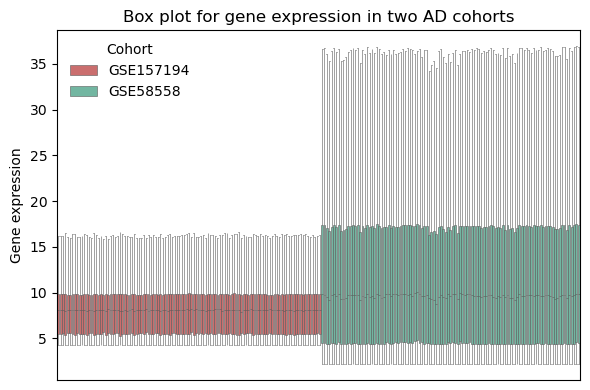

In [221]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df_long,
    x="sample",
    y="expression",
    hue="cohort",
    palette=cohort_palette,
    showfliers=False,
    linewidth=0.4
)

plt.xticks([], [])
plt.xlabel("")
plt.ylabel("Gene expression")
plt.title("Box plot for gene expression in two AD cohorts")
plt.legend(title="Cohort", frameon=False)
plt.tight_layout()
plt.show()


* __[Fig.13] Boxplot for GSE157194 and GSE58558 samples__   
Huge batch effect was observed between two cohort   

In [223]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pcs = pca.fit_transform(merged_cohort.T)

pc_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "batch": batch
})


In [ ]:
pc_df["cohort"] = pc_df["batch"].map({
    0: "GSE157194",
    1: "GSE58558"
})


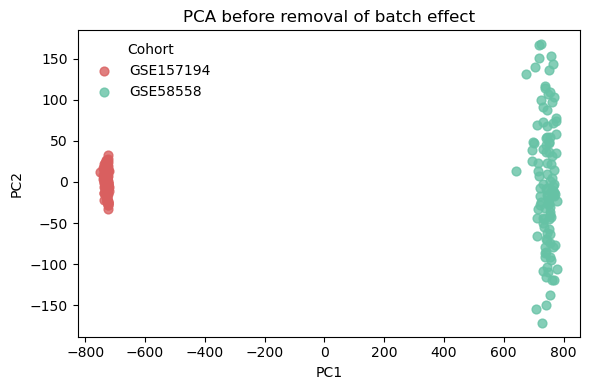

In [225]:
plt.figure(figsize=(6, 4))

for cohort, color in cohort_colors.items():
    subset = pc_df[pc_df["cohort"] == cohort]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        s=40,
        alpha=0.8,
        color=color,
        label=cohort
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA before removal of batch effect")
plt.legend(title="Cohort", frameon=False)

plt.tight_layout()
plt.show()


* __[Fig.14] PCA for GSE157194, GSE58558 samples__   
Clear batch effect was observed

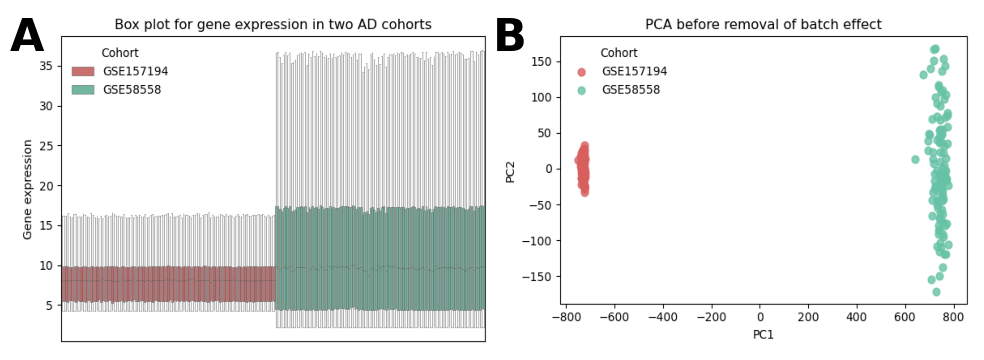

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec


# file path setting
figA_path = f"{project_path}/03_figures/SupplementaryFigure1A.png"
figB_path = f"{project_path}/03_figures/SupplementaryFigure1B.png"

# load images
imgA = mpimg.imread(figA_path)
imgB = mpimg.imread(figB_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

gs = GridSpec(
    1, 2,
    width_ratios=[1.0, 1.0],
    wspace=0.01,
    left=0.02, right=0.98, top=0.90, bottom=0.05
)

# Create axes
axA = fig.add_subplot(gs[0, 0])
axB = fig.add_subplot(gs[0, 1])

# Pack into iterable
axes = [axA, axB]
imgs = [imgA, imgB]
labels = ["A", "B"]

# Draw images
for ax, img, label in zip(axes, imgs, labels):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for spine in ax.spines.values():
        spine.set_visible(False)    
        
    ax.imshow(img, extent=[0,1,0,1], aspect='auto')
    ax.axis("off")

    # Panel label
    ax.text(
        -0.01, 0.98, label,
        transform=ax.transAxes,
        fontsize=32,
        fontweight="bold",
        va="top"
    )


plt.savefig(f"{project_path}/03_figures/SupplementaryFigureS1.png", dpi=300, bbox_inches='tight')
plt.show()

### 7.1.2. Removal of Batch effect based on Combat

In [163]:
def zscore_matrix(df):
    return df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)

In [164]:
cohort1_z = zscore_matrix(cohort1)
cohort2_z = zscore_matrix(cohort2)

merged_cohort = pd.concat([cohort1_z, cohort2_z], axis=1)

In [165]:
from pycombat import Combat

combat = Combat()

In [166]:
expr_corrected = combat.fit_transform(merged_cohort.T.values, list(batch))
expr_corrected = pd.DataFrame(expr_corrected.T, index=merged_cohort.index, columns=merged_cohort.columns)

/home/sehong/miniconda3/envs/gtex-shap/lib/python3.10/site-packages/pycombat/pycombat.py:78: RuntimeWarning: divide by zero encountered in divide
  change = max((abs(gam_post - gam_prior) / gam_prior).max(),


In [167]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(expr_corrected.T)

pc_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "batch": batch
})

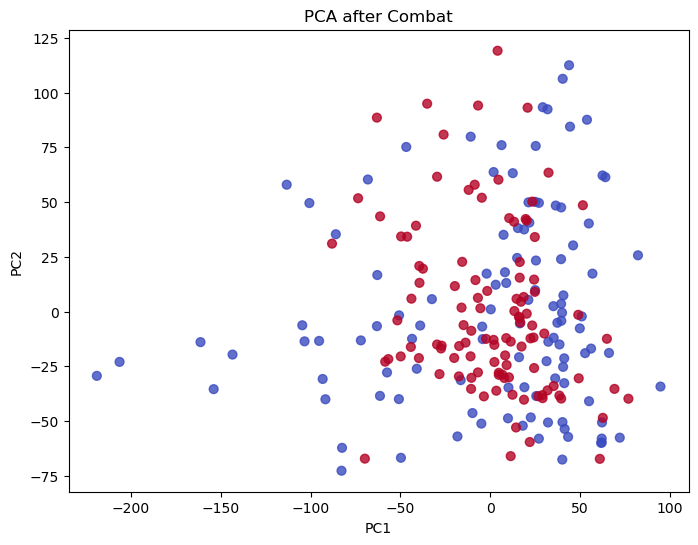

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(
    pc_df["PC1"],
    pc_df["PC2"],
    c=pc_df["batch"],
    cmap="coolwarm",
    s=40,
    alpha=0.8
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA after Combat")
# plt.colorbar(label="Batch")
plt.show()

* __[Fig.15] PCA after removal of batch effect based on Combat__    
The subtle batch effect between GSE157194 and GSE58558 was effectively removed   

<Axes: >

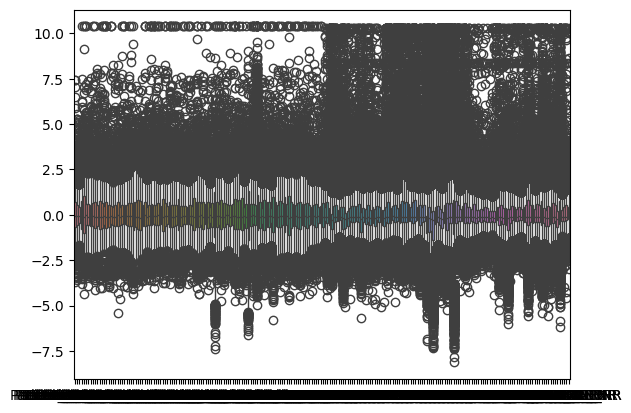

In [169]:
sns.boxplot(expr_corrected)

* __[Fig. 16] Boxplots of GSE157194 and GSE58558 samples after ComBat correction.__   
Although batch effects appear to be substantially mitigated in the PCA space,    
residual differences in expression quantiles between the two datasets remain observable in the boxplot.

### 7.1.3. Rank-based Batch effect removal

In [170]:
from scipy.stats import rankdata, norm

In [171]:
def rank_INT(df):
    """
    df: gene × sample matrix
    returns: rank-based inverse normal transformed matrix
    """
    int_df = df.copy()
    
    for gene in df.index:
        x = df.loc[gene, :].values
        r = rankdata(x)  # 1 ~ N
        # INT transform: (rank - 0.5) / N → Φ^-1()
        int_values = norm.ppf((r - 0.5) / len(x))
        int_df.loc[gene, :] = int_values
    
    return int_df

In [172]:
cohort1_int = rank_INT(cohort1)   # RNA-seq
cohort2_int = rank_INT(cohort2)   # microarray

In [173]:
merged_rank = pd.concat([cohort1_int, cohort2_int], axis=1)

In [174]:
import numpy as np
import random

seed = 354

np.random.seed(seed)
random.seed(seed)

In [175]:
class_palette = {
    'Non-lesional': "#8da0cb",   # blue
    'Major subtype': "#d95f5f",   # red
    'Minor subtype': "#66c2a5"    # green
}

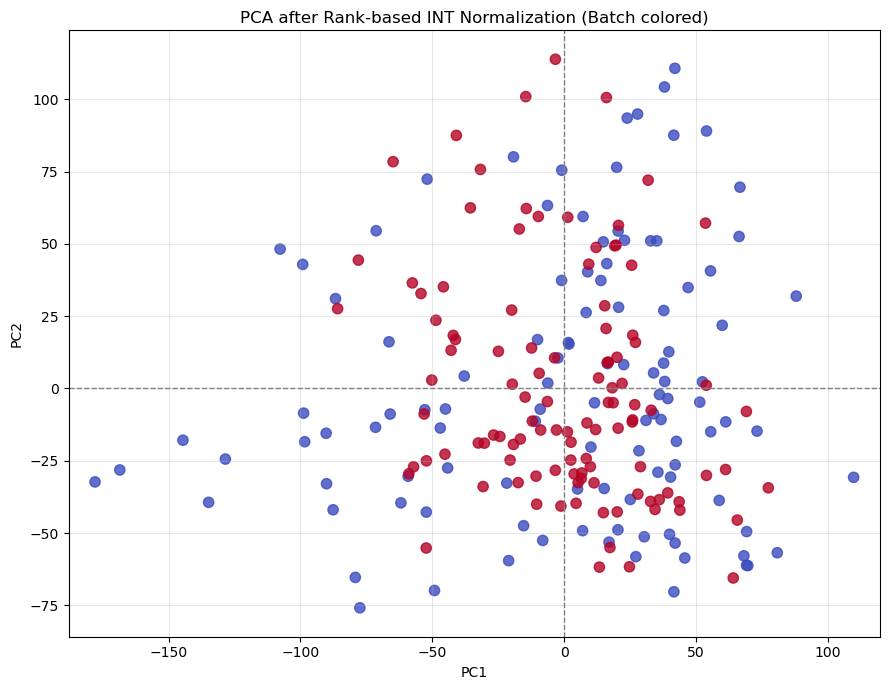

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

batch_labels = ["GSE157194"] * cohort1_int.shape[1] + ["GSE58558"] * cohort2_int.shape[1]
batch_numeric = [0]*cohort1_int.shape[1] + [1]*cohort2_int.shape[1]

pca = PCA(n_components=2, random_state=354)
pcs = pca.fit_transform(merged_rank.T)

pc_df = pd.DataFrame({
    "PC1": pcs[:,0],
    "PC2": pcs[:,1],
    "batch": batch
})



point_size = 55
point_alpha = 0.8

x_min, x_max = pc_df["PC1"].min() - 10, pc_df["PC1"].max() + 10
y_min, y_max = pc_df["PC2"].min() - 10, pc_df["PC2"].max() + 10

# -----------------------------
# 3. PCA — Batch coloring
# -----------------------------
plt.figure(figsize=(9,7))

plt.scatter(
    pc_df["PC1"], pc_df["PC2"],
    c=pc_df["batch"],
    cmap="coolwarm",
    s=point_size,
    alpha=point_alpha
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA after Rank-based INT Normalization (Batch colored)")
# plt.colorbar(label="Batch")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


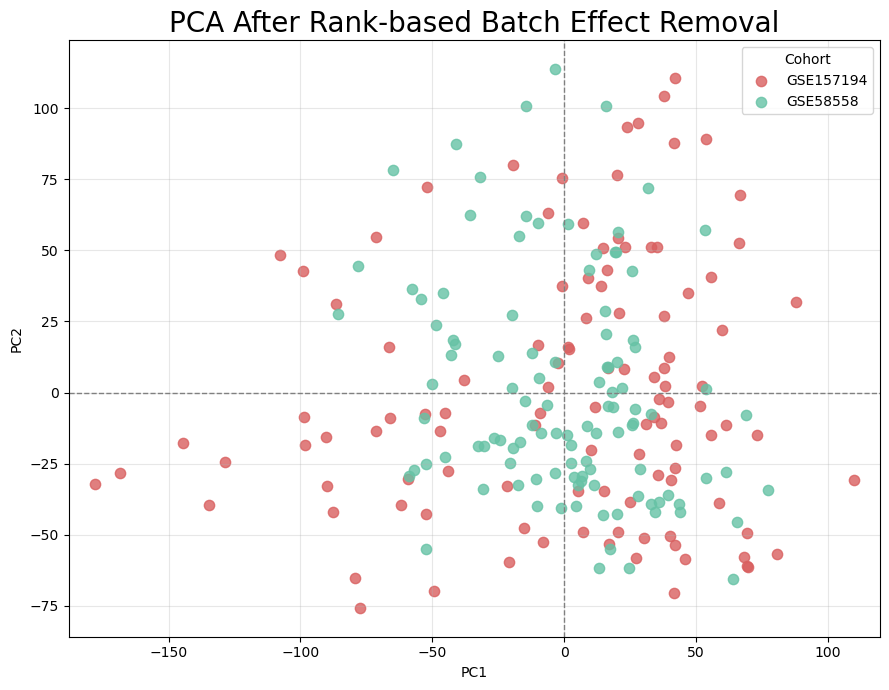

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cohort labels
cohort_labels = ["GSE157194"] * cohort1_int.shape[1] + ["GSE58558"] * cohort2_int.shape[1]

pc_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "cohort": cohort_labels
})

# -----------------------------
# Colors
# -----------------------------
cohort_colors = {
    "GSE157194": "#d95f5f",   # red tone
    "GSE58558": "#66c2a5"     # green tone
}

point_size = 55
point_alpha = 0.8

x_min, x_max = pc_df["PC1"].min() - 10, pc_df["PC1"].max() + 10
y_min, y_max = pc_df["PC2"].min() - 10, pc_df["PC2"].max() + 10

# -----------------------------
# PCA — Cohort coloring
# -----------------------------
plt.figure(figsize=(9,7))

for cohort_name in cohort_colors.keys():
    subset = pc_df[pc_df["cohort"] == cohort_name]
    plt.scatter(
        subset["PC1"], subset["PC2"],
        c=cohort_colors[cohort_name],
        label=cohort_name,
        s=point_size,
        alpha=point_alpha
    )

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("PCA After Rank-based Batch Effect Removal", fontsize=20)

plt.legend(title="Cohort")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* __[Fig. 17] PCA clustering after batch effect removal using inverse normal transformation (INT).__   
Following batch correction, samples from the two datasets show well-mixed clustering patterns, indicating effective mitigation of batch effects.

<Axes: >

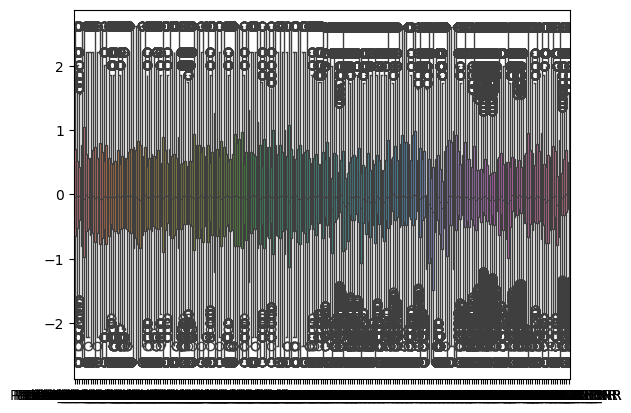

In [178]:
sns.boxplot(merged_rank)

* __[Fig. 18] Boxplot of gene expression distributions in samples from GSE157194 and GSE58558.__   
The gene expression quantiles across the two datasets appear highly comparable,    
indicating improved alignment of expression distributions after batch correction.

## ★ 7.2. Projection of Cyclosporine Treatment Trajectories Onto AL Subtype Space

In [179]:
from matplotlib.lines import Line2D

In [180]:
gse_path = '/home/sehong/10_project/GSE58558/'

In [181]:
meta = pd.read_csv(f'{gse_path}/01_data/00_rawdata/GSE58558_meta.tsv', sep="\t", index_col=0)[['time:ch1', 'GSM', 'patient_id', 'lesion_short', 'resp_short','new_id']].set_index('new_id')
meta.head()

time:ch1         GSM patient_id lesion_short resp_short
new_id                                                             
PI-1 1_AN_R    day 1  GSM1413895      I-1 1           AN          R
PI-1 2_AL_R    day 1  GSM1413896      I-1 2           AL          R
PI-1 3_AN_R   week 2  GSM1413897      I-1 3           AN          R
PI-1 4_AL_R   week 2  GSM1413898      I-1 4           AL          R
PI-1 5_AN_R  week 12  GSM1413899      I-1 5           AN          R

In [182]:
meta[['lesion_short','resp_short']].value_counts()

lesion_short  resp_short
AL            R             50
AN            R             48
AL            NR             6
AN            NR             5
Name: count, dtype: int64

In [183]:
grp_df = pd.read_csv(f'{project_path}/01_data/06_k/meta_cola.tsv', sep="\t", index_col=0)[['pathology','class']]
grp_df.head()

pathology  class
Patient_10_AN_m0        AN      1
Patient_11_AN_m0        AN      2
Patient_12_AN_m0        AN      1
Patient_13_AN_m0        AN      1
Patient_14_AN_m0        AN      3

In [184]:
merged_rank = pd.concat([cohort1_int, cohort2_int], axis=1)
pc_df.index = merged_rank.columns

In [185]:
pc_df2 = pc_df.merge(meta, left_index=True, right_index=True, how='left').merge(grp_df, left_index=True, right_index=True, how='left')
pc_df2['group'] = pc_df2[['class','time:ch1']].apply(lambda x: x[0] if not np.isnan(x[0]) else x[1], axis=1)
pc_df2.head()

/tmp/ipykernel_122386/708077911.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pc_df2['group'] = pc_df2[['class','time:ch1']].apply(lambda x: x[0] if not np.isnan(x[0]) else x[1], axis=1)


PC1        PC2     cohort time:ch1  GSM patient_id  \
Patient_10_AN_m0   69.619556 -61.228477  GSE157194      NaN  NaN        NaN   
Patient_11_AN_m0   33.884023   5.389576  GSE157194      NaN  NaN        NaN   
Patient_12_AN_m0   10.129821 -20.253710  GSE157194      NaN  NaN        NaN   
Patient_13_AN_m0   73.112297 -14.732989  GSE157194      NaN  NaN        NaN   
Patient_14_AN_m0 -134.833473 -39.364926  GSE157194      NaN  NaN        NaN   

                 lesion_short resp_short pathology  class group  
Patient_10_AN_m0          NaN        NaN        AN    1.0   1.0  
Patient_11_AN_m0          NaN        NaN        AN    2.0   2.0  
Patient_12_AN_m0          NaN        NaN        AN    1.0   1.0  
Patient_13_AN_m0          NaN        NaN        AN    1.0   1.0  
Patient_14_AN_m0          NaN        NaN        AN    3.0   3.0

In [186]:
class_palette = {
    'Non-lesional': "#8da0cb",   # blue
    'Major subtype': "#d95f5f",   # red
    'Minor subtype': "#66c2a5"    # green
}

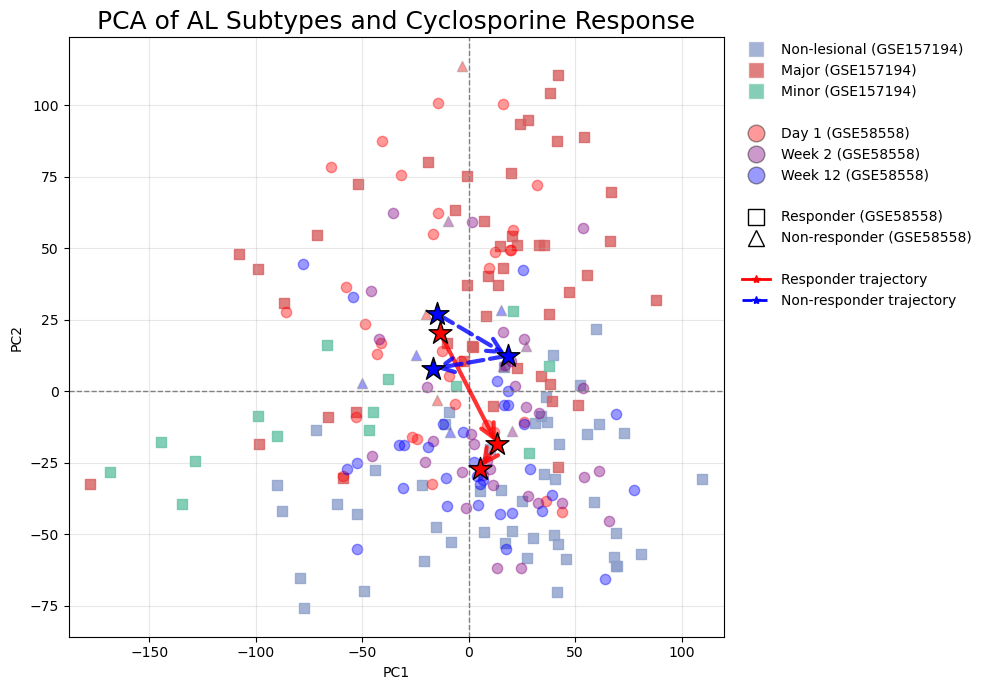

In [ ]:
plt.figure(figsize=(10,7))

colors = {
    "day 1": "red",
    "week 2": "purple",
    "week 12": "blue",
    1.0: '#8da0cb',
    2.0: "#d95f5f",
    3.0: "#66c2a5"
}

cohort_colors = {
    "GSE157194": "#d95f5f",   # red tone
    "GSE58558": "#66c2a5"     # green tone
}

point_size = 55
# point_alpha = 0.8


subtype_mask = pc_df2['class'].isin([1,2,3])
for t_point, color in colors.items():
    mask = subtype_mask & (pc_df2['class']==t_point)
    plt.scatter(
        pc_df2.loc[mask, "PC1"],
        pc_df2.loc[mask, "PC2"],
        s=point_size,
        alpha=0.8,
        color=color,
        label=t_point,
        marker='s'
    )  

resp_mask = pc_df2['resp_short'] == 'R'
for t_point, color in colors.items():
    mask = resp_mask & (pc_df2['time:ch1']==t_point)
    plt.scatter(
        pc_df2.loc[mask, "PC1"],
        pc_df2.loc[mask, "PC2"],
        s=point_size,
        alpha=0.4,
        color=color,
        label=t_point,
        marker='o'
    )    

nresp_mask = pc_df2['resp_short'] == 'NR'
for t_point, color in colors.items():
    mask = nresp_mask & (pc_df2['time:ch1']==t_point)
    plt.scatter(
        pc_df2.loc[mask, "PC1"],
        pc_df2.loc[mask, "PC2"],
        s=point_size,
        alpha=0.4,
        color=color,
        edgecolor='gray',
        linestyle='-',
        label=t_point,
        marker='^'
    )  

import numpy as np


# =======================================================
# 3. Centroid Trajectory
# =======================================================

time_order = ['day 1', 'week 2', 'week 12']

def plot_trajectory(response_type, color, linestyle, label_prefix):
    centroids = []
    
    for t in time_order:
        mask = (pc_df2['resp_short'] == response_type) & \
               (pc_df2['time:ch1'] == t)
        subset = pc_df2[mask]
        
        if not subset.empty:
            median_x = subset['PC1'].median()
            median_y = subset['PC2'].median()
            centroids.append((median_x, median_y))
    
    for i in range(len(centroids) - 1):
        start = centroids[i]
        end = centroids[i+1]
        
        plt.annotate(label_prefix, 
                     xy=end, xycoords='data',
                     xytext=start, textcoords='data',
                     arrowprops=dict(arrowstyle="->", 
                                     color=color,
                                     lw=3,          
                                     ls=linestyle,   
                                     mutation_scale=25,
                                     alpha=0.8),
                     zorder=20) 
        
    # 3. Centroid
    if centroids:
        # Day 1 Centroid
        plt.scatter(centroids[0][0], centroids[0][1], marker='*', s=300, 
                    c=color, edgecolors='black', zorder=21, label=f'{label_prefix} Trajectory')
        # Week 2 Centroid
        plt.scatter(centroids[1][0], centroids[1][1], marker='*', s=300, 
                    c=color, edgecolors='black', zorder=21)                    
        # Week 12 Centroid
        plt.scatter(centroids[-1][0], centroids[-1][1], marker='*', s=300, 
                    c=color, edgecolors='black', zorder=21)


# Responder:
plot_trajectory('R', 'red', '-', '')

# Non-responder: 
plot_trajectory('NR', 'blue', '--', '')


x_min, x_max = pc_df2["PC1"].min() - 10, pc_df2["PC1"].max() + 10
y_min, y_max = pc_df2["PC2"].min() - 10, pc_df2["PC2"].max() + 10

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

legend_elements = [
    # Subtype Colors
    Line2D([0], [0], marker='s', color='w', label='Non-lesional (GSE157194)', markerfacecolor='#8da0cb', markersize=12, alpha=0.8),
    Line2D([0], [0], marker='s', color='w', label='Major (GSE157194)', markerfacecolor='#d95f5f', markersize=12, alpha=0.8),
    Line2D([0], [0], marker='s', color='w', label='Minor (GSE157194)', markerfacecolor='#66c2a5', markersize=12, alpha=0.8),
    Line2D([], [], color='none', label=' ', marker=''), 

    # Timepoint Colors
    Line2D([0], [0], marker='o', color='w', label='Day 1 (GSE58558)', markerfacecolor='red', markersize=12, alpha=0.4, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Week 2 (GSE58558)', markerfacecolor='purple', markersize=12, alpha=0.4, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Week 12 (GSE58558)', markerfacecolor='blue', markersize=12, alpha=0.4, markeredgecolor='k'),
    Line2D([], [], color='none', label=' ', marker=''), 

    # Shapes (Response)
    Line2D([0], [0], marker='s', color='w', label='Responder (GSE58558)', markerfacecolor='white', markeredgecolor='black', markersize=12),
    Line2D([0], [0], marker='^', color='w', label='Non-responder (GSE58558)', markerfacecolor='white', markeredgecolor='black', markersize=12),
    Line2D([], [], color='none', label=' ', marker=''), 


    Line2D([0], [0], color='red', lw=2, label='Responder trajectory', marker='*'),
    Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Non-responder trajectory', marker='*')    
]

plt.legend(handles=legend_elements, 
           loc='upper left',         
           bbox_to_anchor=(1.02, 1),  
           borderaxespad=0,          
           frameon=False,             
           fontsize=10)


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of AL Subtypes and Cyclosporine Response", fontsize=18)
# plt.legend(title="Subtype")
plt.grid(alpha=0.3)
plt.tight_layout()

* __[Fig.19] Divergent Molecular Trajectories of Cyclosporine Responders vs. Non-responders in Atopic Dermatitis__   
> Major and minor subtypes from GSE157194 are clearly separated along PC2.   
> In GSE58558, cyclosporine responders initially cluster near the major subtype but diverge after treatment,   
> whereas non-responders progressively align with the minor subtype at later time points.

## 7.3. Core biological pathway of Non-responder in GSE58558

In [188]:
nr = pd.read_csv(f'{gse_path}/01_data/02_deg/GSE58558_NonResponder_AN_vs_AL.tsv', sep="\t", index_col=0).sort_values(by='logFC', ascending=False)
nr.head()

logFC    AveExpr         t   P.Value  adj.P.Val         B
SERPINB13  7.484777  42.078223  3.099860  0.012074   0.882938 -2.791045
SERPINB3   7.206077  16.489420  2.188820  0.055084   0.882938 -4.220672
FAS        6.349426  28.672535  3.196183  0.010302   0.882938 -2.639001
CLEC7A     6.227190  27.161762  3.946412  0.003091   0.882938 -1.481574
SERPINB4   6.214204  13.273898  1.679091  0.125968   0.882938 -4.960978

In [189]:
libs = ['GO_Biological_Process_2021','KEGG_2021_Human','MSigDB_Hallmark_2020']
libs = ['MSigDB_Hallmark_2020']

In [ ]:
nr_res_list = list()
for lib in libs:
    pre_res = gp.prerank(
        rnk=nr['logFC'],        
        gene_sets=lib,         
        outdir="gsea_prerank_responder",       
        min_size=5,
        max_size=5000,
        permutation_num=1000,             
        seed=42,
        processes=4
    )
    nr_res_list.append(pre_res.res2d)

/tmp/ipykernel_122386/2784432675.py:3: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(
2025-12-29 08:34:31,481 [WARNING] Duplicated values found in preranked stats: 15.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [191]:
nr_res = pd.concat(nr_res_list, axis=0)
nr_res = nr_res[(nr_res['FDR q-val']<0.05) & (nr_res['NES']>0)]
nr_res.sort_values(by='NES', ascending=False)

Name                           Term        ES       NES NOM p-val  \
1   prerank                 Myc Targets V1  0.634407   1.87005       0.0   
2   prerank                    E2F Targets   0.62473  1.849911       0.0   
3   prerank          Inflammatory Response  0.619701  1.831894       0.0   
4   prerank      Interferon Gamma Response  0.606958  1.798675       0.0   
5   prerank      Unfolded Protein Response  0.620387  1.726656       0.0   
6   prerank            Allograft Rejection  0.584638   1.71987       0.0   
7   prerank  TNF-alpha Signaling via NF-kB  0.580182  1.718013       0.0   
8   prerank                     Complement  0.557727  1.640902  0.001126   
9   prerank                G2-M Checkpoint  0.553024  1.634951       0.0   
10  prerank               mTORC1 Signaling  0.553678   1.63486       0.0   
11  prerank       IL-6/JAK/STAT3 Signaling  0.603308  1.631915       0.0   
12  prerank                 Myc Targets V2  0.631894  1.615374       0.0   
15  prerank      Interferon Alpha Response  0.544884  1.511431  0.007398   
18  prerank                    p53 Pathway   0.47689  1.398848  0.006826   

   FDR q-val FWER p-val    Tag %  Gene %  \
1        0.0        0.0  106/199  24.14%   
2   0.000395      0.001  115/199  25.10%   
3   0.000263      0.001   78/200  13.49%   
4   0.000197      0.001   84/199  18.66%   
5   0.000158      0.001   68/112  25.10%   
6   0.000263      0.002   78/200  18.67%   
7   0.000226      0.002   80/199  13.49%   
8   0.001283      0.013   58/200  11.70%   
9   0.001228      0.014   93/200  18.12%   
10  0.001105      0.014  109/200  22.76%   
11  0.001005      0.014    35/87  13.49%   
12  0.001118      0.017    34/57  25.37%   
15  0.007711      0.119    39/97  21.65%   
18  0.032304      0.433   64/199  18.50%   

                                           Lead_genes  
1   SRSF1;SYNCRIP;IFRD1;HNRNPA1;HNRNPA2B1;SNRPA1;T...  
2   SRSF1;SYNCRIP;PNN;CNOT9;HMGB3;SMC4;LYAR;CDK1;R...  
3   LCP2;PLAUR;NAMPT;IL1B;HBEGF;MXD1;PIK3R5;TNFAIP...  
4   FAS;LCP2;NAMPT;SAMHD1;PTPN2;CASP1;CASP4;SOD2;C...  
5   NABP1;ERO1A;DNAJA4;VEGFA;YWHAZ;SPCS3;SLC30A5;G...  
6   FAS;LCP2;FYB1;MAP3K7;PTPRC;IL1B;CD86;STAT1;SRG...  
7   PLAUR;KYNU;NAMPT;PANX1;IL1B;HBEGF;CCNL1;SOD2;M...  
8   LCP2;PLAUR;SERPINA1;KYNU;S100A9;CASP1;CASP4;PI...  
9   SFPQ;SRSF1;SYNCRIP;PRPF4B;SS18;HMGB3;SMC4;NDC8...  
10  NAMPT;IFRD1;SLC7A11;HSPA4;MTHFD2L;CTSC;ERO1A;S...  
11  FAS;PTPN2;IL1B;PIK3R5;CD44;STAM2;STAT1;IL13RA1...  
12  PLK4;DDX18;NOLC1;GNL3;SORD;NDUFAF4;MPHOSPH10;N...  
15  CASP1;IFI44;EPSTI1;ISG20;OASL;PLSCR1;CD47;OAS1...  
18  FAS;TCHH;CASP1;HBEGF;SLC7A11;GM2A;CLCA2;MXD1;B...

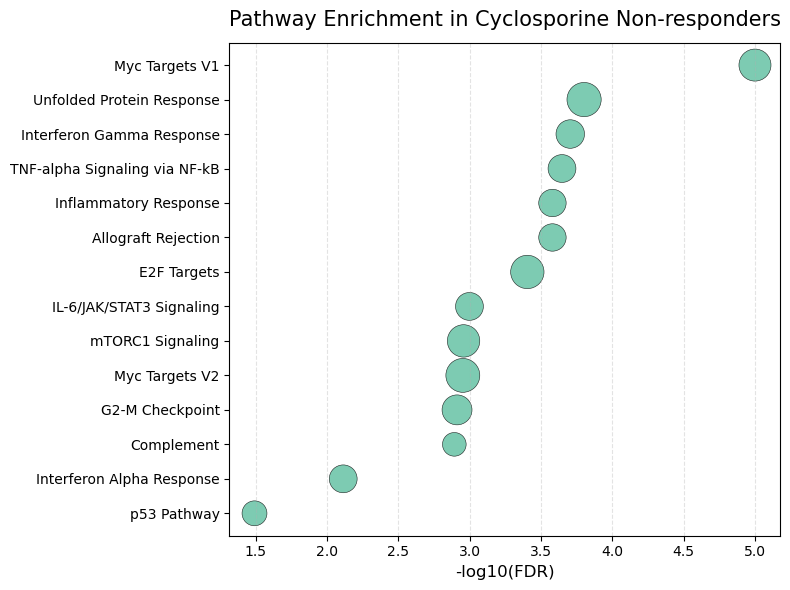

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_plot = nr_res[["Term", "FDR q-val", "Tag %"]].copy().sort_values('FDR q-val')

df_plot["FDR q-val"] = pd.to_numeric(df_plot["FDR q-val"], errors="coerce")
df_plot["Tag %"] = df_plot["Tag %"].apply(lambda x: float(x.split("/")[0])*100/float(x.split("/")[1]))

df_plot["FDR q-val"] = df_plot["FDR q-val"].replace(0, 1e-5)

df_plot = df_plot.dropna(subset=["FDR q-val", "Tag %"])

df_plot["neglog10FDR"] = -np.log10(df_plot["FDR q-val"])

size_scale = 10
df_plot["size"] = df_plot["Tag %"] * size_scale

df_plot = df_plot.iloc[::-1].reset_index(drop=True)

# =======================
# Plot
# =======================
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    df_plot["neglog10FDR"],
    df_plot["Term"],
    s=df_plot["size"].values, 
    color="#66c2a5",
    alpha=0.85,
    edgecolor="black",
    linewidth=0.4
)

ax.set_xlabel("-log10(FDR)", fontsize=12)
ax.set_ylabel("")
ax.set_title("Pathway Enrichment in Cyclosporine Non-responders", fontsize=15, pad=12)
ax.grid(axis="x", linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()


* __[Table 6] Core biological pathway of Non-responder in GSE58558__   
Similar to mino AL derived from GSE157194, several cell cycle and immune-related biological pathways are strongly enriched.   

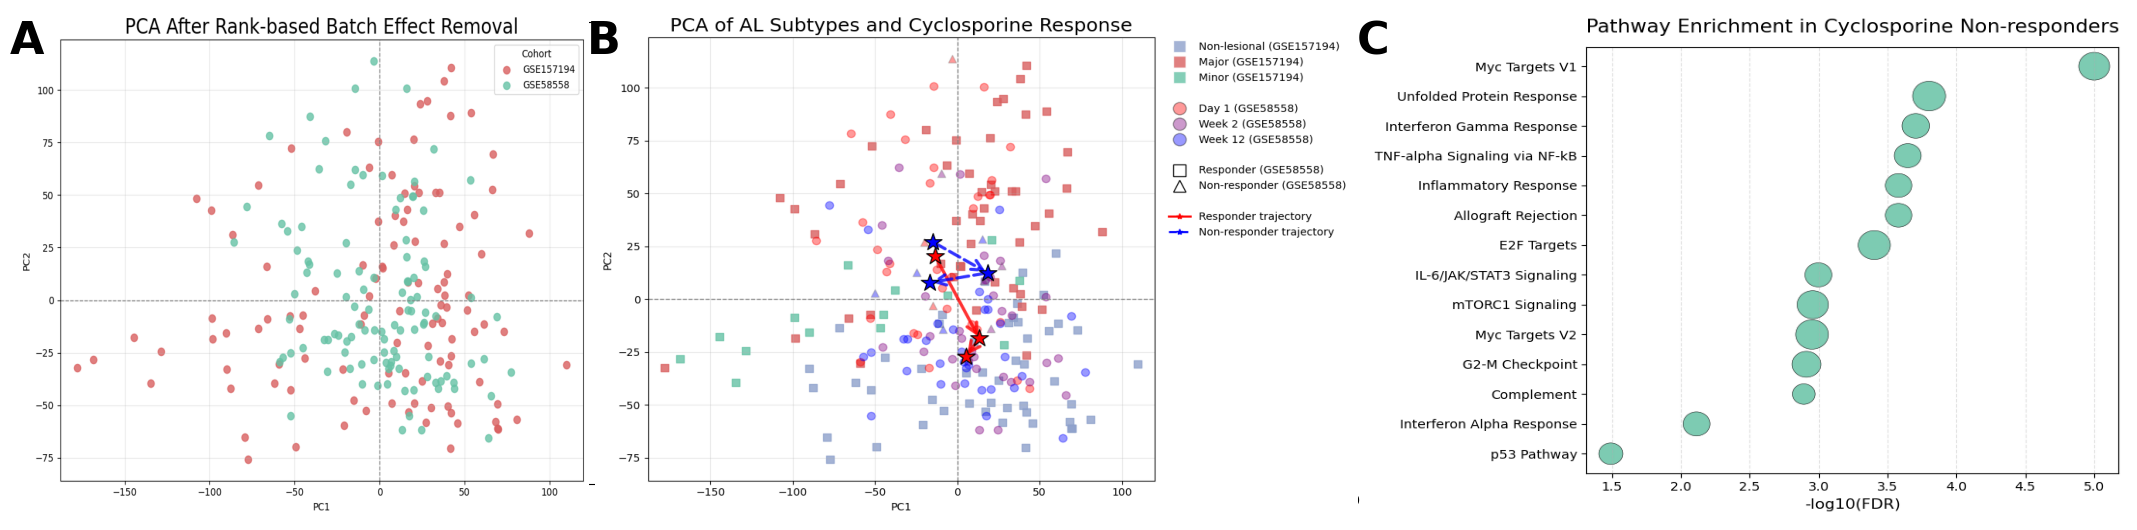

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec


# file path setting
figA_path = f"{project_path}/03_figures/Figure6A.png"
figB_path = f"{project_path}/03_figures/Figure6B.png"
figC_path = f"{project_path}/03_figures/Figure6C.png"

# load images
imgA = mpimg.imread(figA_path)
imgB = mpimg.imread(figB_path)
imgC = mpimg.imread(figC_path)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

gs = GridSpec(
    1, 3,
    width_ratios=[0.75, 1.0, 1.0],
    wspace=0.01,
    left=0.02, right=0.98, top=0.90, bottom=0.05
)

# Create axes
axA = fig.add_subplot(gs[0, 0])
axB = fig.add_subplot(gs[0, 1])
axC = fig.add_subplot(gs[0, 2])

# Pack into iterable
axes = [axA, axB, axC]
imgs = [imgA, imgB, imgC]
labels = ["A", "B", "C"]

# Draw images
for ax, img, label in zip(axes, imgs, labels):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for spine in ax.spines.values():
        spine.set_visible(False)    
        
    ax.imshow(img, extent=[0,1,0,1], aspect='auto')
    ax.axis("off")

    # Panel label
    ax.text(
        -0.01, 0.98, label,
        transform=ax.transAxes,
        fontsize=32,
        fontweight="bold",
        va="top"
    )


plt.savefig(f"{project_path}/03_figures/Figure6.png", dpi=300, bbox_inches='tight')
plt.show()



---

# 8. Conclusion

> * This study demonstrates the existence of distinct molecular subtypes within patients with atopic dermatitis.   
> * The predominant major AD subtype is characterized by pronounced immune and inflammatory activity and is predicted to exhibit strong responsiveness to both dupilumab and cyclosporine.   
> * In contrast, the minor AD subtype displays molecular features associated with both immune activation and enhanced cell proliferation, and is predicted to respond well to dupilumab but relatively poorly to cyclosporine.   
> * Using an independent cyclosporine-treated cohort (GSE58558), we further observed that transcriptional profiles of cyclosporine non-responders after treatment increasingly resemble those of the minor subtype identified in GSE157194.   
> * Collectively, these findings suggest that transcriptome-based molecular subtyping may inform cyclosporine treatment decisions, with preferential consideration of cyclosporine therapy for patients classified as the major molecular subtype.   